# IEEE-CIS Fraud Detection
Can you detect fraud from customer transactions?


## Data Description
In this competition you are predicting the probability that an online transaction is fraudulent, as denoted by the binary target isFraud.

The data is broken into two files identity and transaction, which are joined by TransactionID. Not all transactions have corresponding identity information.

### Categorical Features - Transaction
- ProductCD
- card1 - card6
- addr1, addr2
- P_emaildomain
- R_emaildomain
- M1 - M9

### Categorical Features - Identity
- DeviceType
- DeviceInfo
- id_12 - id_38


The `TransactionDT` feature is a timedelta from a given reference datetime (not an actual timestamp).


### Files
- `train_{transaction, identity}.csv` - the training set
- `test_{transaction, identity}.csv` - the test set (you must predict the isFraud value for these observations)


### Evaluation Metric
- Submissions are evaluated on area under the `ROC` curve between the predicted probability and the observed target. For each `TransactionID` in the test set, you must predict a probability for the `isFraud` variable.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML

# Configure visualisations
%matplotlib inline
plt.style.use('ggplot')

# Configure seaborn
sns.set_style('white')
sns.set_style('white',{"xtick.major.size": 5, "ytick.major.size": 5})

plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 15

import warnings
warnings.filterwarnings('ignore')


## Datasets
Data is separated into two datasets: information about the identity of the customer and transaction information. bold text
- **train_transaction** : contains **590,540** rows and **394** features.
- **train_identity**: contains **144,233** rows and **41** features.

In [2]:
folder_path = '../data/raw/'
train_identity = pd.read_csv(f'{folder_path}train_identity.csv')
train_transaction = pd.read_csv(f'{folder_path}train_transaction.csv')
test_identity = pd.read_csv(f'{folder_path}test_identity.csv')
test_transaction = pd.read_csv(f'{folder_path}test_transaction.csv')

In [3]:
print('train_transaction shape is {}'.format(train_transaction.shape))
print('test_transaction shape is {}'.format(test_transaction.shape))
print('train_identity shape is {}'.format(train_identity.shape))
print('test_identity shape is {}'.format(test_identity.shape))

train_transaction shape is (590540, 394)
test_transaction shape is (506691, 393)
train_identity shape is (144233, 41)
test_identity shape is (141907, 41)


## Data Type

In [4]:
def count_feature_type(df):
    return df.dtypes.value_counts()

print("Train transaction\n", count_feature_type(train_transaction) ,"\n")
print("Train identity\n",count_feature_type(train_identity))

Train transaction
 float64    376
object      14
int64        4
Name: count, dtype: int64 

Train identity
 float64    23
object     17
int64       1
Name: count, dtype: int64


After importing the dataset of train transaction and identity data then combine them in to one. Merging of both identity data and transaction data will be done through TransactionID column because it is common in both the files.

In [5]:
# Let's combine the data and work with the whole dataset
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [6]:
print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test dataset has {test.shape[0]} rows and {test.shape[1]} columns.')

Train dataset has 590540 rows and 434 columns.
Test dataset has 506691 rows and 433 columns.


In [ ]:
import os
import pandas as pd

# Create the directory if it doesn't exist
os.makedirs("../data/samples", exist_ok=True)

# Filter the train dataset for transactions where isFraud = 1
fraudulent_transactions = train[train["isFraud"] == 1]

# Select the first 3 rows (or any 3 rows)
fraudulent_transactions_sample = fraudulent_transactions.head(15)

# Iterate through the first 3 fraudulent transactions and save each one as a separate CSV file
for idx, row in fraudulent_transactions_sample.iterrows():
    # Convert the row to a pandas DataFrame
    transaction_df = pd.DataFrame([row])

    # Define the file path for each transaction (using the TransactionID as the filename)
    file_path = f'../data/samples/transaction_{row["TransactionID"]}.csv'

    # Save the DataFrame as a CSV file (without index and header)
    transaction_df.to_csv(file_path, index=False)

    print(f'Saved transaction {row["TransactionID"]} to {file_path}')

Saved transaction 2987203 to ../data/samples/transaction_2987203.csv
Saved transaction 2987240 to ../data/samples/transaction_2987240.csv
Saved transaction 2987243 to ../data/samples/transaction_2987243.csv
Saved transaction 2987245 to ../data/samples/transaction_2987245.csv
Saved transaction 2987288 to ../data/samples/transaction_2987288.csv
Saved transaction 2987367 to ../data/samples/transaction_2987367.csv
Saved transaction 2987405 to ../data/samples/transaction_2987405.csv
Saved transaction 2987630 to ../data/samples/transaction_2987630.csv
Saved transaction 2987683 to ../data/samples/transaction_2987683.csv
Saved transaction 2987736 to ../data/samples/transaction_2987736.csv
Saved transaction 2987779 to ../data/samples/transaction_2987779.csv
Saved transaction 2987780 to ../data/samples/transaction_2987780.csv
Saved transaction 2987781 to ../data/samples/transaction_2987781.csv
Saved transaction 2987869 to ../data/samples/transaction_2987869.csv
Saved transaction 2987923 to ../da

In [7]:
import os
import json

# Create the directory if it doesn't exist

os.makedirs("../data/samples", exist_ok=True)
# Filter the train dataset for transactions where isFraud = 1
fraudulent_transactions = train[train["isFraud"] == 1]

# Select the first 3 rows (or any 3 rows)
fraudulent_transactions_sample = fraudulent_transactions.head(15)

# Iterate through the first 3 fraudulent transactions and save each one as a separate JSON file
for idx, row in fraudulent_transactions_sample.iterrows():
    # Convert the row to a dictionary
    transaction_dict = row.to_dict()

    # Define the file path for each transaction (using the TransactionID as the filename)
    file_path = f'../data/samples/transaction_{transaction_dict["TransactionID"]}.json'

    # Save the dictionary as a JSON file
    with open(file_path, "w") as f:
        json.dump(transaction_dict, f, indent=4)

    print(f'Saved transaction {transaction_dict["TransactionID"]} to {file_path}')

Saved transaction 2987203 to ../data/samples/transaction_2987203.json
Saved transaction 2987240 to ../data/samples/transaction_2987240.json
Saved transaction 2987243 to ../data/samples/transaction_2987243.json
Saved transaction 2987245 to ../data/samples/transaction_2987245.json
Saved transaction 2987288 to ../data/samples/transaction_2987288.json
Saved transaction 2987367 to ../data/samples/transaction_2987367.json
Saved transaction 2987405 to ../data/samples/transaction_2987405.json
Saved transaction 2987630 to ../data/samples/transaction_2987630.json
Saved transaction 2987683 to ../data/samples/transaction_2987683.json
Saved transaction 2987736 to ../data/samples/transaction_2987736.json
Saved transaction 2987779 to ../data/samples/transaction_2987779.json
Saved transaction 2987780 to ../data/samples/transaction_2987780.json
Saved transaction 2987781 to ../data/samples/transaction_2987781.json
Saved transaction 2987869 to ../data/samples/transaction_2987869.json
Saved transaction 29

In [ ]:
import json
import numpy as np
import pandas as pd

# 1. Charger la transaction frauduleuse sauvegardée
with open("../data/samples/fraudulent_transaction_fe.json", "r") as json_file:
    fraud_tx = json.load(json_file)

# Retirer les colonnes de prédiction (on ne compare que les features)
fraud_tx_features = {
    k: v
    for k, v in fraud_tx.items()
    if k not in ["predicted_isFraud", "predicted_proba"]
}

# 2. Charger le dataset train (assurez-vous qu'il est déjà préchargé dans la variable 'train')
# train = pd.read_csv('train.csv')  # Si besoin de charger, mais il semble déjà disponible

# Colonnes communes entre la transaction frauduleuse et train
common_cols = set(fraud_tx_features.keys()).intersection(set(train.columns))


# 3. Définir la fonction pour compter les correspondances de features
def count_matches(train_row, test_row, epsilon=1e-3):
    score = 0
    for col in common_cols:
        val_train = train_row[col]
        val_test = test_row[col]

        if pd.isnull(val_train) or pd.isnull(val_test):
            continue

        if col == "TransactionAmt":
            # Comparer après transformation np.log1p
            transformed_amt = val_test
            if np.isclose(np.log1p(val_train), transformed_amt, atol=1e-5):
                score += 1
        else:
            # Si c'est une chaîne de caractères (catégorielle)
            if isinstance(val_train, str) and isinstance(val_test, str):
                if val_train == val_test:
                    score += 1
            # Si ce sont tous les deux des numériques (int ou float)
            elif np.issubdtype(type(val_train), np.number) and np.issubdtype(
                type(val_test), np.number
            ):
                if abs(val_train - val_test) < epsilon:
                    score += 1
            # Sinon (par ex: booléens, catégories), on teste l'égalité simple
            elif val_train == val_test:
                score += 1
    return score


# 4. Comparer la transaction frauduleuse avec toutes les transactions du train
best_score = -1
best_match = None

for idx, train_row in train.iterrows():
    score = count_matches(train_row, fraud_tx_features)
    if score > best_score:
        best_score = score
        best_match = train_row

# 5. Récupérer la transaction originale correspondante
if best_match is not None:
    print(f"\nTransaction correspondante trouvée ! Score = {best_score}")

    # Sauvegarde en JSON (on prend la meilleure correspondance)
    matched_dict = best_match.to_dict()
    output_path = "../data/samples/original_fraudulent_transaction.json"
    with open(output_path, "w") as json_file:
        json.dump(
            matched_dict, json_file, indent=4, default=str
        )  # default=str pour les valeurs non sérialisables

    print(f"\nTransaction sauvegardée dans : {output_path}")
else:
    print("\nAucune correspondance trouvée dans le dataset initial.")

In [18]:
import json
import numpy as np

# 1. Charger la transaction frauduleuse sauvegardée
with open("../data/samples/fraudulent_transaction_fe.json", "r") as json_file:
    fraud_tx = json.load(json_file)

# Retirer les colonnes de prédiction (on ne compare que les features)
fraud_tx_features = {
    k: v
    for k, v in fraud_tx.items()
    if k not in ["predicted_isFraud", "predicted_proba"]
}

# 2. Colonnes communes
common_cols = set(fraud_tx_features.keys()).intersection(set(train.columns))

# 3. Comparer ligne par ligne
mask = pd.Series([True] * len(train))

for col in common_cols:
    if col == "TransactionAmt":
        # Comparer après transformation np.log1p
        transformed_amt = fraud_tx_features["TransactionAmt"]
        mask &= np.isclose(
            np.log1p(train["TransactionAmt"]), transformed_amt, atol=1e-5
        )
    else:
        mask &= train[col] == fraud_tx_features[col]

# 4. Récupérer la transaction originale correspondante
matched_transaction = train[mask]

if not matched_transaction.empty:
    print(f"\nTransaction correspondante trouvée ! (n={len(matched_transaction)})\n")

    # Sauvegarde en JSON (on prend la première correspondance si plusieurs)
    matched_dict = matched_transaction.iloc[0].to_dict()
    output_path = "../data/samples/original_fraudulent_transaction.json"
    with open(output_path, "w") as json_file:
        json.dump(
            matched_dict, json_file, indent=4, default=str
        )  # default=str pour les valeurs non sérialisables

    print(f"\nTransaction sauvegardée dans : {output_path}")
else:
    print("\nAucune correspondance trouvée dans le dataset initial.")


Aucune correspondance trouvée dans le dataset initial.


In [20]:
import numpy as np

mismatch_report = []

for col in common_cols:
    if col == "TransactionAmt":
        # Comparer après transformation np.log1p
        transformed_amt = fraud_tx_features["TransactionAmt"]
        comparison = np.isclose(
            np.log1p(train["TransactionAmt"]), transformed_amt, atol=1e-5
        )
        n_matches = comparison.sum()
    else:
        fraud_value = fraud_tx_features[col]
        # Gérer les NaN explicitement
        if pd.isna(fraud_value):
            comparison = train[col].isna()
        else:
            comparison = train[col] == fraud_value
        n_matches = comparison.sum()

    mismatch_report.append((col, n_matches, len(train)))

# Afficher les colonnes qui ont peu ou pas de matches
for col, matches, total in sorted(mismatch_report, key=lambda x: x[1]):
    print(f"{col}: {matches}/{total} correspondances")

id_15: 0/590540 correspondances
V11: 0/590540 correspondances
D11: 0/590540 correspondances
M3: 0/590540 correspondances
V6: 0/590540 correspondances
dist1: 0/590540 correspondances
V3: 0/590540 correspondances
R_emaildomain: 0/590540 correspondances
V4: 0/590540 correspondances
M1: 0/590540 correspondances
D3: 0/590540 correspondances
D6: 0/590540 correspondances
D15: 0/590540 correspondances
D13: 0/590540 correspondances
V1: 0/590540 correspondances
card6: 0/590540 correspondances
M4: 0/590540 correspondances
V8: 0/590540 correspondances
V156: 0/590540 correspondances
V162: 0/590540 correspondances
id_36: 0/590540 correspondances
id_38: 0/590540 correspondances
id_33: 0/590540 correspondances
id_37: 0/590540 correspondances
D10: 0/590540 correspondances
M2: 0/590540 correspondances
M6: 0/590540 correspondances
V142: 0/590540 correspondances
id_14: 0/590540 correspondances
V139: 0/590540 correspondances
card4: 0/590540 correspondances
id_30: 0/590540 correspondances
addr1: 0/590540 co

In [ ]:
def count_matches(train_row, test_row, epsilon=1e-3):
    score = 0
    for col in common_cols:
        val_train = train_row[col]
        val_test = test_row[col]
        if pd.isnull(val_train) or pd.isnull(val_test):
            continue
        if col in categorical_cols:
            if val_train == val_test:
                score += 1
        else:
            if abs(val_train - val_test) < epsilon:
                score += 1
    return score

In [ ]:
scores = train.apply(lambda row: count_matches(row, test_row), axis=1)
best_idx = scores.idxmax()
best_match = train.loc[best_idx]

So we have two medium-sized datasets with a lot of columns. 

## Features and variables
- **TransactionDT**: timedelta from a given reference datetime (not a timestamp)
- **TransactionAMT**: transaction payment in USD
- **ProductCD**: product code, the product for each transaction
- **card1-card6**: payment card information, such as card type
- **addr1-addr2:**:  billing region and billing country
- **dist1-dist2**: distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.
- **P_ and (R_)emaildomain**: purchaser and recipient email domain, some of the transactions do not require a recipient, and the corresponding Remaildomain is empty.
- **C1-C14**: counting, addresses and other things, actual meaning masked
- **D1-D15**: timedelta, such as days between previous transaction, etc
- **M1-M9**: match, such as names on card and address, etc
- **V1-V339**: Vesta engineered rich features, including ranking, counting, and other entity relations different Some of the V features have different proportions of missing, and their true meaning and treatment are still unknown.

In [7]:
# List of all column names
print(train_transaction.columns.values)
print(test_transaction.columns.values)

['TransactionID' 'isFraud' 'TransactionDT' 'TransactionAmt' 'ProductCD'
 'card1' 'card2' 'card3' 'card4' 'card5' 'card6' 'addr1' 'addr2' 'dist1'
 'dist2' 'P_emaildomain' 'R_emaildomain' 'C1' 'C2' 'C3' 'C4' 'C5' 'C6'
 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13' 'C14' 'D1' 'D2' 'D3' 'D4' 'D5'
 'D6' 'D7' 'D8' 'D9' 'D10' 'D11' 'D12' 'D13' 'D14' 'D15' 'M1' 'M2' 'M3'
 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8'
 'V9' 'V10' 'V11' 'V12' 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20'
 'V21' 'V22' 'V23' 'V24' 'V25' 'V26' 'V27' 'V28' 'V29' 'V30' 'V31' 'V32'
 'V33' 'V34' 'V35' 'V36' 'V37' 'V38' 'V39' 'V40' 'V41' 'V42' 'V43' 'V44'
 'V45' 'V46' 'V47' 'V48' 'V49' 'V50' 'V51' 'V52' 'V53' 'V54' 'V55' 'V56'
 'V57' 'V58' 'V59' 'V60' 'V61' 'V62' 'V63' 'V64' 'V65' 'V66' 'V67' 'V68'
 'V69' 'V70' 'V71' 'V72' 'V73' 'V74' 'V75' 'V76' 'V77' 'V78' 'V79' 'V80'
 'V81' 'V82' 'V83' 'V84' 'V85' 'V86' 'V87' 'V88' 'V89' 'V90' 'V91' 'V92'
 'V93' 'V94' 'V95' 'V96' 'V97' 'V98' 'V99' 'V100' 'V101' 'V1

In [8]:
train_transaction.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN   NaN  
2  NaN   NaN   NaN   NaN  
3  NaN   NaN   NaN   NaN  
4  0.0   0.0   0.0   0.0  

[5 rows x 394 columns]

 There are a lot of **NaN**

In [9]:
train_identity.head()

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceType                     DeviceInfo  
0     F     T      T      mobile  SAMSUNG SM-G892A Build/NRD90M  
1     F     F      T      mobile                     iOS Device  
2     F     T      T     desktop                        Windows  
3     F     T      T     desktop                            NaN  
4     F     T      T     desktop                          MacOS  

[5 rows x 41 columns]

In [10]:
# Text Annotation
def text_annotate(cnt):
    for i in cnt.patches:
        height = i.get_height()
        cnt.text(i.get_x() + i.get_width()/2., height,'%d' % int(height),ha='center',va='bottom')

#-------------------------------------------------------------------------------------------------

def get_stats(fraud):
    return {'No Fraud':fraud.count()-fraud.sum(),'Fraud': fraud.sum(),'All': fraud.count(),
            'Fraud(%)':'{:.2f}%'.format(fraud.mean()*100)}

# --------------------------------------------------------------------

def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

# --------------------------------------------------------------------

def h(content):
    display(HTML(content))
# --------------------------------------------------------------------

def corr(col):
    N = None #10000
    num_vars = [f for f in train.columns if train[f].dtype != 'object']
    trx = train.head(N) if N is not None else train.copy()
    corrs = trx[num_vars].corrwith(trx[col]).reset_index().sort_values(0, ascending=False).reset_index(drop=True).rename({'index':'Column',0:'Correlation with ' + col}, axis=1)
    h('<b>Most correlated values with ' + col + ':</b>')
    trx = pd.concat([corrs.head(6), corrs.dropna().tail(5)])
    def linkx(val):
        return '<a href="#c_{}">{}</a>'.format(val, val) if val in included_cols else val
    trx['Column'] = trx['Column'].apply(linkx)
    h(trx.to_html(escape=False))

included_cols = list(train.columns.values[:20])

# --------------------------------------------------------------------

train['TransactionAmt'] = train['TransactionAmt'].astype(float)
total = len(train)
total_amt = train.groupby(['isFraud'])['TransactionAmt'].sum().sum()
def ploting_cnt_amt(DataFile, Column, lim=2000):
    tmp = pd.crosstab(DataFile[Column], DataFile['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    
    plt.figure(figsize=(16,14))    
    plt.suptitle(f'{Column} Distributions ', fontsize=24)
    
    plt.subplot(211)
    plot_1 = sns.countplot(x=Column,data=DataFile,order=list(tmp[Column].values), palette='Blues')
    plot_1_2 = plot_1.twinx()
    plot_1_2 = sns.pointplot(x=Column, y='Fraud', data=tmp, order=list(tmp[Column].values),
                       color='gray', legend=False)
    plot_1_2.set_ylim(0,tmp['Fraud'].max()*1.1)
    plot_1_2.set_ylabel("%Fraud Transactions", fontsize=16)
    plot_1.set_title(f"Most Frequent {Column} values and % Fraud Transactions", fontsize=20)
    plot_1.set_xlabel(f"{Column} Category", fontsize=16)
    plot_1.set_ylabel("Count", fontsize=17)
    plot_1.set_xticklabels(plot_1.get_xticklabels(),rotation=45)
    sizes = []
    for p in plot_1.patches:
        height = p.get_height()
        sizes.append(height)
        plot_1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12) 
        
    plot_1.set_ylim(0,max(sizes)*1.15)
    
    perc_amt = (DataFile.groupby(['isFraud',Column])['TransactionAmt'].sum() \
                / DataFile.groupby([Column])['TransactionAmt'].sum() * 100).unstack('isFraud')
    perc_amt = perc_amt.reset_index()
    perc_amt.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    amt = DataFile.groupby([Column])['TransactionAmt'].sum().reset_index()
    perc_amt = perc_amt.fillna(0)
    plt.subplot(212)
    plot_2 = sns.barplot(x=Column, y='TransactionAmt', 
                       data=amt, palette='Blues',
                       order=list(tmp[Column].values))
    plot_2_2 = plot_2.twinx()
    plot_2_2 = sns.pointplot(x=Column, y='Fraud', data=perc_amt, 
                        order=list(tmp[Column].values),
                       color='gray', legend=False, )
    plot_2_2.set_ylim(0,perc_amt['Fraud'].max()*1.1)
    plot_2_2.set_ylabel("%Fraud Total Amount", fontsize=16)
    plot_2.set_xticklabels(plot_2.get_xticklabels(),rotation=45)
    plot_2.set_title(f"{Column} by Transactions Total + %of total and %Fraud Transactions", fontsize=20)
    plot_2.set_xlabel(f"{Column} Category ", fontsize=16)
    plot_2.set_ylabel("Transaction Total Amount(U$)", fontsize=16)
    plot_2.set_xticklabels(plot_2.get_xticklabels(),rotation=45)    
    
    for p in plot_2.patches:
        height = p.get_height()
        plot_2.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total_amt*100),
                ha="center",fontsize=12) 
        
    plt.subplots_adjust(hspace=.4, top = 0.9)
    plt.show()

# --------------------------------------------------------------------

def describe(datatrain,datatest,feature):
    d = pd.DataFrame(columns=[feature,'Train','TrainFraud','TrainNoFraud','Test'])
    d[feature] = ['count','mean','std','min','25%','50%','75%','max','unique','NaN','NaNshare']
    for i in range(0,8):
        d['Train'].iloc[i] = datatrain[feature].describe().iloc[i]
        d['TrainFraud'].iloc[i]=datatrain[datatrain['isFraud']==1][feature].describe().iloc[i]
        d['TrainNoFraud'].iloc[i]=datatrain[datatrain['isFraud']==0][feature].describe().iloc[i]
        d['Test'].iloc[i]=datatest[feature].describe().iloc[i]
    d['Train'].iloc[8] = len(datatrain[feature].unique())
    d['TrainFraud'].iloc[8]=len(datatrain[datatrain['isFraud']==1][feature].unique())
    d['TrainNoFraud'].iloc[8]=len(datatrain[datatrain['isFraud']==0][feature].unique())
    d['Test'].iloc[8]=len(datatest[feature].unique())
    d['Train'].iloc[9] = datatrain[feature].isnull().sum()
    d['TrainFraud'].iloc[9] = datatrain[datatrain['isFraud']==1][feature].isnull().sum()
    d['TrainNoFraud'].iloc[9] = datatrain[datatrain['isFraud']==0][feature].isnull().sum()
    d['Test'].iloc[9]=datatest[feature].isnull().sum()
    d['Train'].iloc[10] = datatrain[feature].isnull().sum()/len(datatrain)
    d['TrainFraud'].iloc[10] = datatrain[datatrain['isFraud']==1][feature].isnull().sum()/len(datatrain[datatrain['isFraud']==1])
    d['TrainNoFraud'].iloc[10] = datatrain[datatrain['isFraud']==0][feature].isnull().sum()/len(datatrain[datatrain['isFraud']==0])
    d['Test'].iloc[10]=datatest[feature].isnull().sum()/len(datatest)
    return d

# --------------------------------------------------------------------

def compare_cate(df,colname,targetname):
    # caculate aggregate stats
    df_cate = df.groupby([colname])[targetname].agg(['count', 'sum','mean'])
    df_cate.reset_index(inplace=True)
    print(df_cate)
    
    # plot visuals
    f, ax = plt.subplots(figsize=(15, 6))
    ax.tick_params(axis='x',labelrotation=90)
    plt1 = sns.lineplot(x=colname, y="mean", data=df_cate,color="r")
    
    for tl in ax.get_yticklabels():
        tl.set_color('r')

    ax2 = ax.twinx()
    plt2 = sns.barplot(x=colname, y="count", data=df_cate, palette='Blues',
                       ax=ax2,alpha=0.5)

# --------------------------------------------------------------------

def plot_numerical(feature):
    """
    Plot some information about a numerical feature for both train and test set.
    Args:
        feature (str): name of the column in DataFrame
    """
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
    sns.kdeplot(train[feature], ax=axes[0][0], label='Train', color='blue')
    sns.kdeplot(test[feature], ax=axes[0][0], label='Test', color='#87CEFA' )

    sns.kdeplot(train[train['isFraud']==0][feature], ax=axes[0][1], label='isFraud 0',color='#90EE90' )
    sns.kdeplot(train[train['isFraud']==1][feature], ax=axes[0][1], label='isFraud 1', color='#FA8072')

    test[feature].index += len(train)
    axes[1][0].plot(train[feature], '.', label='Train', color='blue')
    axes[1][0].plot(test[feature], '.', label='Test', color='#87CEFA')
    axes[1][0].set_xlabel('row index')
    axes[1][0].legend()
    test[feature].index -= len(train)

    axes[1][1].plot(train[train['isFraud']==0][feature], '.', label='isFraud 0', color='#90EE90')
    axes[1][1].plot(train[train['isFraud']==1][feature], '.', label='isFraud 1', color='#FA8072')
    axes[1][1].set_xlabel('row index');
    axes[1][1].legend()

    fig.suptitle(feature, fontsize=14);
    axes[0][0].set_title('Train/Test KDE distribution')
    axes[0][1].set_title('Target value KDE distribution')
    axes[1][0].set_title('Index versus value: Train/Test distribution')
    axes[1][1].set_title('Index versus value: Target distribution')
  

## Exploratory Data Analysis (EDA)



In [11]:
train.head(10)

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   
5        2987005        0          86510            49.0         W   5937   
6        2987006        0          86522           159.0         W  12308   
7        2987007        0          86529           422.5         W  12695   
8        2987008        0          86535            15.0         H   2803   
9        2987009        0          86536           117.0         W  17399   

   card2  card3       card4  card5  ...                id_31  id_32  \
0    NaN  150.0    discover  142.0  ...                  NaN    NaN   
1  404.0  150.0  mastercard  102.0  ...                  NaN    NaN   
2  490.0  150.0        visa  166.0  ...                  NaN    NaN   
3  567.0  150.0  mastercard  117.0  ...                  NaN    NaN   
4  514.0  150.0  mastercard  102.0  ...  samsung browser 6.2   32.0   
5  555.0  150.0        visa  226.0  ...                  NaN    NaN   
6  360.0  150.0        visa  166.0  ...                  NaN    NaN   
7  490.0  150.0        visa  226.0  ...                  NaN    NaN   
8  100.0  150.0        visa  226.0  ...   mobile safari 11.0   32.0   
9  111.0  150.0  mastercard  224.0  ...                  NaN    NaN   

       id_33           id_34  id_35 id_36 id_37  id_38  DeviceType  \
0        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
1        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
2        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
3        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
4  2220x1080  match_status:2      T     F     T      T      mobile   
5        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
6        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
7        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
8   1334x750  match_status:1      T     F     F      T      mobile   
9        NaN             NaN    NaN   NaN   NaN    NaN         NaN   

                      DeviceInfo  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4  SAMSUNG SM-G892A Build/NRD90M  
5                            NaN  
6                            NaN  
7                            NaN  
8                     iOS Device  
9                            NaN  

[10 rows x 434 columns]

In [12]:
resumetable(train)[:50]

Dataset Shape: (590540, 434)


Name   dtypes  Missing  Uniques First Value Second Value  \
0    TransactionID    int64        0   590540     2987000      2987001   
1          isFraud    int64        0        2           0            0   
2    TransactionDT    int64        0   573349       86400        86401   
3   TransactionAmt  float64        0    20902        68.5         29.0   
4        ProductCD   object        0        5           W            W   
5            card1    int64        0    13553       13926         2755   
6            card2  float64     8933      500         NaN        404.0   
7            card3  float64     1565      114       150.0        150.0   
8            card4   object     1577        4    discover   mastercard   
9            card5  float64     4259      119       142.0        102.0   
10           card6   object     1571        4      credit       credit   
11           addr1  float64    65706      332       315.0        325.0   
12           addr2  float64    65706       74        87.0         87.0   
13           dist1  float64   352271     2651        19.0          NaN   
14           dist2  float64   552913     1751         NaN          NaN   
15   P_emaildomain   object    94456       59         NaN    gmail.com   
16   R_emaildomain   object   453249       60         NaN          NaN   
17              C1  float64        0     1657         1.0          1.0   
18              C2  float64        0     1216         1.0          1.0   
19              C3  float64        0       27         0.0          0.0   
20              C4  float64        0     1260         0.0          0.0   
21              C5  float64        0      319         0.0          0.0   
22              C6  float64        0     1328         1.0          1.0   
23              C7  float64        0     1103         0.0          0.0   
24              C8  float64        0     1253         0.0          0.0   
25              C9  float64        0      205         1.0          0.0   
26             C10  float64        0     1231         0.0          0.0   
27             C11  float64        0     1476         2.0          1.0   
28             C12  float64        0     1199         0.0          0.0   
29             C13  float64        0     1597         1.0          1.0   
30             C14  float64        0     1108         1.0          1.0   
31              D1  float64     1269      641        14.0          0.0   
32              D2  float64   280797      641         NaN          NaN   
33              D3  float64   262878      649        13.0          NaN   
34              D4  float64   168922      808         NaN          0.0   
35              D5  float64   309841      688         NaN          NaN   
36              D6  float64   517353      829         NaN          NaN   
37              D7  float64   551623      597         NaN          NaN   
38              D8  float64   515614    12353         NaN          NaN   
39              D9  float64   515614       24         NaN          NaN   
40             D10  float64    76022      818        13.0          0.0   
41             D11  float64   279287      676        13.0          NaN   
42             D12  float64   525823      635         NaN          NaN   
43             D13  float64   528588      577         NaN          NaN   
44             D14  float64   528353      802         NaN          NaN   
45             D15  float64    89113      859         0.0          0.0   
46              M1   object   271100        2           T          NaN   
47              M2   object   271100        2           T          NaN   
48              M3   object   271100        2           T          NaN   
49              M4   object   281444        3          M2           M0   

    Third Value  Entropy  
0       2987002    19.17  
1             0     0.22  
2         86469    19.11  
3          59.0     8.35  
4             W     1.28  
5          4663     9.97  
6         490.0     6.32  
7         150.0     0.6

## Missing Value
First we will go through the amount of null values present in all the features and its data type.

In [13]:
# Let's see the number of null values present in each of the columns and the dtype of each column
for i in train.columns:
    print(i,'NaN values present is:',train[i].isnull().sum(),end=" ")
    print('Data type:',train[i].dtypes,end=" ")
    print(" % of Missing data = ", "%.2f%%" % (train[i].isnull().sum()/train.shape[0]*100))

TransactionID NaN values present is: 0 Data type: int64  % of Missing data =  0.00%
isFraud NaN values present is: 0 Data type: int64  % of Missing data =  0.00%
TransactionDT NaN values present is: 0 Data type: int64  % of Missing data =  0.00%
TransactionAmt NaN values present is: 0 Data type: float64  % of Missing data =  0.00%
ProductCD NaN values present is: 0 Data type: object  % of Missing data =  0.00%
card1 NaN values present is: 0 Data type: int64  % of Missing data =  0.00%
card2 NaN values present is: 8933 Data type: float64  % of Missing data =  1.51%
card3 NaN values present is: 1565 Data type: float64  % of Missing data =  0.27%
card4 NaN values present is: 1577 Data type: object  % of Missing data =  0.27%
card5 NaN values present is: 4259 Data type: float64  % of Missing data =  0.72%
card6 NaN values present is: 1571 Data type: object  % of Missing data =  0.27%
addr1 NaN values present is: 65706 Data type: float64  % of Missing data =  11.13%
addr2 NaN values present

In [14]:
# Sorted table for train missing value (%)
missingValue = pd.DataFrame(train.iloc[:,2:].isnull().sum(axis=0).sort_values(ascending=False),columns=['NaN'])
missingValue["Percentage"]= missingValue.NaN.apply(lambda x: '{:.2f}%'.format((float(x)/train.shape[0])*100))
missingValue[missingValue.NaN > 0].head(20) 

NaN Percentage
id_24  585793     99.20%
id_25  585408     99.13%
id_08  585385     99.13%
id_07  585385     99.13%
id_21  585381     99.13%
id_26  585377     99.13%
id_27  585371     99.12%
id_23  585371     99.12%
id_22  585371     99.12%
dist2  552913     93.63%
D7     551623     93.41%
id_18  545427     92.36%
D13    528588     89.51%
D14    528353     89.47%
D12    525823     89.04%
id_04  524216     88.77%
id_03  524216     88.77%
D6     517353     87.61%
id_33  517251     87.59%
id_09  515614     87.31%

In [15]:
# train total missing value(%)
missing_values_count = train.isnull().sum()
total_cells = np.prod(train.shape)
print("train % of missing data = ", "%.2f%%" % (100 * missing_values_count.sum() / total_cells))

train % of missing data =  45.07%


## Distribution of Target variable (isFraud) in Training Set 

- Sparsity of the dataset
- Obviously this is a imbalanced classification problem. Only **~3.50%** of the total transactions were positively classified as fraud.



Notice how **imbalanced** is our original dataset. Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud.

**Imbalance** means that the number of data points available for different the classes is different

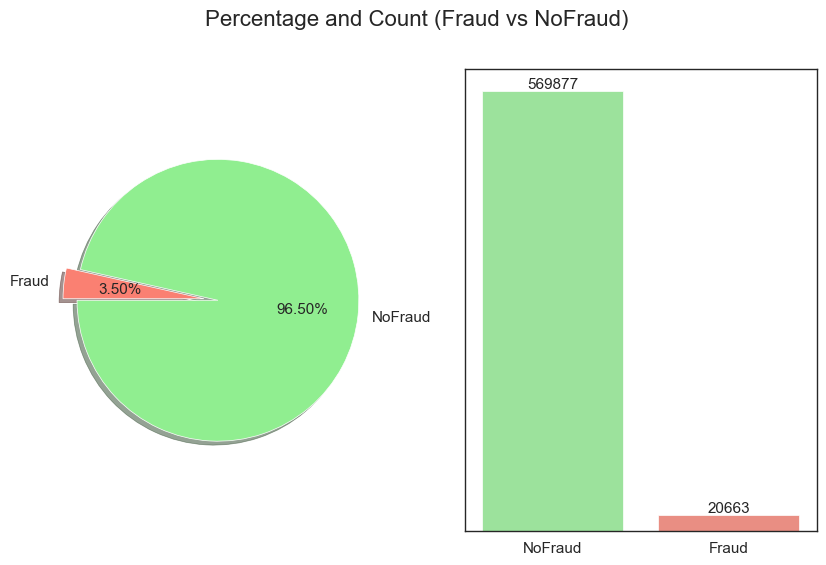

In [16]:
isFraud = {0:'No',1:'Yes'}

fig,axes=plt.subplots(1,2)
plt.suptitle('Percentage and Count (Fraud vs NoFraud)',fontsize=16)
labels = ['NoFraud', 'Fraud']
# Pie chart
train['isFraud'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=axes[0],
                                             labels=labels,colors=['#90EE90','#FA8072'], shadow=True, startangle=180)

axes[0].set_ylabel('')

# Bar chart
cnt = sns.countplot(x='isFraud', data=train, palette=['#90EE90', '#FA8072'], ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_yticklabels('')
axes[1].set_xticklabels(labels)
text_annotate(cnt)
plt.show()

In [17]:
corr("isFraud")

## TransactionDT

One of the important features in this dataset is **TransactionDT**.This is a time related feature and the time is in second. 

The **TransactionDT** feature is a timedelta from a given reference datetime (not an actual timestamp). The train and test appear to be split by time. There is a slight gap in between, but otherwise the training set is from an earlier period of time and test is from a later period of time. This will impact which cross validation techniques should be used.

> The `TransactionDT` is the time (Not actual time but from a particular reference) in which the particular transaction happens. Since this data contains time (in sec) the train test split should be temporal, because 
the test data given in the kaggle have `TransactionDT` value larger than that of train means no overlap.

We will look into this more when reviewing differences in distribution of features between train and test.

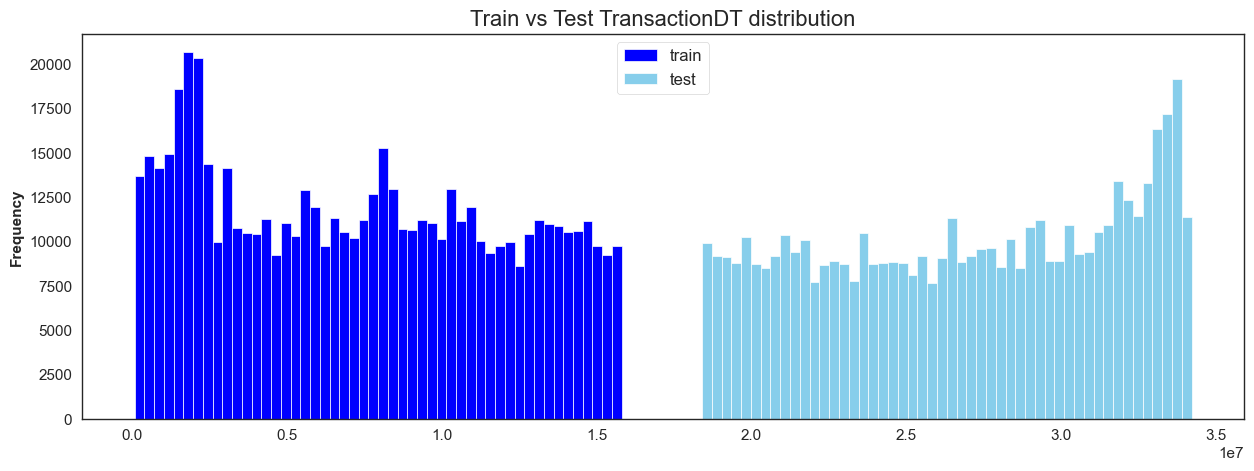

In [18]:
train['TransactionDT'].plot(kind='hist',figsize=(15, 5),label='train',bins=50,color='b',title='Train vs Test TransactionDT distribution')
test['TransactionDT'].plot(kind='hist',label='test',color='skyblue',bins=50)
plt.legend()
plt.show()

So lets transform TransactionDT into a datetime.

In [19]:
from time import time
import datetime
startdate = datetime.datetime.strptime('2017-12-01', '%Y-%m-%d')
train['TransactionDT'] = train['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
test['TransactionDT'] = test['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

In [20]:
train.head()

TransactionID  isFraud       TransactionDT  TransactionAmt ProductCD  \
0        2987000        0 2017-12-02 00:00:00            68.5         W   
1        2987001        0 2017-12-02 00:00:01            29.0         W   
2        2987002        0 2017-12-02 00:01:09            59.0         W   
3        2987003        0 2017-12-02 00:01:39            50.0         W   
4        2987004        0 2017-12-02 00:01:46            50.0         H   

   card1  card2  card3       card4  card5  ...                id_31  id_32  \
0  13926    NaN  150.0    discover  142.0  ...                  NaN    NaN   
1   2755  404.0  150.0  mastercard  102.0  ...                  NaN    NaN   
2   4663  490.0  150.0        visa  166.0  ...                  NaN    NaN   
3  18132  567.0  150.0  mastercard  117.0  ...                  NaN    NaN   
4   4497  514.0  150.0  mastercard  102.0  ...  samsung browser 6.2   32.0   

       id_33           id_34  id_35 id_36 id_37  id_38  DeviceType  \
0        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
1        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
2        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
3        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
4  2220x1080  match_status:2      T     F     T      T      mobile   

                      DeviceInfo  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4  SAMSUNG SM-G892A Build/NRD90M  

[5 rows x 434 columns]

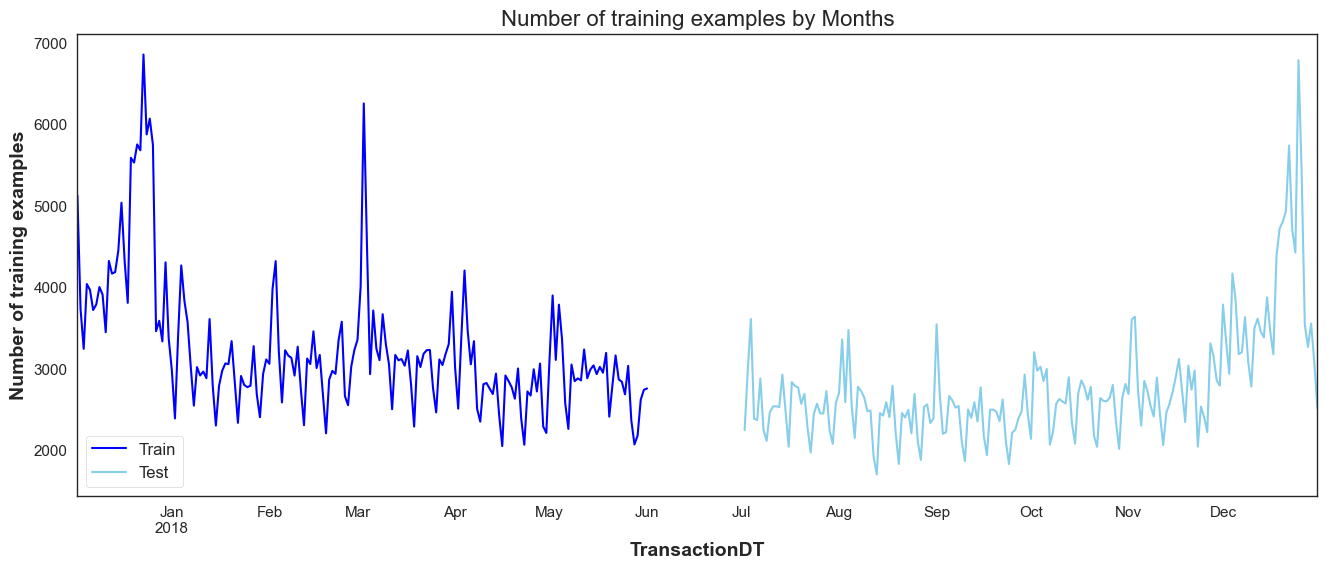

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
train['TransactionDT'].dt.floor('d').value_counts().sort_index().plot(ax=axes, color='b').set_xlabel('Date', fontsize=14)
test['TransactionDT'].dt.floor('d').value_counts().sort_index().plot(ax=axes, color='skyblue').set_ylabel('Number of training examples', fontsize=14)
axes.set_title('Number of training examples by Months', fontsize=16)
axes.legend(['Train', 'Test'])

- There's 30 days gap between test and train set.
- As we can see the test data that is given to us is ahead of train data time. So we will not do random split on data we will use temporal split. 
- From this feature we will *create 2 new features*. Since this is in sec, one feature will be in `day` and another feature will be in `hour`.

And now combining both mean of isFraud by day and number of training examples by day into a single plot.

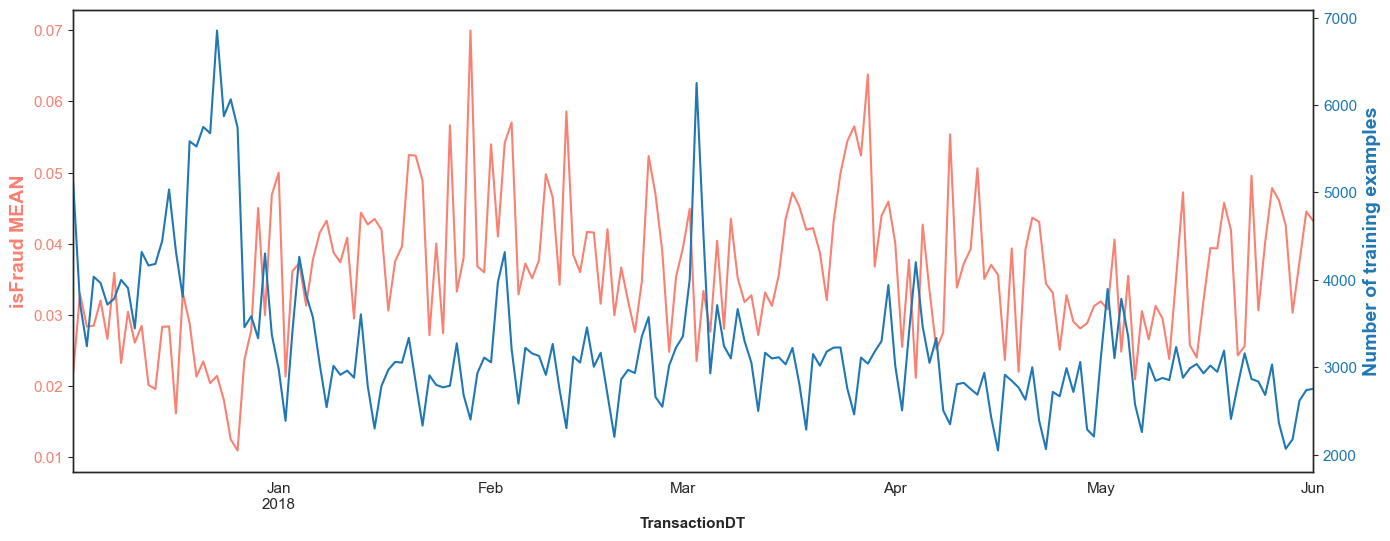

In [22]:
fig, ax1 = plt.subplots(figsize=(16, 6))
train['isFraud'] = train['isFraud'].astype(float)
train.set_index('TransactionDT')['isFraud'].resample('D').mean().plot(ax=ax1, color='#FA8072')
ax1.tick_params(axis='y', labelcolor='#FA8072')
ax1.set_ylabel('isFraud MEAN', color='#FA8072', fontsize=14)
ax2 = ax1.twinx()
train['TransactionDT'].dt.floor('d').value_counts().sort_index().plot(ax=ax2, color='tab:blue');
ax2.tick_params(axis='y', labelcolor='tab:blue');
ax2.set_ylabel('Number of training examples', color='tab:blue', fontsize=14);
ax2.grid(False)

In [23]:
# Since we know transationDT is in sec we can create 2 new features from this hour and day

# creating day feature
train['day'] = ((train['TransactionDT'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') // (3600*24) - 1) % 7
test['day'] = ((test['TransactionDT'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') // (3600*24) - 1) % 7

# creating hour feature
train['hour'] = ((train['TransactionDT'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') // 3600) % 24
test['hour'] = ((test['TransactionDT'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') // 3600) % 24


Text(0.5, 1.0, 'Test')

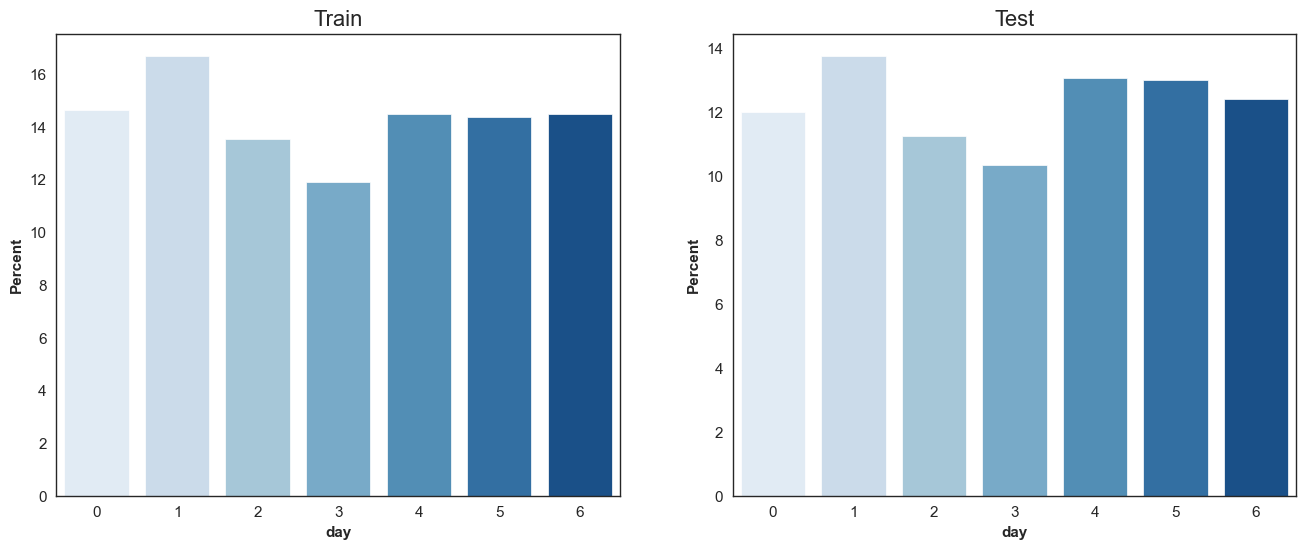

In [24]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
percentage = lambda i: len(i) / float(len(train['day'])) * 100
ax = sns.barplot(x=train['day'], y=train['day'],  estimator=percentage, palette='Blues')
ax.set(ylabel="Percent")
plt.title('Train')
plt.subplot(1,2,2)
percentage = lambda i: len(i) / float(len(train['day'])) * 100
ax = sns.barplot(x=test['day'], y=test['day'],  estimator=percentage, palette='Blues')
ax.set(ylabel="Percent")
plt.title('Test')

Day 0 has largest amount of transaction from all 6 days.

Text(0.5, 1.0, 'MEAN of isFraud by Month')

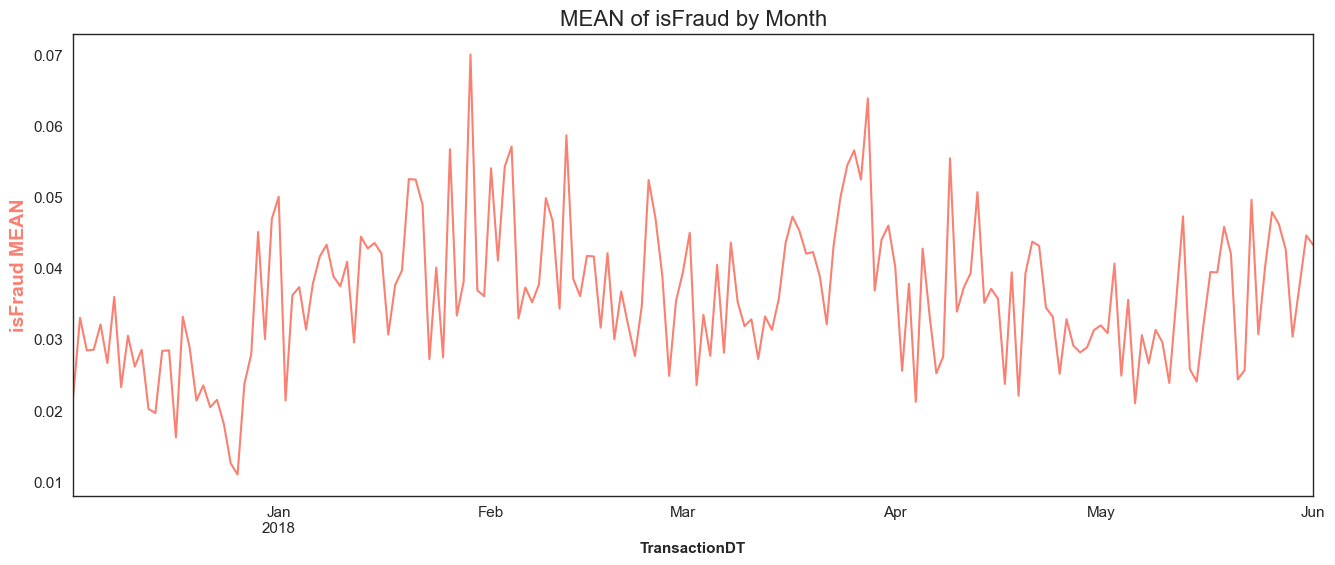

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
train['isFraud'] = pd.to_numeric(train['isFraud'], errors='coerce')
train.set_index('TransactionDT')['isFraud'].resample('D').mean().plot(ax=axes, color='#FA8072').set_ylabel('isFraud MEAN', fontsize=14, color='#FA8072')
axes.set_title('MEAN of isFraud by Month', fontsize=16)

In [26]:
train_day = (train.groupby(['isFraud'])['day']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('day'))

<Axes: xlabel='day', ylabel='percentage'>

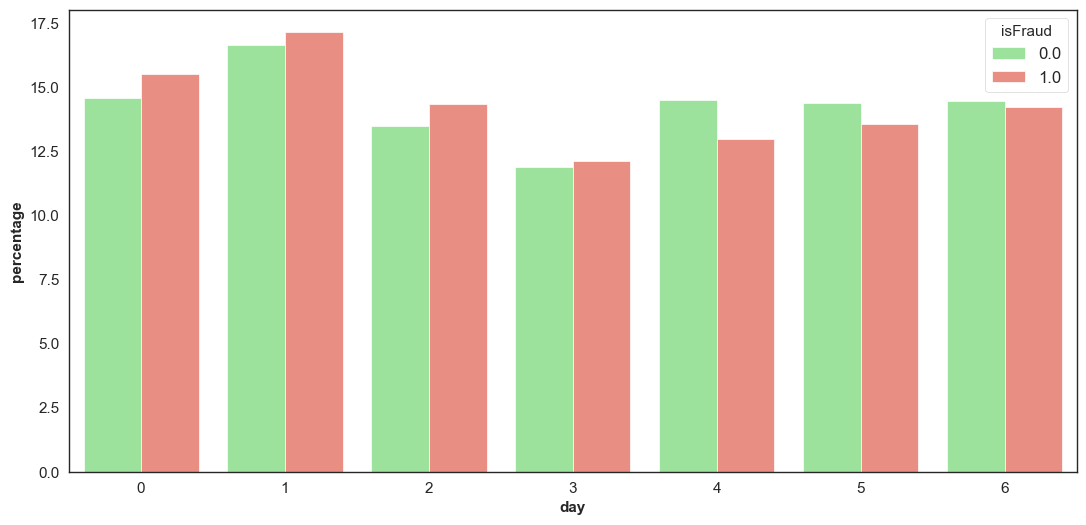

In [27]:
plt.figure(figsize=(13, 6))
sns.barplot(x="day", y="percentage", hue="isFraud", palette=['#90EE90', '#FA8072'], data=train_day)

In all the 7 days fraud and non-fraud transaction is happend in almost equal percentage

Text(0.5, 1.0, 'Test')

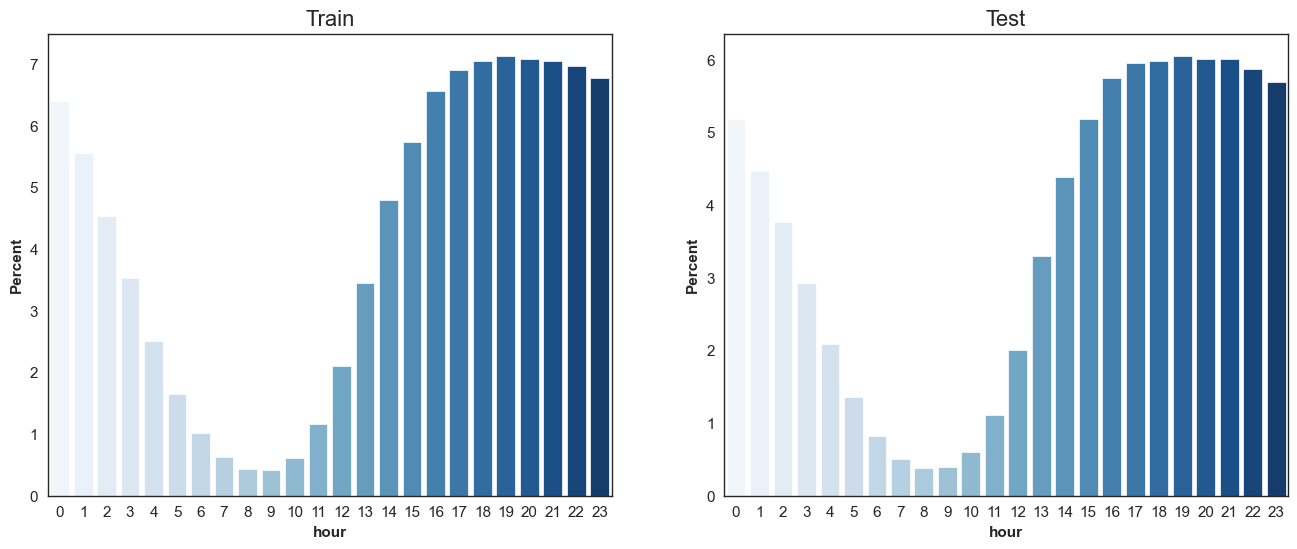

In [28]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
percentage = lambda i: len(i) / float(len(train['hour'])) * 100
ax = sns.barplot(x=train['hour'], y=train['hour'],  estimator=percentage, palette='Blues')
ax.set(ylabel="Percent")
plt.title('Train')
plt.subplot(1,2,2)
percentage = lambda i: len(i) / float(len(train['day'])) * 100
ax = sns.barplot(x=test['hour'], y=test['hour'],  estimator=percentage, palette='Blues')
ax.set(ylabel="Percent")
plt.title('Test')

From hour 0-9 the amount of transaction decreases then from 9 it increases again.

In [29]:
train_hour = (train.groupby(['isFraud'])['hour']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('hour'))

<Axes: xlabel='hour', ylabel='percentage'>

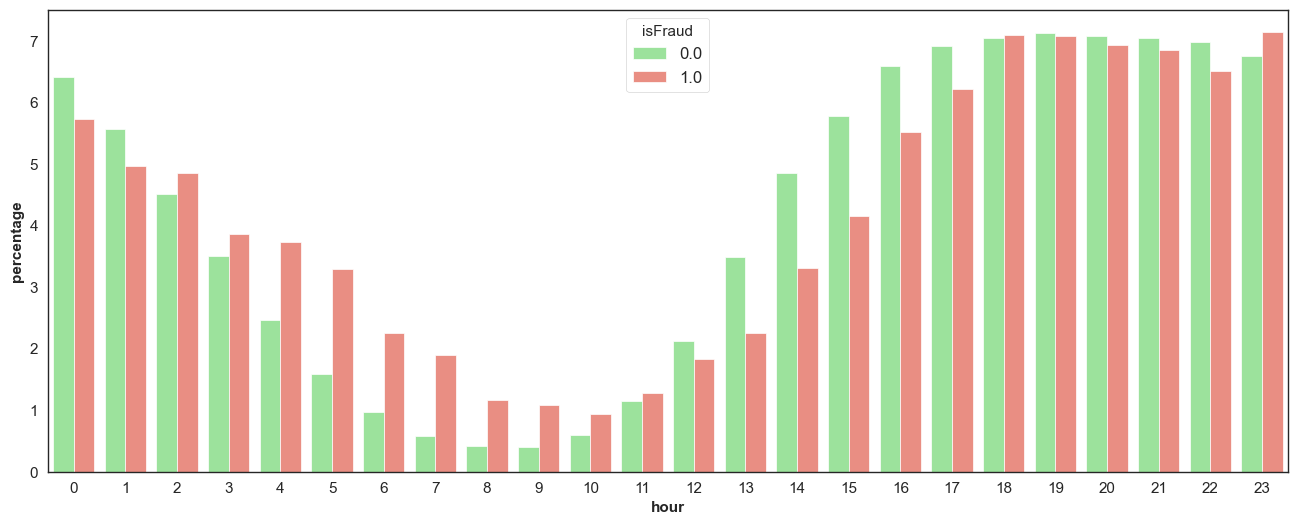

In [30]:
plt.figure(figsize=(16, 6))
sns.barplot(x="hour", y="percentage", hue="isFraud",palette=['#90EE90', '#FA8072'] , data=train_hour)

In [31]:
# New Features
def hourFeature(hour):
    if hour>3 and hour < 11:
        return "highalert"
    if hour ==11 or hour==18:
        return "lowalert"
    if hour==2 or hour==3 or hour==23:
        return "mediumalert"
    else:
        return "noalert"

In [32]:
train['alertFeature'] = train['hour'].apply(hourFeature)
test['alertFeature'] = test['hour'].apply(hourFeature)

From the plot it is confirm that the hour from 4 to 9 rate of fraud transaction is more and from 9 to 18 rate of non-fraud transaction is more.

In [33]:
# Analysis on TransactionDT of both train and test
def describe(datatrain, datatest, feature):
	d = pd.DataFrame(columns=[feature, 'Train', 'TrainFraud', 'TrainNoFraud', 'Test'])
	d[feature] = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'unique', 'NaN', 'NaNshare']
	for i in range(0, 8):
		if i < len(datatrain[feature].describe()):
			d['Train'].iloc[i] = datatrain[feature].describe().iloc[i]
		if i < len(datatrain[datatrain['isFraud'] == 1][feature].describe()):
			d['TrainFraud'].iloc[i] = datatrain[datatrain['isFraud'] == 1][feature].describe().iloc[i]
		if i < len(datatrain[datatrain['isFraud'] == 0][feature].describe()):
			d['TrainNoFraud'].iloc[i] = datatrain[datatrain['isFraud'] == 0][feature].describe().iloc[i]
		if i < len(datatest[feature].describe()):
			d['Test'].iloc[i] = datatest[feature].describe().iloc[i]
	d['Train'].iloc[8] = len(datatrain[feature].unique())
	d['TrainFraud'].iloc[8] = len(datatrain[datatrain['isFraud'] == 1][feature].unique())
	d['TrainNoFraud'].iloc[8] = len(datatrain[datatrain['isFraud'] == 0][feature].unique())
	d['Test'].iloc[8] = len(datatest[feature].unique())
	d['Train'].iloc[9] = datatrain[feature].isnull().sum()
	d['TrainFraud'].iloc[9] = datatrain[datatrain['isFraud'] == 1][feature].isnull().sum()
	d['TrainNoFraud'].iloc[9] = datatrain[datatrain['isFraud'] == 0][feature].isnull().sum()
	d['Test'].iloc[9] = datatest[feature].isnull().sum()
	d['Train'].iloc[10] = datatrain[feature].isnull().sum() / len(datatrain)
	d['TrainFraud'].iloc[10] = datatrain[datatrain['isFraud'] == 1][feature].isnull().sum() / len(datatrain[datatrain['isFraud'] == 1])
	d['TrainNoFraud'].iloc[10] = datatrain[datatrain['isFraud'] == 0][feature].isnull().sum() / len(datatrain[datatrain['isFraud'] == 0])
	d['Test'].iloc[10] = datatest[feature].isnull().sum() / len(datatest)
	return d

transactionDTDescribe = describe(train, test, 'TransactionDT')
transactionDTDescribe

TransactionDT                          Train  \
0          count                         590540   
1           mean  2018-02-24 07:51:51.310116096   
2            std            2017-12-02 00:00:00   
3            min  2018-01-05 00:50:57.750000128   
4            25%     2018-02-23 13:35:27.500000   
5            50%            2018-04-10 04:03:40   
6            75%            2018-06-01 23:58:51   
7            max                            NaN   
8         unique                         573349   
9            NaN                              0   
10      NaNshare                            0.0   

                       TrainFraud                   TrainNoFraud  \
0                           20663                         569877   
1   2018-02-28 00:07:13.087983360  2018-02-24 04:39:51.131031296   
2             2017-12-02 00:56:00            2017-12-02 00:00:00   
3             2018-01-15 21:37:38            2018-01-04 20:17:31   
4             2018-02-26 16:13:50            2018-02-23 03:54:38   
5             2018-04-09 19:57:08            2018-04-10 05:55:38   
6             2018-06-01 23:54:36            2018-06-01 23:58:51   
7                             NaN                            NaN   
8                           20638                         553717   
9                               0                              0   
10                            0.0                            0.0   

                             Test  
0                          506691  
1   2018-10-08 16:32:17.228952064  
2             2018-07-02 00:00:24  
3      2018-08-21 13:25:40.500000  
4             2018-10-11 20:50:58  
5      2018-11-28 19:56:00.500000  
6             2018-12-31 23:59:05  
7                             NaN  
8                          494686  
9                               0  
10                            0.0

In [34]:
corr('TransactionDT')

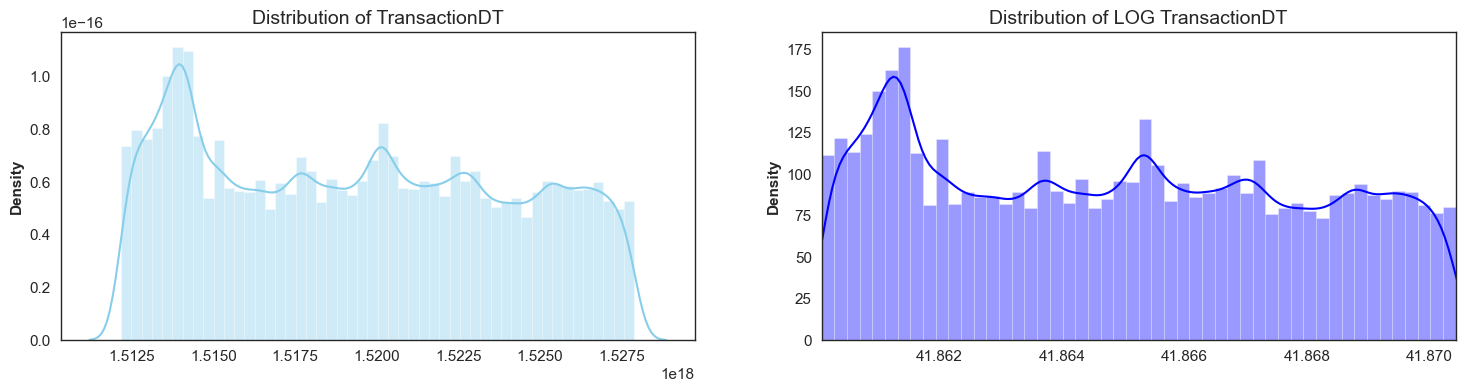

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

time_val = train['TransactionDT'].astype('int64').values

sns.distplot(time_val, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of TransactionDT', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

sns.distplot(np.log(time_val), ax=ax[1], color='b')
ax[1].set_title('Distribution of LOG TransactionDT', fontsize=14)
ax[1].set_xlim([min(np.log(time_val)), max(np.log(time_val))])

plt.show()

TypeError: Converting from datetime64[ns] to int32 is not supported. Do obj.astype('int64').astype(dtype) instead

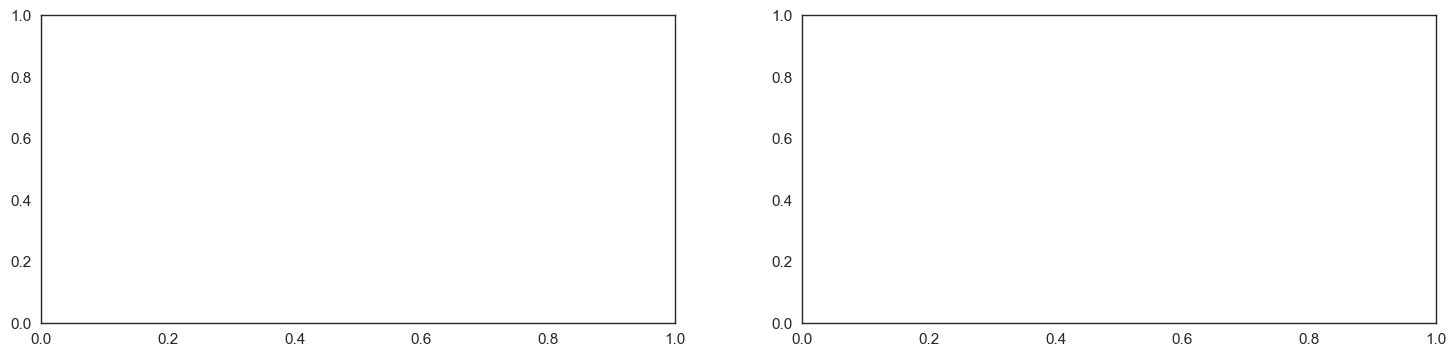

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

time_val = train.loc[train['isFraud'] == 1]['TransactionDT'].astype(int).values

sns.distplot(np.log(time_val), ax=ax[0], color='r')
ax[0].set_title('Distribution of LOG TransactionDT, Fraud', fontsize=14)
ax[1].set_xlim([min(np.log(time_val)), max(np.log(time_val))])

time_val = train.loc[train['isFraud'] == 0]['TransactionDT'].astype(int).values

sns.distplot(np.log(time_val), ax=ax[1], color='g')
ax[1].set_title('Distribution of LOG TransactionDT, NoFraud', fontsize=14)
ax[1].set_xlim([min(np.log(time_val)), max(np.log(time_val))])


plt.show()

## Transaction Amount Values Distribution (TransactionAmt)
Another important feature in this dataset is **TransactionAmt**. Let first try to understand the details about this feature in both train and test dataset.

> Is clear that no null(NaN) values present in both train and test dataset. But one interesting observation is that upto `75%` values are below 125 but suddenly it rises to around 32,000 in train and 10,000 in test.
- Max value of `train transactionAmt` is much more than the `test transactionAmt`.
- May be some of `outliers` are there in the train data 

In [ ]:
# Analysis on TransactionAmt of both train and test
transactionAmtDescribe = describe(train,test,'TransactionAmt')  
transactionAmtDescribe

TransactionAmt       Train  TrainFraud TrainNoFraud        Test
0           count    590540.0     20663.0     569877.0    506691.0
1            mean  135.027176  149.244779   134.511665  134.725568
2             std  239.162522  232.212163   239.395078  245.779822
3             min       0.251       0.292        0.251       0.018
4             25%      43.321      35.044        43.97        40.0
5             50%      68.769        75.0         68.5       67.95
6             75%       125.0       161.0        120.0       125.0
7             max   31937.391      5191.0    31937.391     10270.0
8          unique       20902        2515        20560       14119
9             NaN           0           0            0           0
10       NaNshare         0.0         0.0          0.0         0.0

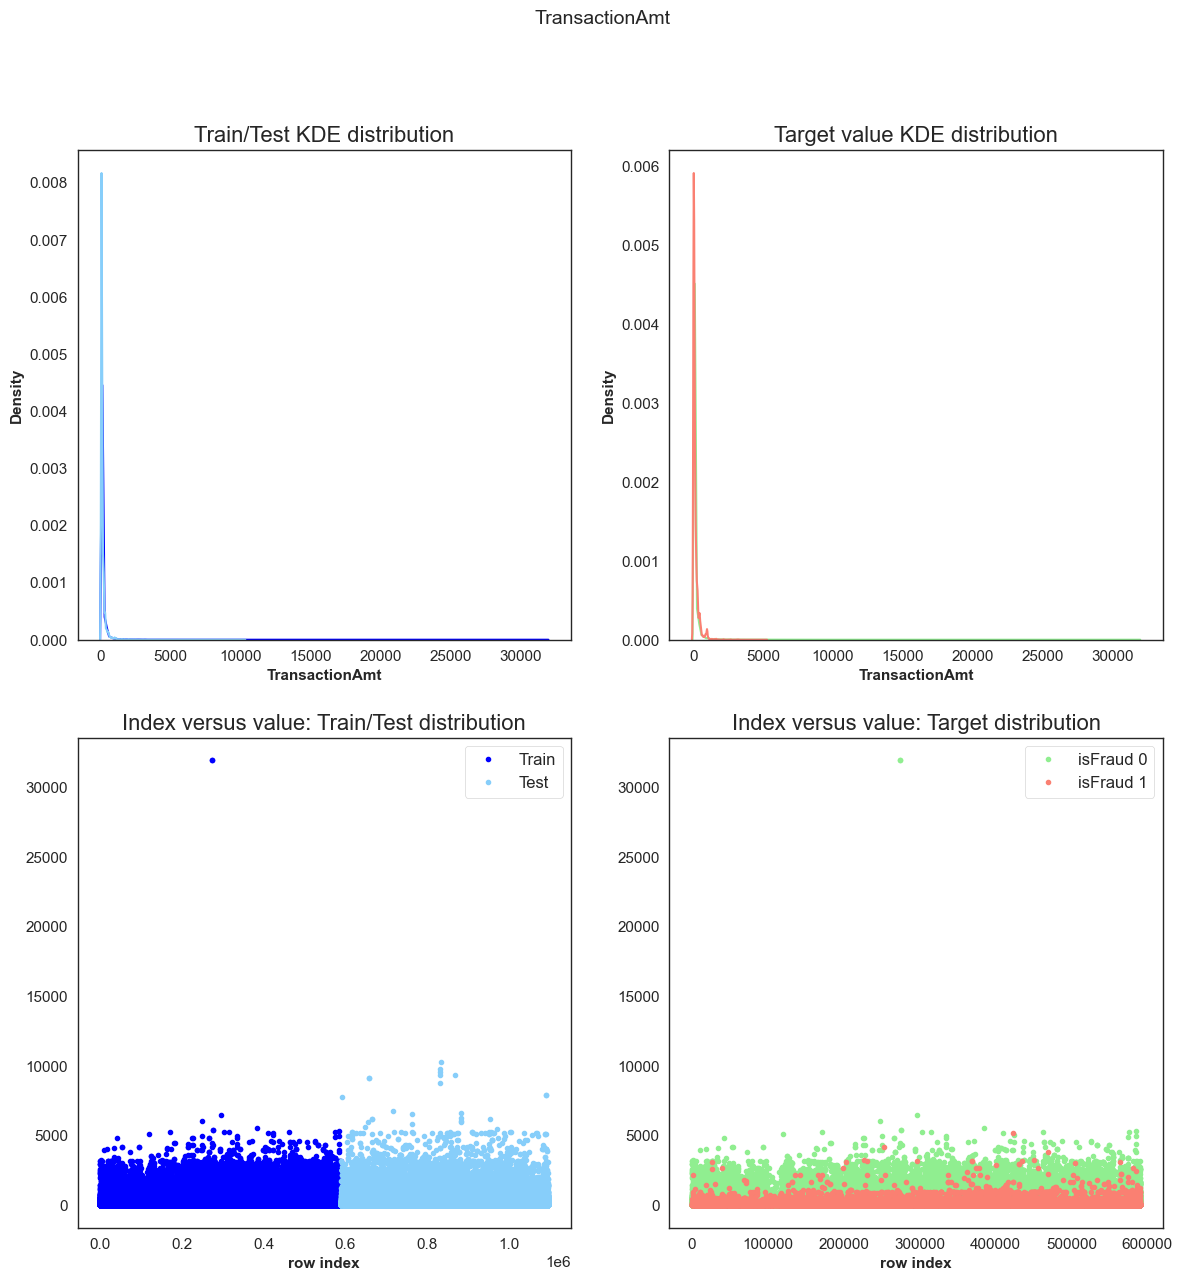

In [ ]:
plot_numerical('TransactionAmt')

Moving average for `TransactionAmt` over time.

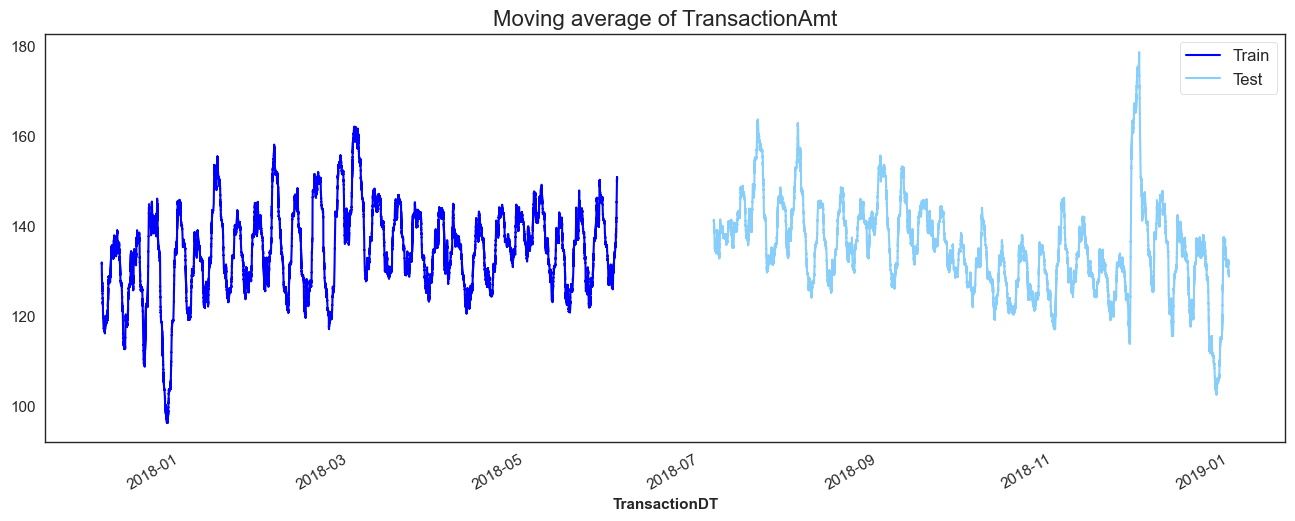

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(16, 6))
axes.set_title('Moving average of TransactionAmt', fontsize=16)
train[['TransactionDT', 'TransactionAmt']].set_index('TransactionDT').rolling(10000).mean().plot(ax=axes, color='blue' )
test[['TransactionDT', 'TransactionAmt']].set_index('TransactionDT').rolling(10000).mean().plot(ax=axes, color='#87CEFA')
axes.legend(['Train', 'Test'])

TypeError: agg function failed [how->mean,dtype->object]

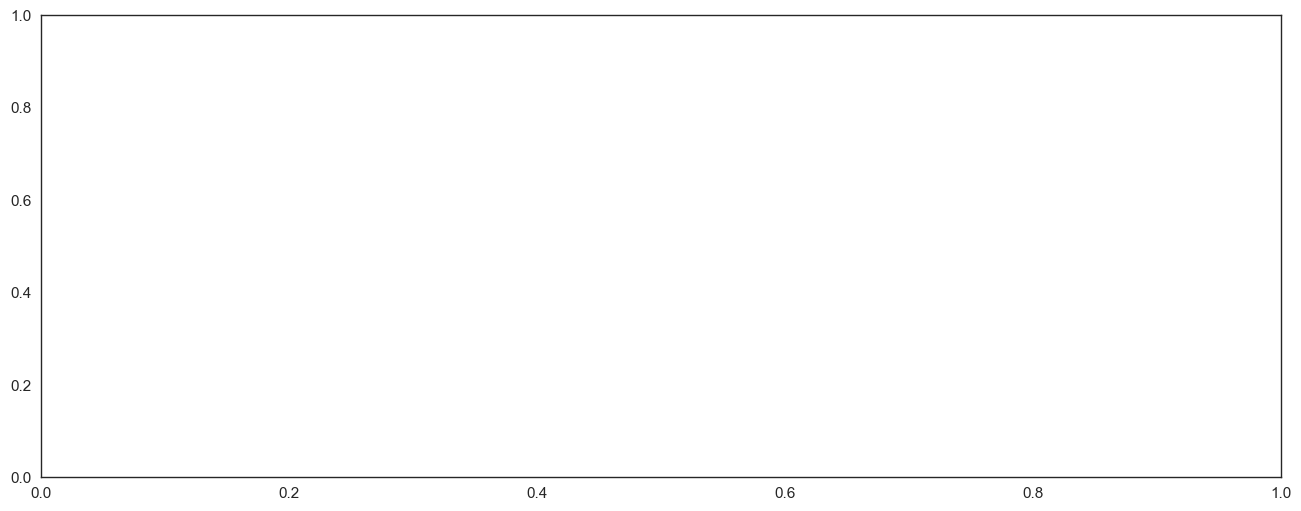

In [37]:
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
train.set_index('TransactionDT').resample('D').mean()['TransactionAmt'].plot(ax=axes, color='blue').set_ylabel('TransactionAmt mean', fontsize=14);
test.set_index('TransactionDT').resample('D').mean()['TransactionAmt'].plot(ax=axes, color='#87CEFA').set_ylabel('TransactionAmt mean', fontsize=14);
axes.set_title('Mean of TransactionAmt by Months', fontsize=16);

A relationship between mean of TransactionAmt by day and a mean of isFraud by day.

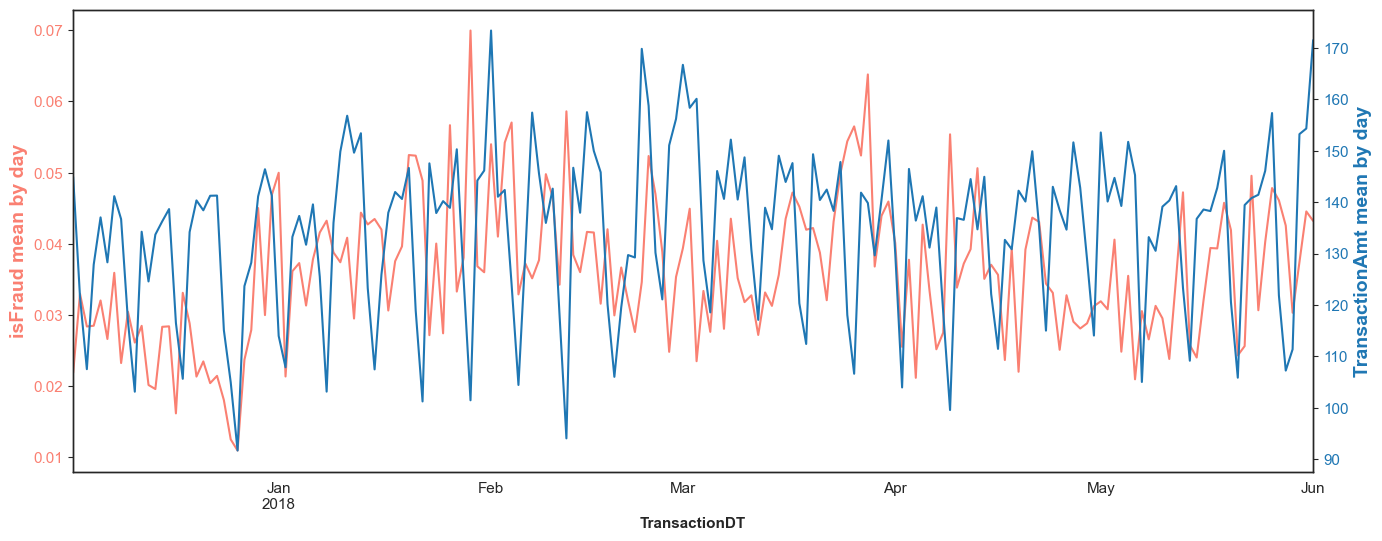

In [ ]:
fig, ax1 = plt.subplots(figsize=(16, 6))

# Ensure TransactionDT is a datetime
train['TransactionDT'] = pd.to_datetime(train['TransactionDT'])

# Resample and calculate mean
isFraud_mean = train.set_index('TransactionDT').resample('D')['isFraud'].mean()
transactionAmt_mean = train.set_index('TransactionDT').resample('D')['TransactionAmt'].mean()

# Plot the results
isFraud_mean.plot(ax=ax1, color='#FA8072')
ax1.tick_params(axis='y', labelcolor='#FA8072')
ax1.set_ylabel('isFraud mean by day', color='#FA8072', fontsize=14)
ax2 = ax1.twinx()
transactionAmt_mean.plot(ax=ax2, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylabel('TransactionAmt mean by day', color='tab:blue', fontsize=14)
ax2.grid(False)

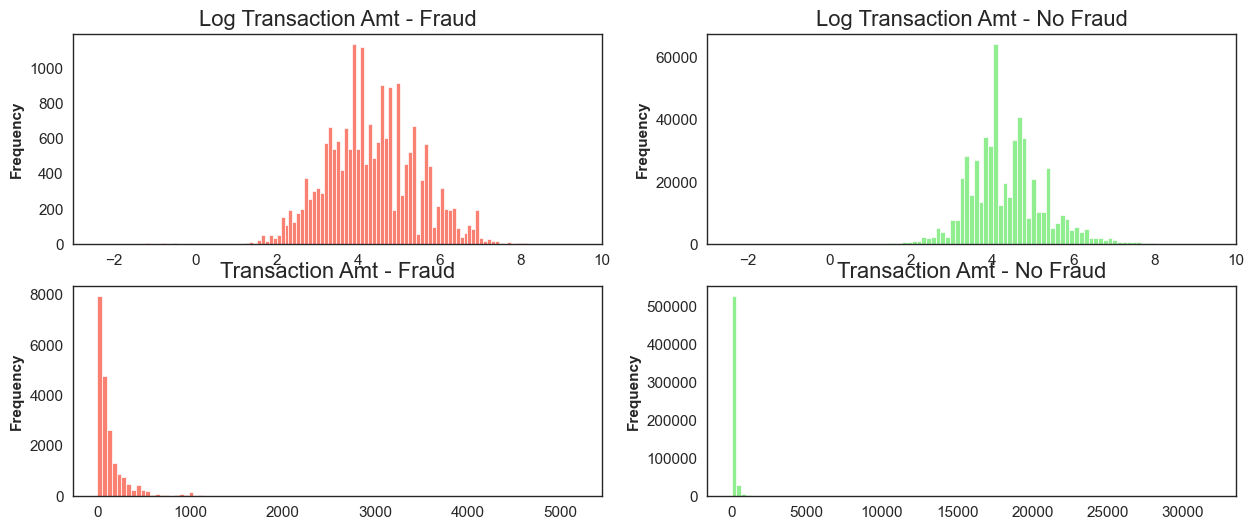

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 6))
train.loc[train['isFraud'] == 1] ['TransactionAmt'].apply(np.log).plot(kind='hist',
                                                                       bins=100,
                                                                       title='Log Transaction Amt - Fraud',
                                                                       color='#FA8072',
                                                                       xlim=(-3, 10),
                                                                       ax= ax1)
train.loc[train['isFraud'] == 0]['TransactionAmt'].apply(np.log).plot(kind='hist',
                                                                      bins=100,
                                                                      title='Log Transaction Amt - No Fraud',
                                                                      color='#90EE90',
                                                                      xlim=(-3, 10),
                                                                      ax=ax2)
train.loc[train['isFraud'] == 1]['TransactionAmt'].plot(kind='hist',
                                                        bins=100,
                                                        title='Transaction Amt - Fraud',
                                                        color='#FA8072',
                                                        ax= ax3)
train.loc[train['isFraud'] == 0]['TransactionAmt'].plot(kind='hist',
                                                        bins=100,
                                                        title='Transaction Amt - No Fraud',
                                                        color='#90EE90',
                                                        ax=ax4)
plt.show()

In [ ]:
corr('TransactionAmt')

In [ ]:
train['Weekdays'] = train['TransactionDT'].dt.dayofweek
train['Hours'] = train['TransactionDT'].dt.hour
train['Days'] = train['TransactionDT'].dt.day

##Top Days with highest Total Transaction Amount

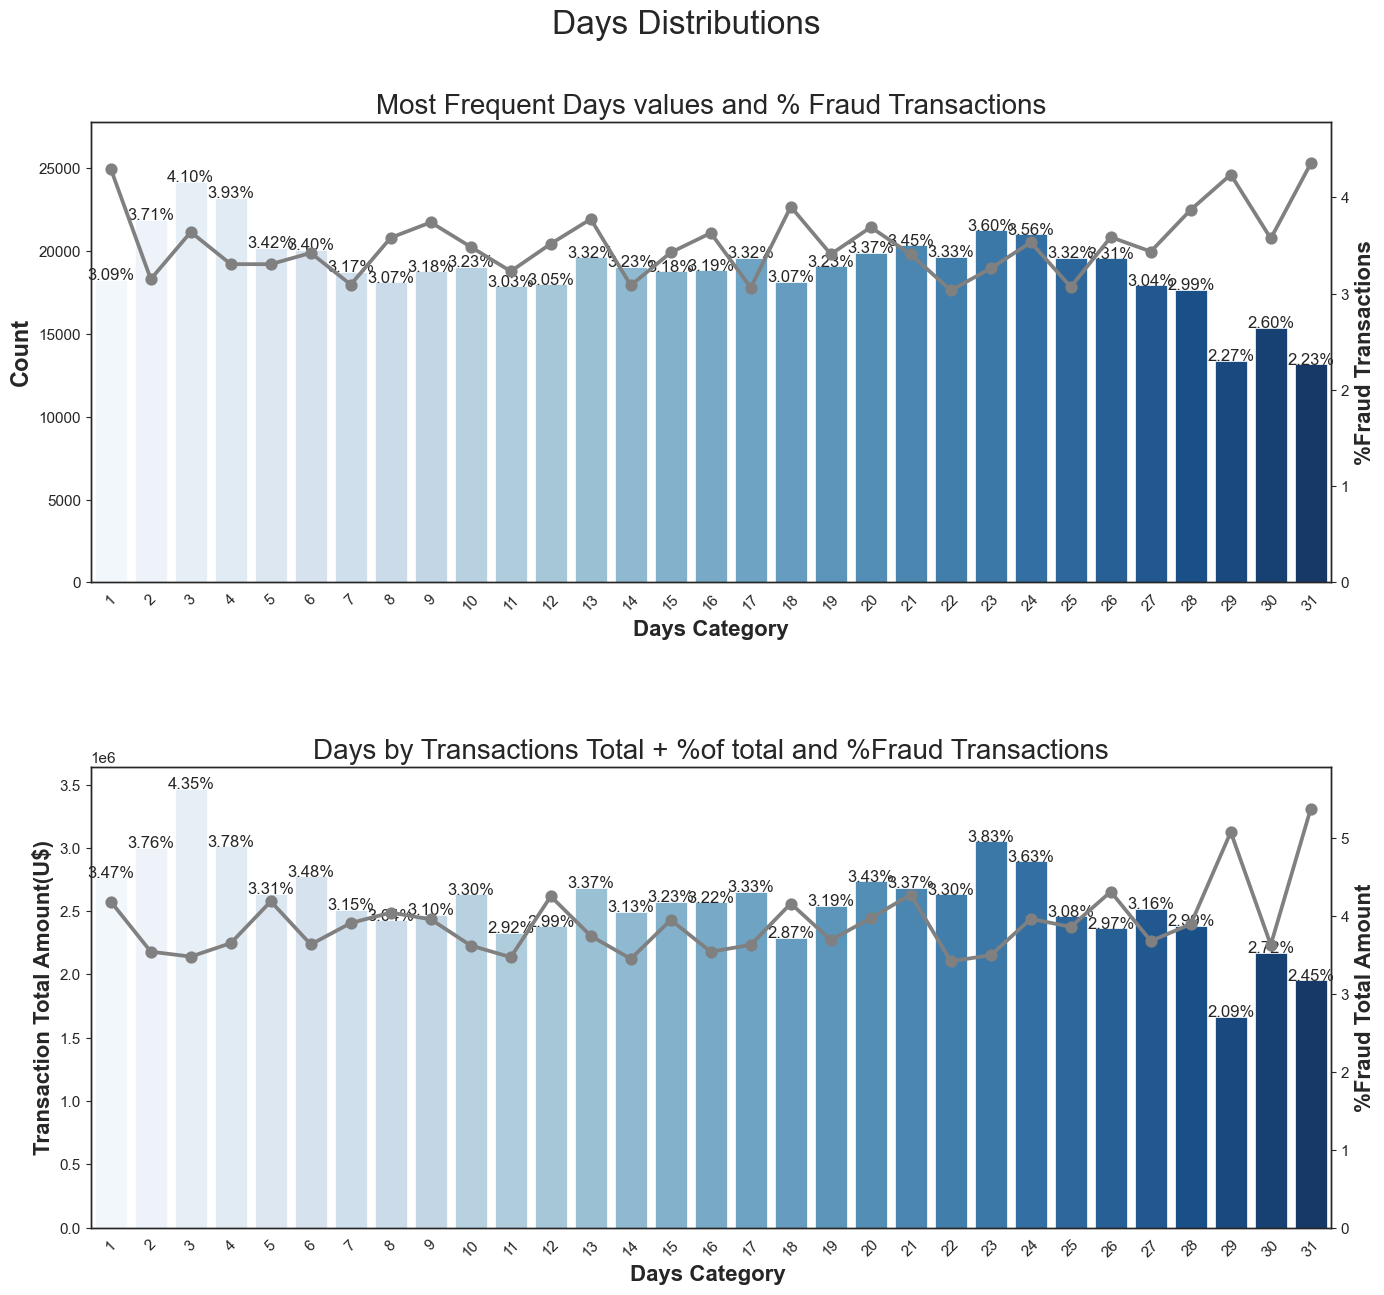

In [ ]:
ploting_cnt_amt(train, 'Days')

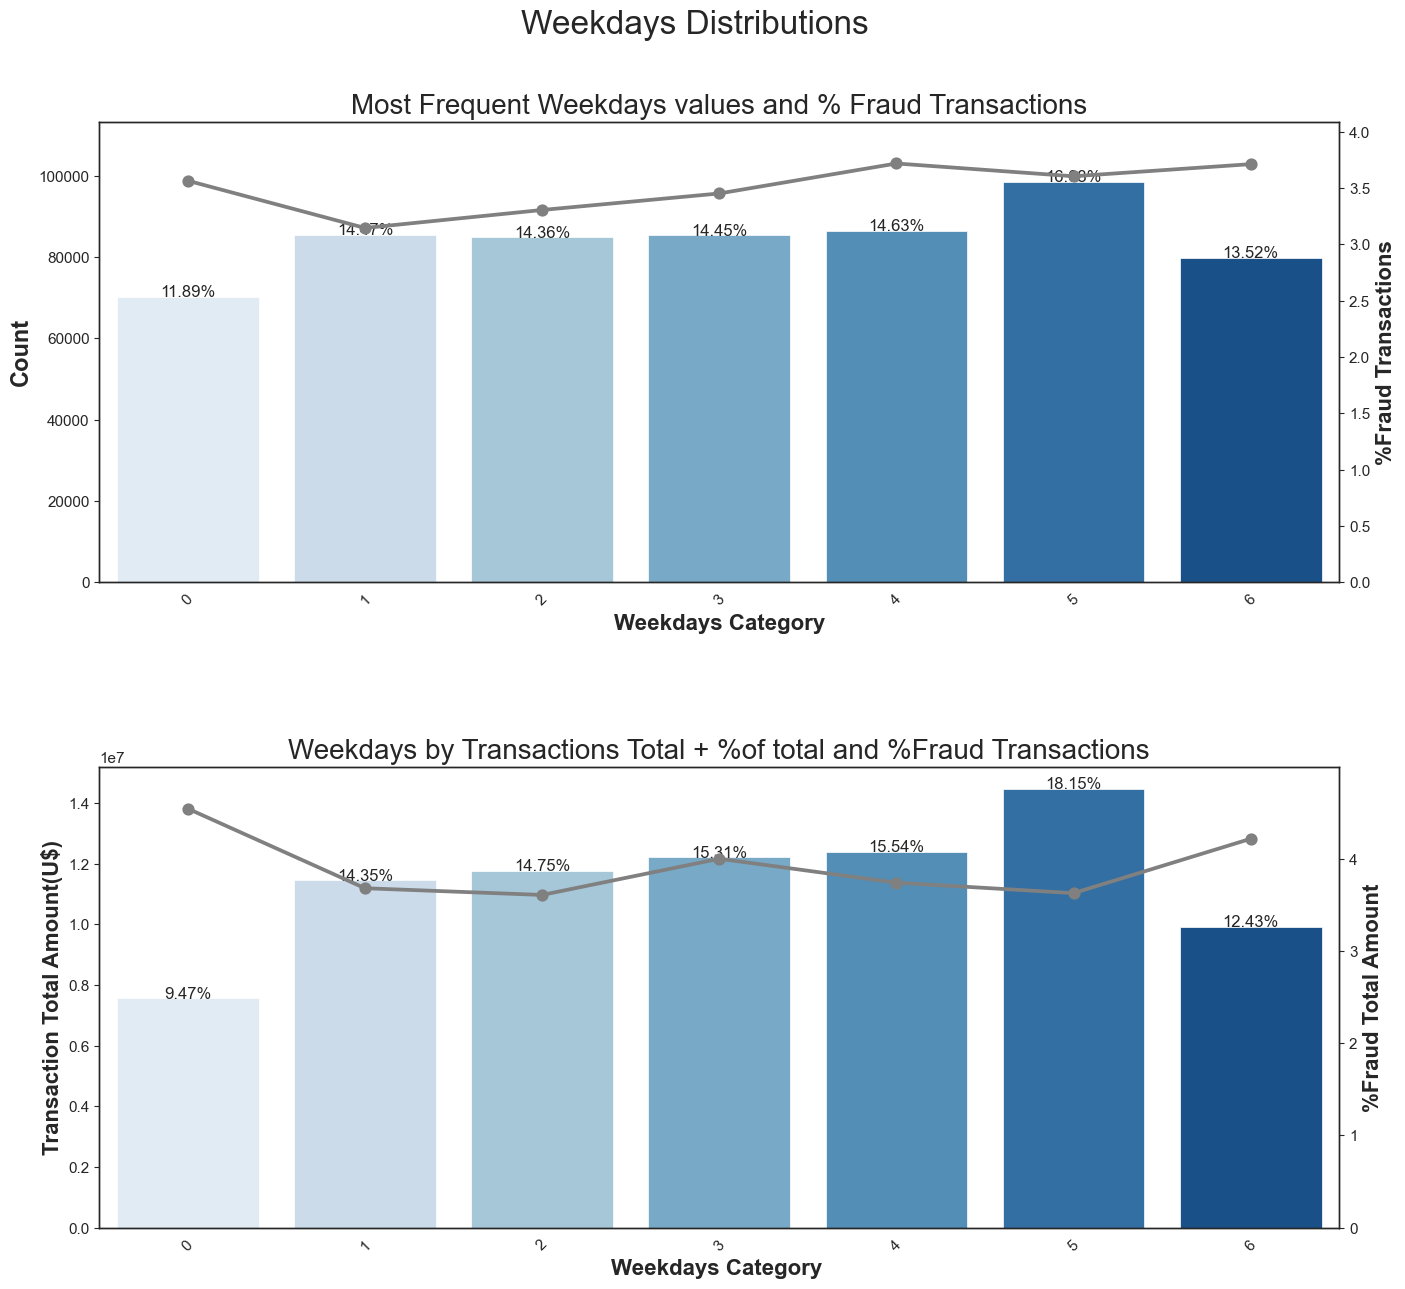

In [ ]:
ploting_cnt_amt(train, 'Weekdays')

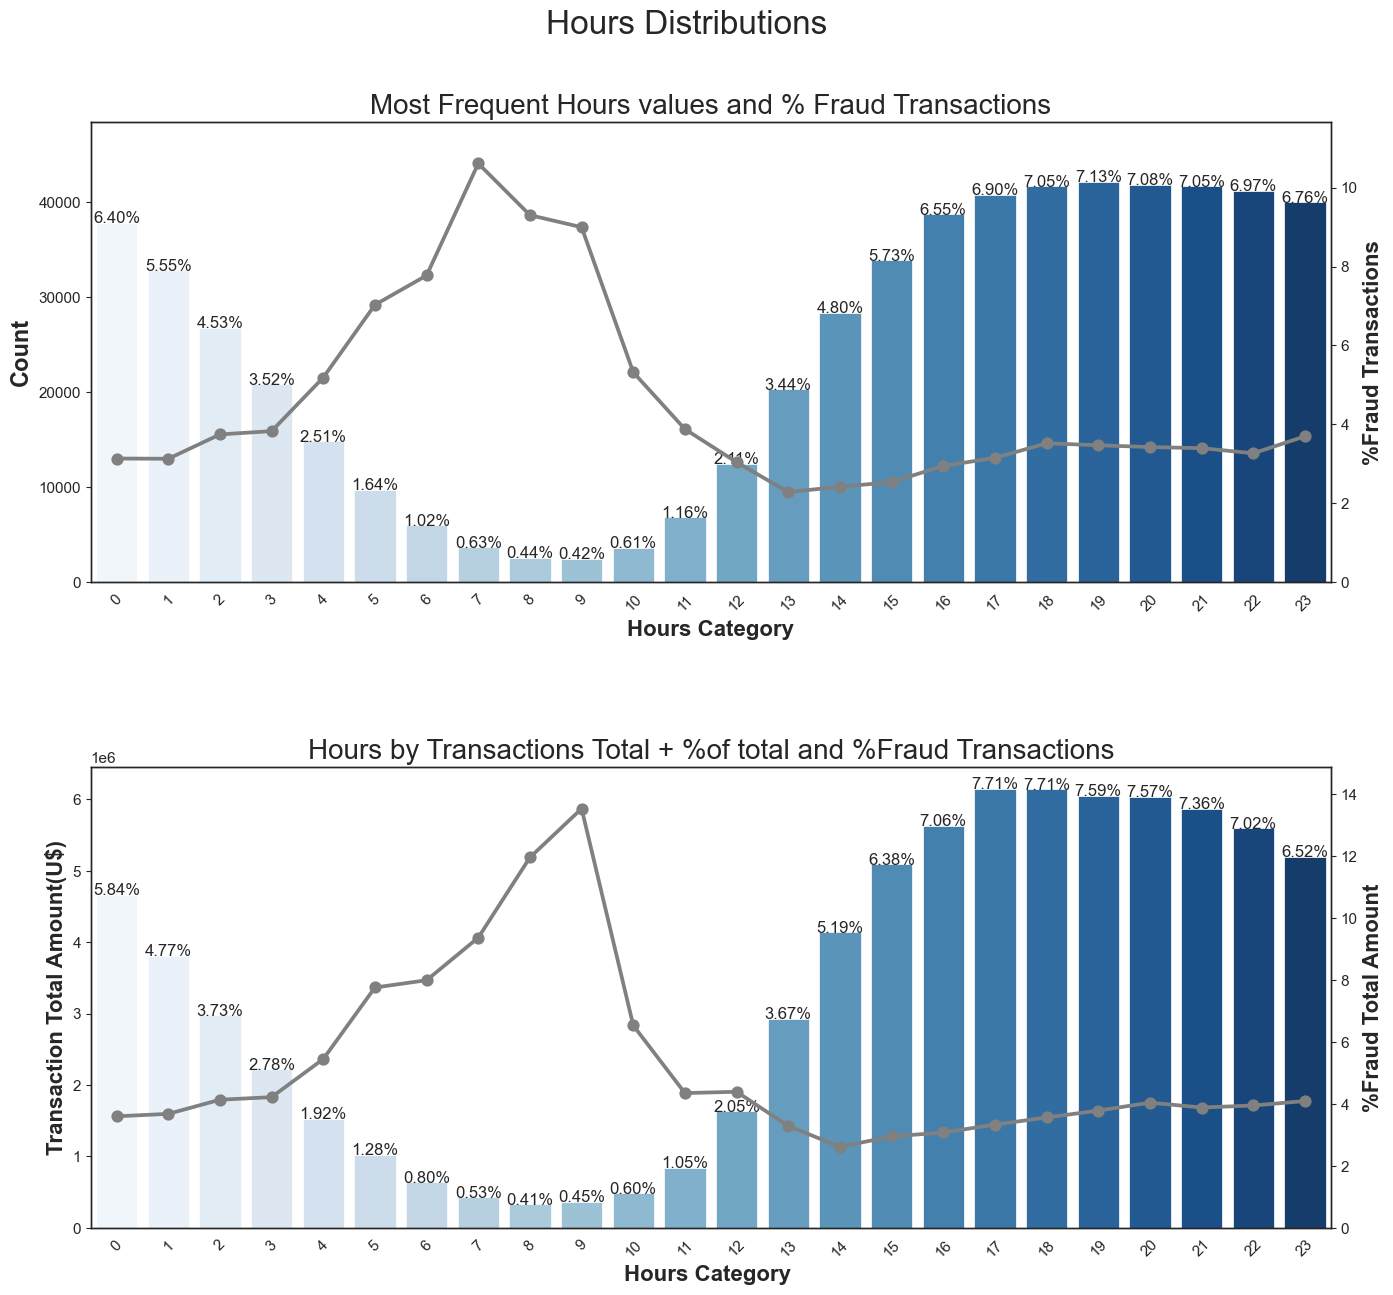

In [ ]:
ploting_cnt_amt(train, 'Hours')

- Around 7,8,9 and 10 hours we can see that there's a daily spike in the  amount of fraud indicated by the gray line.

In [38]:
print('Mean transaction amt for fraud is {:.4f}'.format(train.loc[train['isFraud'] == 1]['TransactionAmt'].mean()))
print('Mean transaction amt for non-fraud is {:.4f}'.format(train.loc[train['isFraud'] == 0]['TransactionAmt'].mean()))

Mean transaction amt for fraud is 149.2448
Mean transaction amt for non-fraud is 134.5117


In [ ]:
# Lets see using the threshold 10000 above
train[train['TransactionAmt']>10000]

TransactionID  isFraud       TransactionDT  TransactionAmt ProductCD  card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2 P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  C13  C14   D1  D2   D3   D4   D5  D6  D7  D8  D9  D10  D11  D12  D13  D14  D15 M1 M2 M3   M4  ... V337 V338 V339 id_01 id_02  id_03  id_04  id_05  id_06  id_07  id_08  id_09  id_10  id_11  id_12  id_13  id_14  id_15  id_16  id_17  id_18  id_19  id_20  id_21  id_22  id_23  id_24  id_25  id_26  id_27  id_28  id_29  id_30  id_31  id_32  id_33  id_34  id_35  id_36  id_37  id_38  DeviceType  DeviceInfo  day  hour  alertFeature    TransactionDT_int  Weekdays  Hours  Days
274336        3261336      0.0 2018-02-15 23:52:40       31937.391         W  16075  514.0  150.0  mastercard  102.0  credit  205.0   87.0   27.0    NaN     yahoo.com           NaN  1.0  2.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0 NaN NaN NaN NaN  0.0  0.0  NaN  NaN  NaN  0.0  T  T  T  NaN  ...  NaN  NaN  NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN         NaN         NaN    6    23   mediumalert  1518738760000000000         3     23    15
274339        3261339      0.0 2018-02-15 23:53:11       31937.391         W  16075  514.0  150.0  mastercard  102.0  credit  205.0   87.0   27.0    NaN     yahoo.com           NaN  1.0  2.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0 NaN NaN NaN NaN  0.0  0.0  NaN  NaN  NaN  0.0  T  T  T  NaN  ...  NaN  NaN  NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN         NaN         NaN    6    23   mediumalert  1518738791000000000         3     23    15

[2 rows x 441 columns]

Only 2 values which have higher than 10,000 and these 2 values seems like duplicate. Lets remove these 2 values.

In [ ]:
train = train[train['TransactionAmt']<10000]

Text(0.5, 1.0, 'Test')

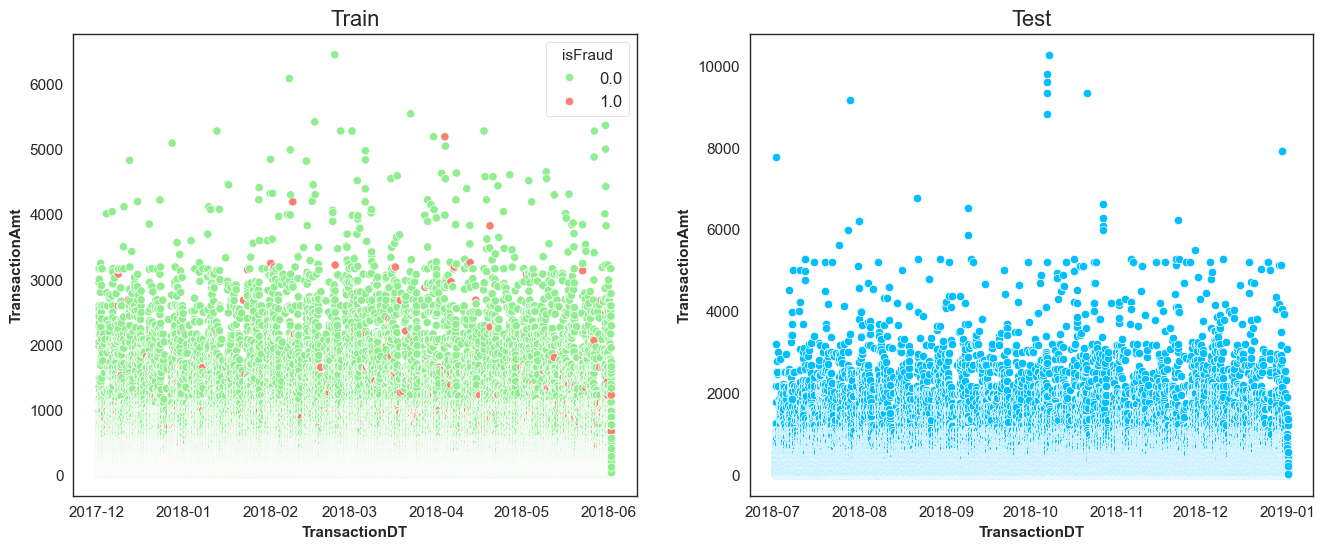

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x="TransactionDT",y="TransactionAmt",hue="isFraud",palette=['#90EE90', '#FA8072'], data=train)
plt.title('Train')

plt.subplot(1,2,2)
sns.scatterplot(x="TransactionDT",y="TransactionAmt", color='#00BFFF', data=test)
plt.title('Test')

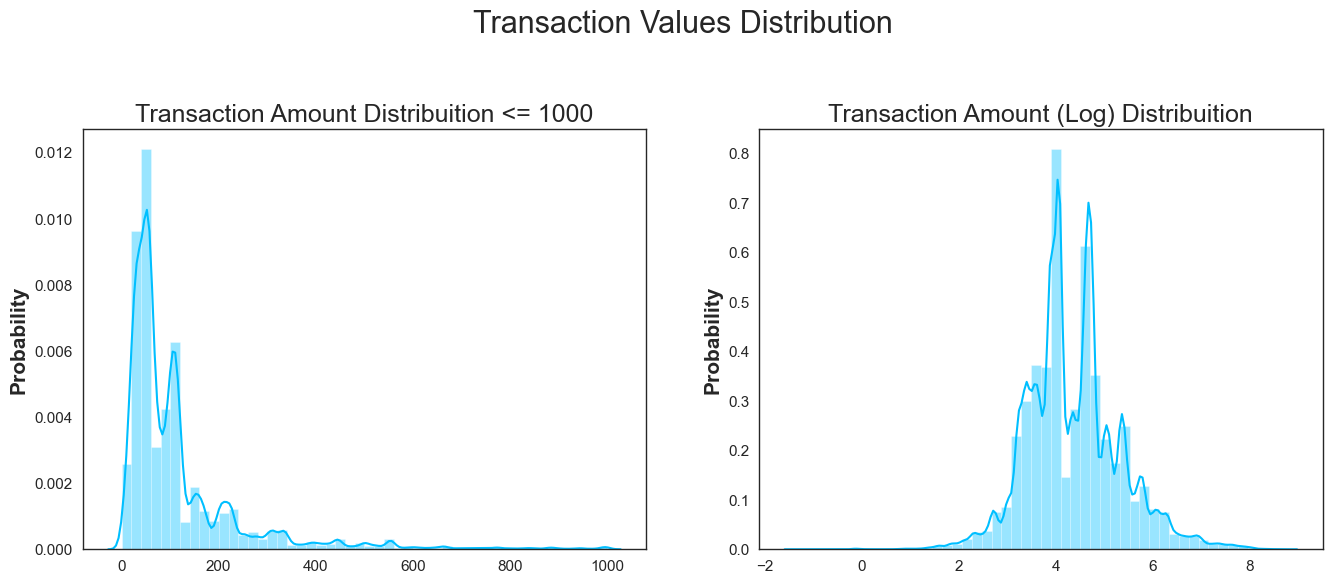

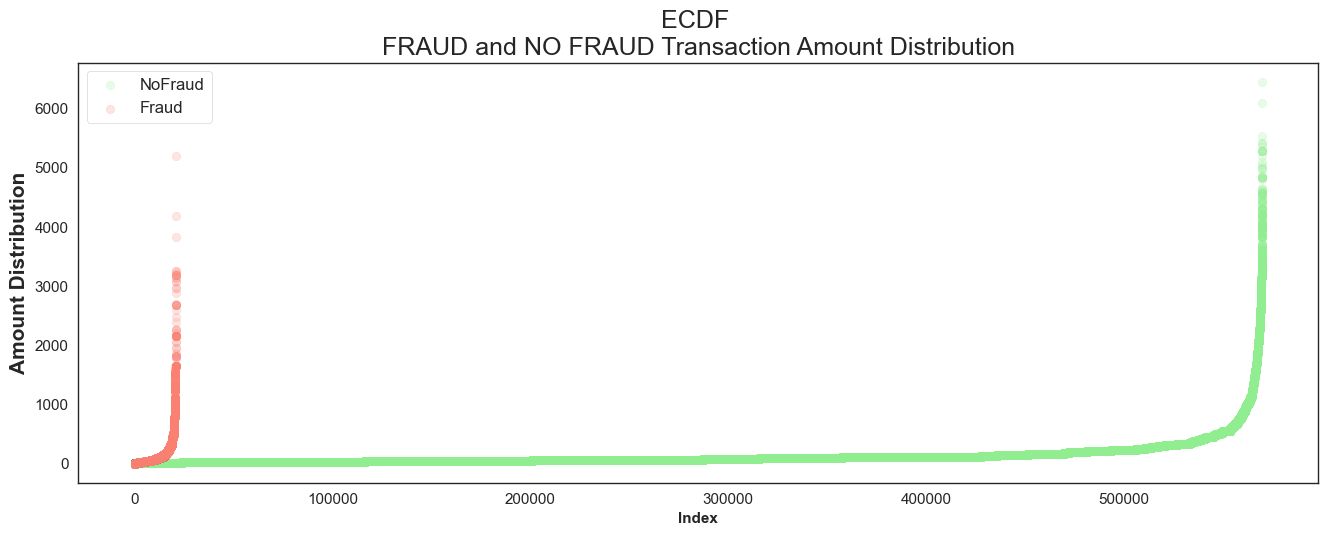

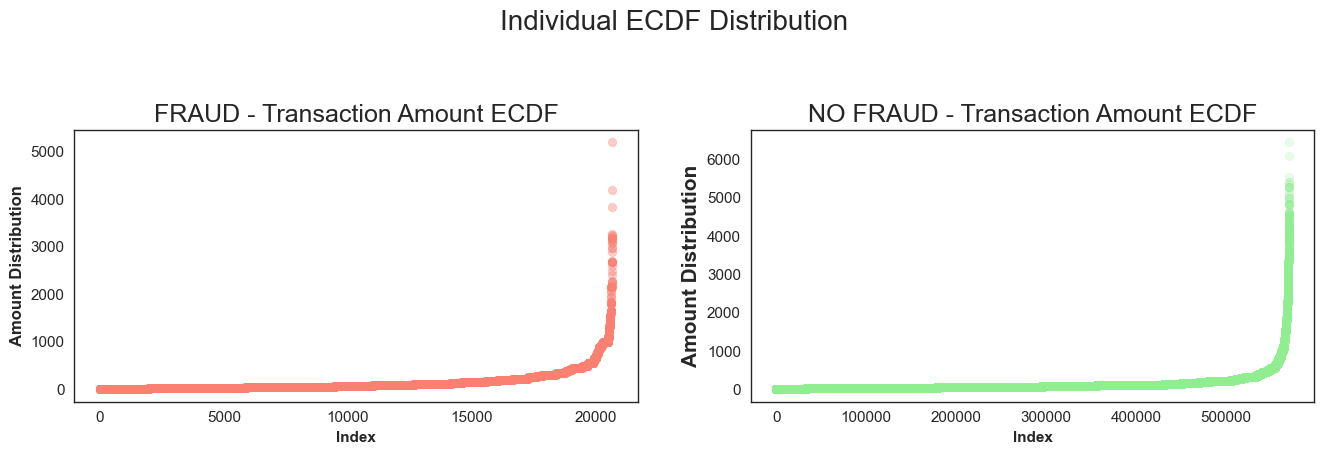

In [ ]:
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
sub_plot_1 = sns.distplot(train[train['TransactionAmt'] <= 1000]['TransactionAmt'], color='#00BFFF')
sub_plot_1.set_title("Transaction Amount Distribuition <= 1000", fontsize=18)
sub_plot_1.set_xlabel("")
sub_plot_1.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
sub_plot_2 = sns.distplot(np.log(train['TransactionAmt']),color='#00BFFF')
sub_plot_2.set_title("Transaction Amount (Log) Distribuition", fontsize=18)
sub_plot_2.set_xlabel("")
sub_plot_2.set_ylabel("Probability", fontsize=15)

plt.figure(figsize=(16,12))


plt.subplot(212)
sub_plot_3 = plt.scatter(range(train[train['isFraud'] == 0].shape[0]),
                 np.sort(train[train['isFraud'] == 0]['TransactionAmt'].values), 
                 label='NoFraud', alpha=.2, color='#90EE90')
sub_plot_3 = plt.scatter(range(train[train['isFraud'] == 1].shape[0]),
                 np.sort(train[train['isFraud'] == 1]['TransactionAmt'].values), 
                 label='Fraud', alpha=.2, color='#FA8072')
sub_plot_3= plt.title("ECDF \nFRAUD and NO FRAUD Transaction Amount Distribution", fontsize=18)
sub_plot_3 = plt.xlabel("Index")
sub_plot_3 = plt.ylabel("Amount Distribution", fontsize=15)
sub_plot_3 = plt.legend()

plt.figure(figsize=(16,12))

plt.subplot(321)
sub_plot_4 = plt.scatter(range(train[train['isFraud'] == 1].shape[0]), 
                 np.sort(train[train['isFraud'] == 1]['TransactionAmt'].values), 
                label='isFraud', alpha=.4, color='#FA8072')
plt.title("FRAUD - Transaction Amount ECDF", fontsize=18)
plt.xlabel("Index")
plt.ylabel("Amount Distribution", fontsize=12)

plt.subplot(322)
sub_plot_5 = plt.scatter(range(train[train['isFraud'] == 0].shape[0]),
                 np.sort(train[train['isFraud'] == 0]['TransactionAmt'].values), 
                 label='NoFraud', alpha=.2, color='#90EE90')
sub_plot_5 = plt.title("NO FRAUD - Transaction Amount ECDF", fontsize=18)
sub_plot_5 = plt.xlabel("Index")
sub_plot_5 = plt.ylabel("Amount Distribution", fontsize=15)

plt.suptitle('Individual ECDF Distribution', fontsize=20)

plt.show()

# Categorical Features - Transaction¶
The data description that the following transaction columns are categorical:

- ProductCD
- card1 - card6
- addr1, addr2
- P_emaildomain
- R_emaildomain
- M1 - M9

## ProductCD 
product code, the product for each transaction and five category of products. And type **'W'** is the marjority.

- **W** has the most number of observations


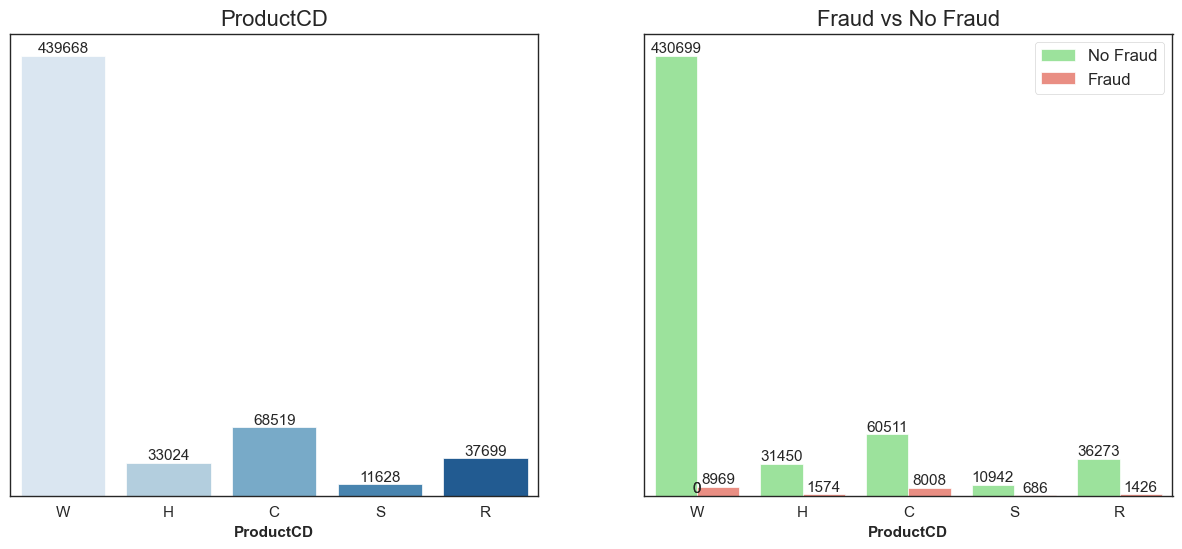

In [ ]:
f,ax=plt.subplots(1,2, figsize=(15,6))
cnt= sns.countplot(x='ProductCD', palette='Blues', data=train, ax=ax[0])
ax[0].set_title('ProductCD')
ax[0].set_ylabel('')
ax[0].set_yticklabels('')
text_annotate(cnt)

cnt2 = sns.countplot(x='ProductCD', hue='isFraud', palette=['#90EE90', '#FA8072'], data=train, ax=ax[1])
ax[1].set_title('Fraud vs No Fraud')
ax[1].legend(['No Fraud','Fraud'])
ax[1].set_ylabel('')
ax[1].set_yticklabels('')
text_annotate(cnt2)

plt.show()

In [ ]:
train['isFraud'].groupby(train['ProductCD']).apply(get_stats).unstack()

No Fraud   Fraud     All Fraud(%)
ProductCD                                   
C           60511.0  8008.0   68519   11.69%
H           31450.0  1574.0   33024    4.77%
R           36273.0  1426.0   37699    3.78%
S           10942.0   686.0   11628    5.90%
W          430701.0  8969.0  439670    2.04%

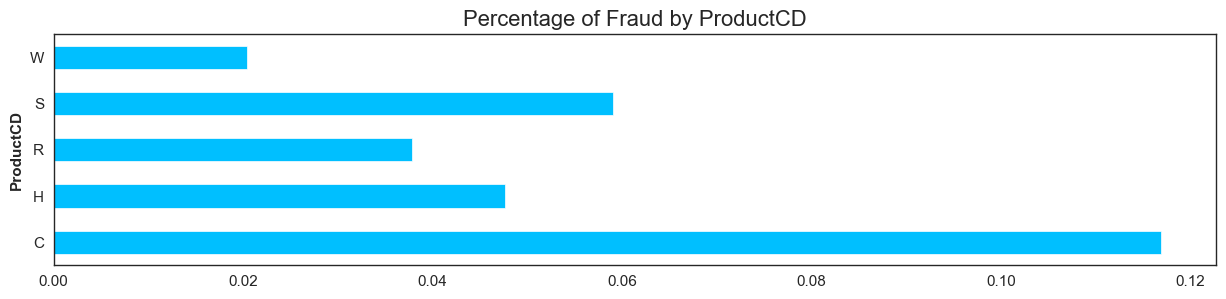

In [ ]:
train.groupby('ProductCD')['isFraud'].mean().sort_index().plot(kind='barh',
                                                               color='#00BFFF',
                                                               figsize=(15, 3),
                                                               title='Percentage of Fraud by ProductCD')
plt.show()

- ProductCD C has the most fraud with >11%
- ProductCD W has the least with ~2%

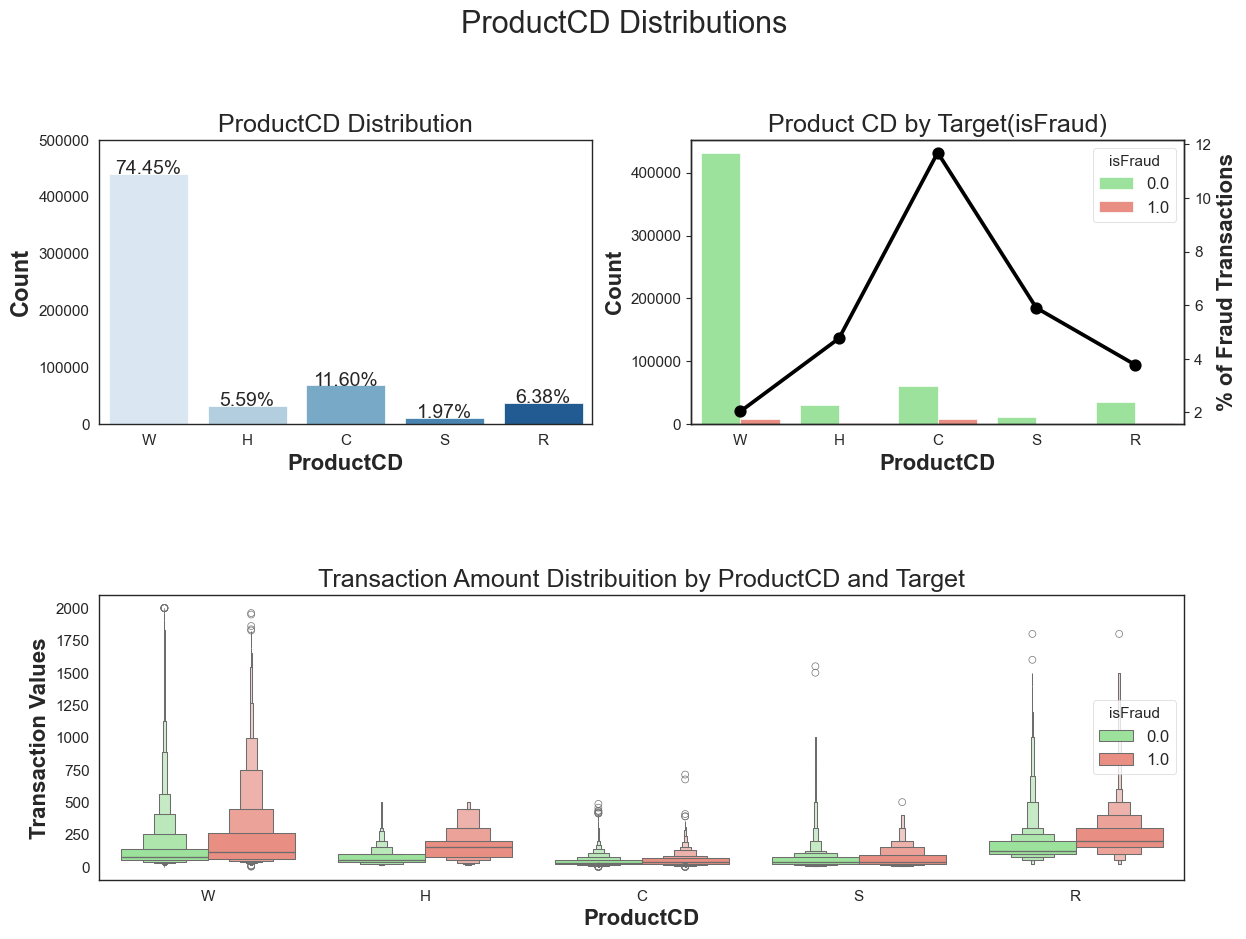

In [ ]:
tmp = pd.crosstab(train['ProductCD'], train['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

plt.figure(figsize=(14,10))
plt.suptitle('ProductCD Distributions', fontsize=22)

plt.subplot(221)
plot_1 = sns.countplot(x='ProductCD', data=train, palette='Blues')

plot_1.set_title("ProductCD Distribution", fontsize=18)
plot_1.set_xlabel("ProductCD", fontsize=16)
plot_1.set_ylabel("Count", fontsize=17)
plot_1.set_ylim(0,500000)
for p in plot_1.patches:
    height = p.get_height()
    plot_1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 

plt.subplot(222)
plot_2 = sns.countplot(x='ProductCD', hue='isFraud',palette=['#90EE90', '#FA8072'], data=train)
plot_2_2 = plot_2.twinx()
plot_2_2 = sns.pointplot(x='ProductCD', y='Fraud', data=tmp, color='black', order=['W', 'H',"C", "S", "R"], legend=False)
plot_2_2.set_ylabel("% of Fraud Transactions", fontsize=16)

plot_2.set_title("Product CD by Target(isFraud)", fontsize=18)
plot_2.set_xlabel("ProductCD", fontsize=16)
plot_2.set_ylabel("Count", fontsize=16)

plt.subplot(212)
plot_3 = sns.boxenplot(x='ProductCD', y='TransactionAmt', hue='isFraud', palette=['#90EE90', '#FA8072'],
              data=train[train['TransactionAmt'] <= 2000] )
plot_3.set_title("Transaction Amount Distribuition by ProductCD and Target", fontsize=18)
plot_3.set_xlabel("ProductCD", fontsize=16)
plot_3.set_ylabel("Transaction Values", fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.85)

plt.show()

Product type **W** and **R** has high mean TransactionAmt.

  ProductCD   count           sum        mean
0         C   68519  2.937571e+06   42.872353
1         H   33024  2.416368e+06   73.170058
2         R   37699  6.344975e+06  168.306188
3         S   11628  7.008136e+05   60.269487
4         W  439670  6.733922e+07  153.158554


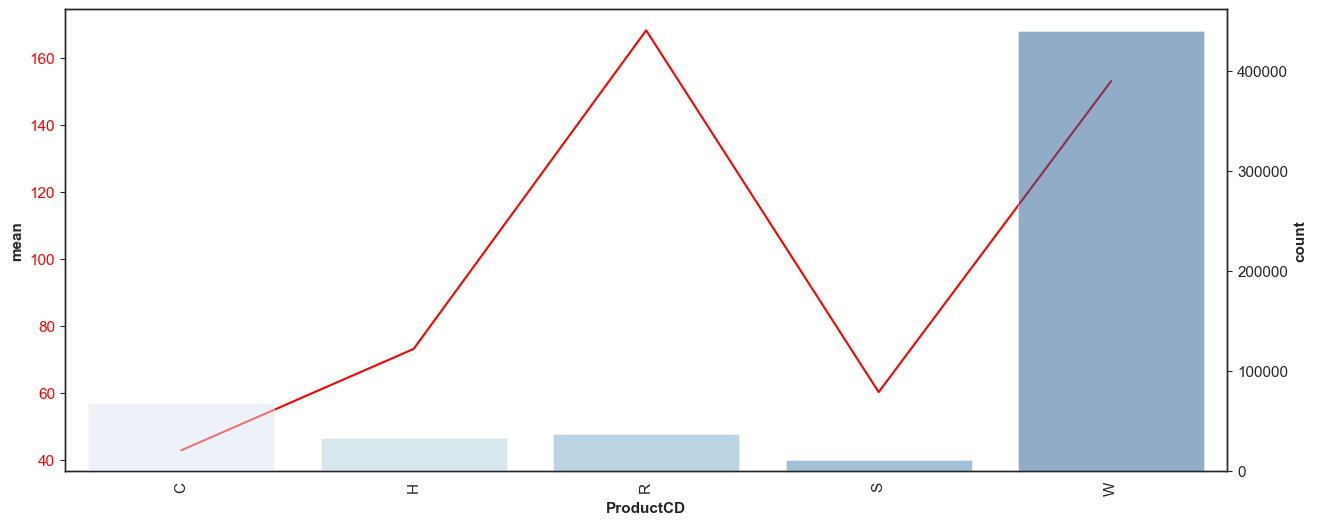

In [ ]:
compare_cate(train_transaction,'ProductCD','TransactionAmt')

## Card Distributions

In [ ]:
card_cols = [c for c in train_transaction.columns if 'card' in c]
train_transaction[card_cols].head()

card1  card2  card3       card4  card5   card6
0  13926    NaN  150.0    discover  142.0  credit
1   2755  404.0  150.0  mastercard  102.0  credit
2   4663  490.0  150.0        visa  166.0   debit
3  18132  567.0  150.0  mastercard  117.0   debit
4   4497  514.0  150.0  mastercard  102.0  credit

## Card 1

Text(0.5, 1.0, 'Test')

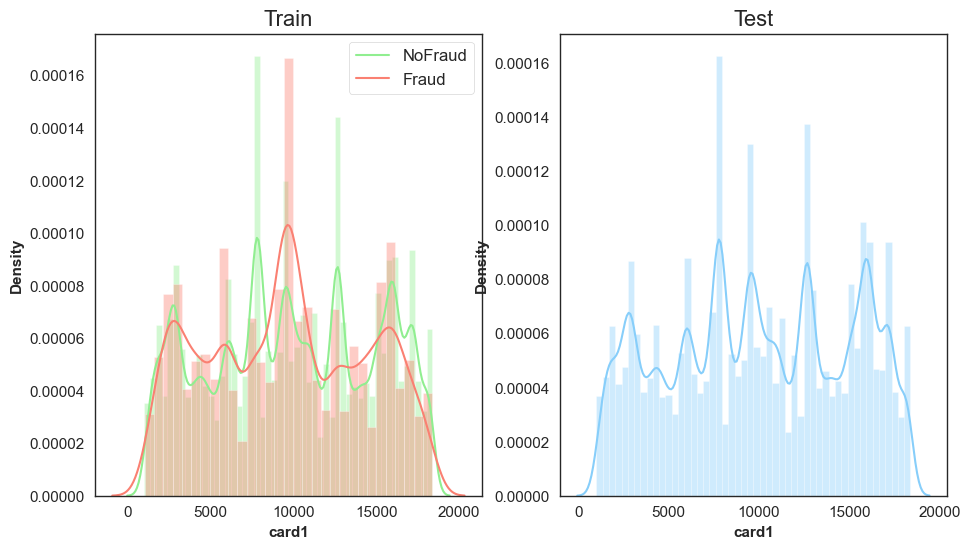

In [ ]:
plt.figure(figsize=(11,6))
plt.subplot(1,2,1)
sns.distplot(train[train['isFraud']==0]['card1'], color='#90EE90')
sns.distplot(train[train['isFraud']==1]['card1'], color='#FA8072')
plt.legend(['NoFraud','Fraud'])
plt.title('Train')
plt.subplot(1,2,2)
sns.distplot(test['card1'],color='#87CEFA')
plt.title('Test')

Plotting this Cards variable gives us such information as:

- Distribution in train and test set is almost equal.
- Distribution between target values differs, which make this feature so valuable

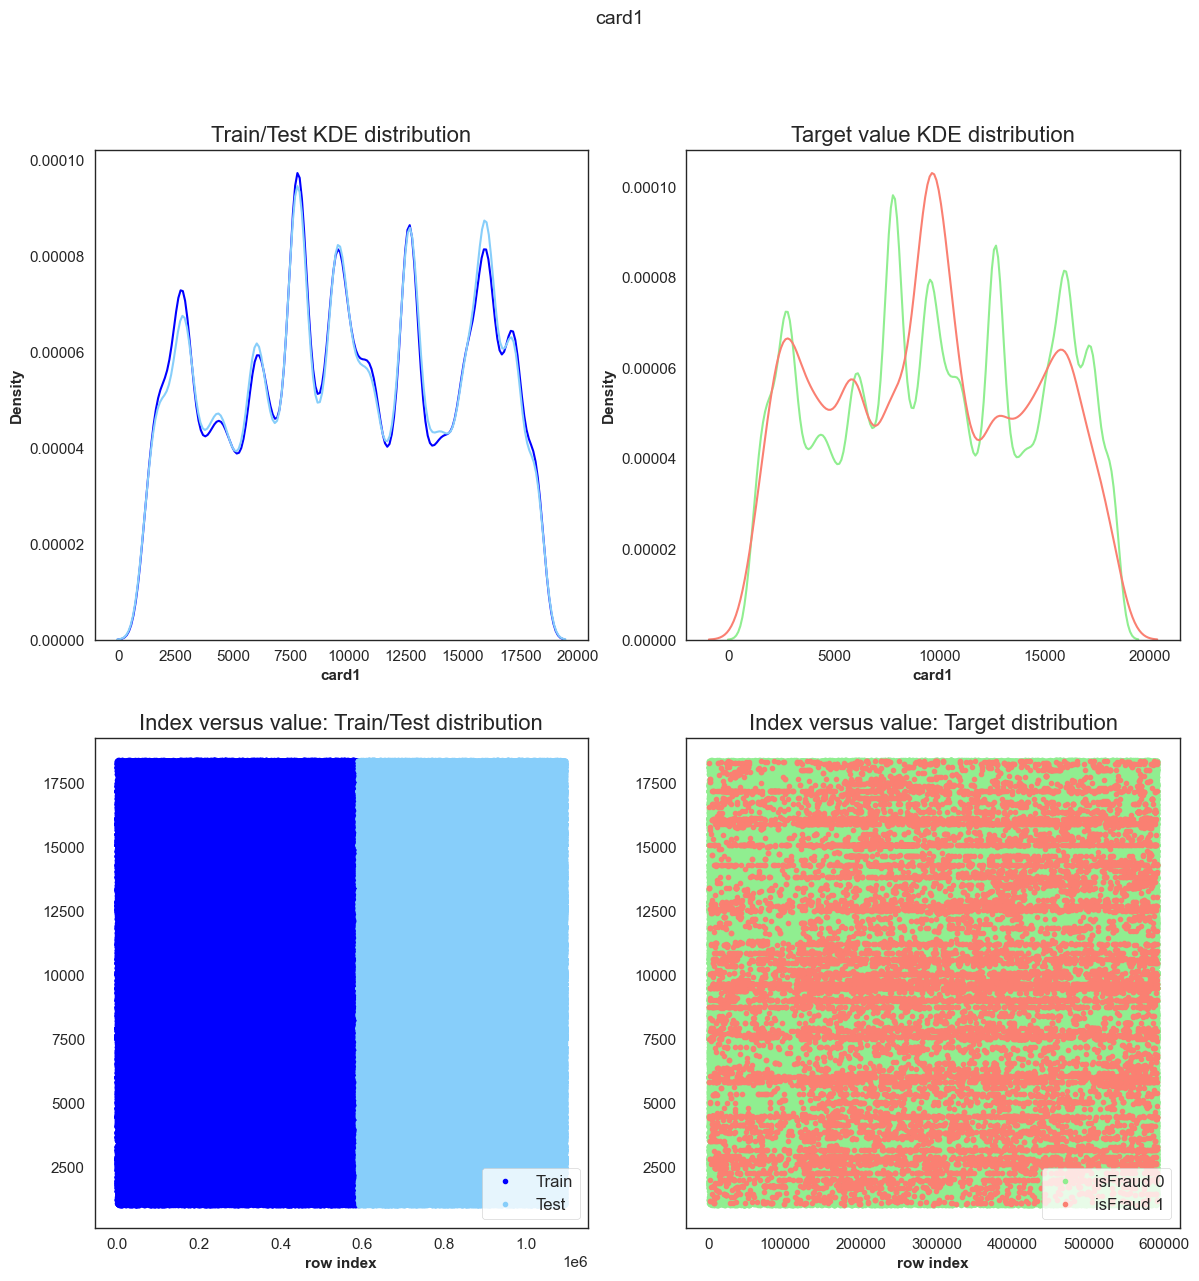

In [ ]:
plot_numerical('card1')

## Card 2

Text(0.5, 1.0, 'Test')

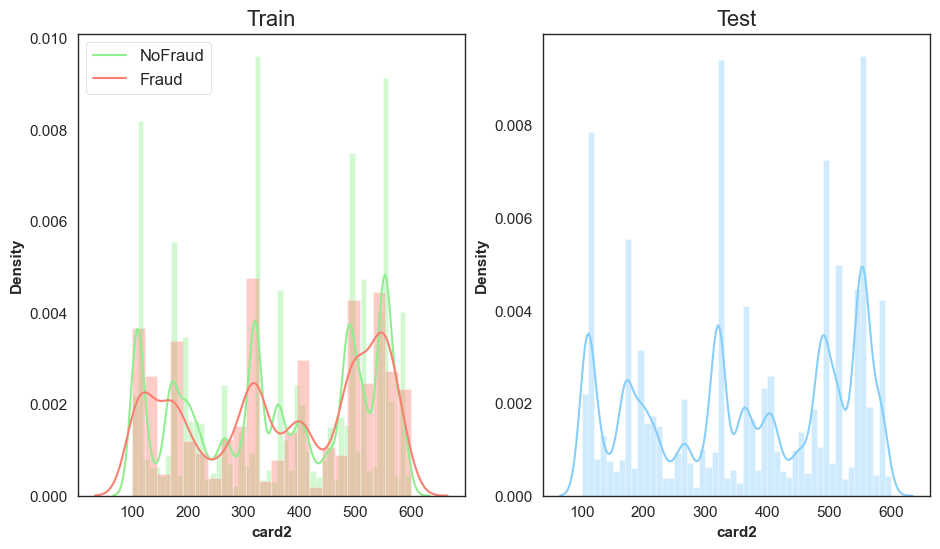

In [ ]:
plt.figure(figsize=(11,6))
plt.subplot(1,2,1)
sns.distplot(train[(train['isFraud']==0) & (~train['card2'].isnull())]['card2'], color='#90EE90')
sns.distplot(train[(train['isFraud']==1) & (~train['card2'].isnull())]['card2'], color='#FA8072')
plt.legend(['NoFraud','Fraud'])
plt.title('Train')
plt.subplot(1,2,2)
sns.distplot(test[~test['card2'].isnull()]['card2'],color='#87CEFA')
plt.title('Test')

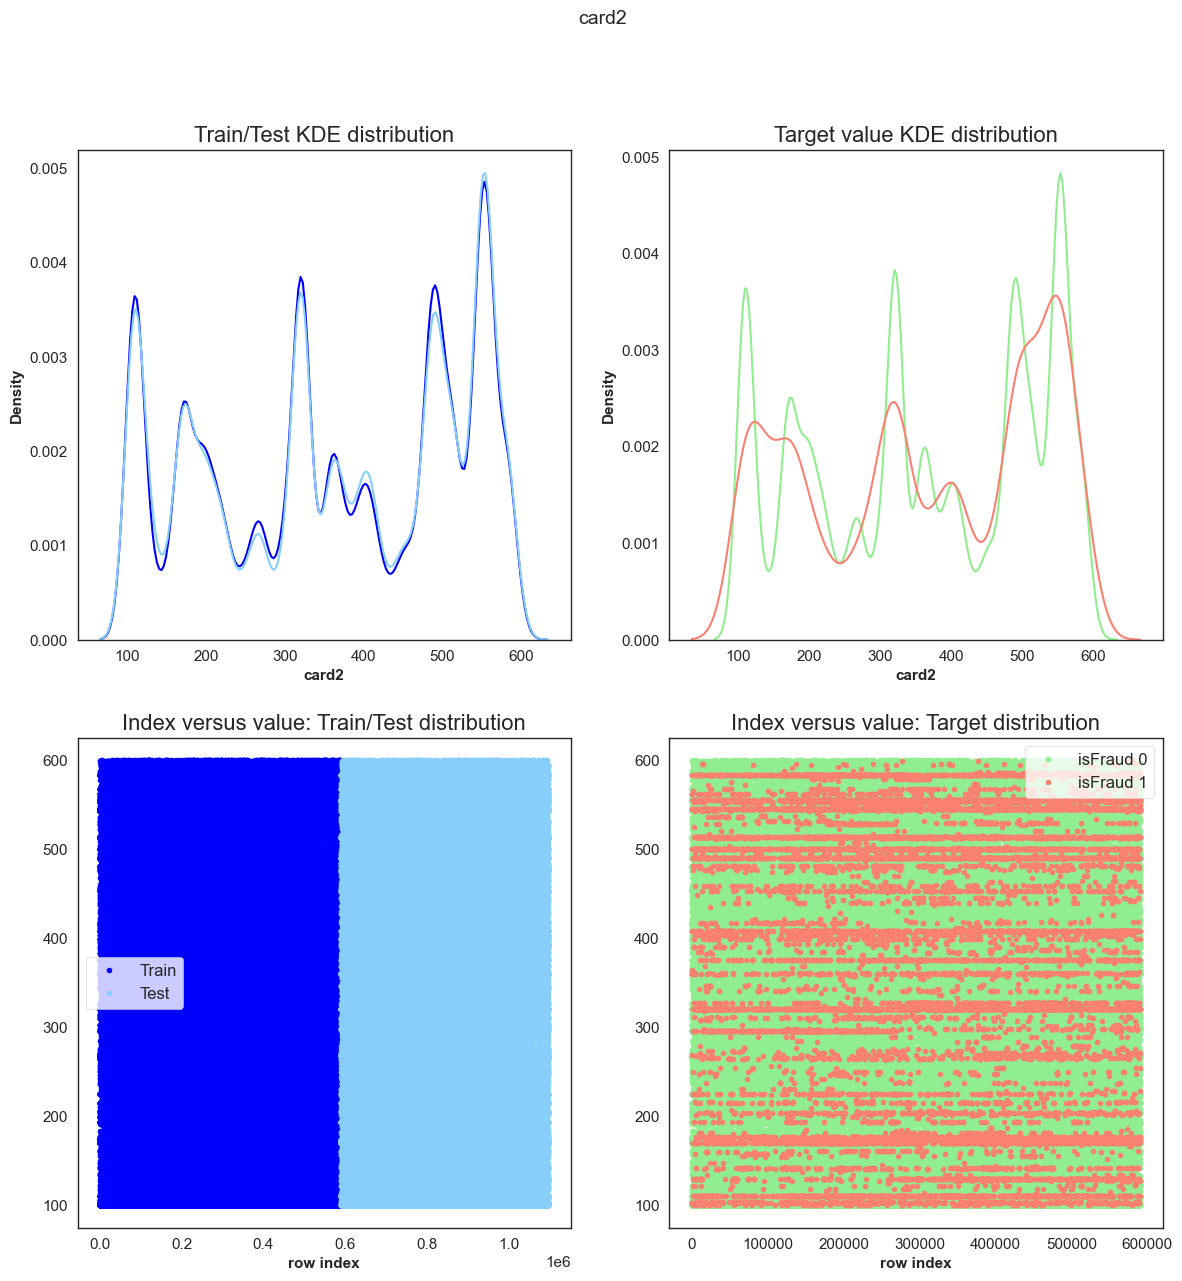

In [ ]:
plot_numerical('card2')

Text(0.5, 1.0, 'Test')

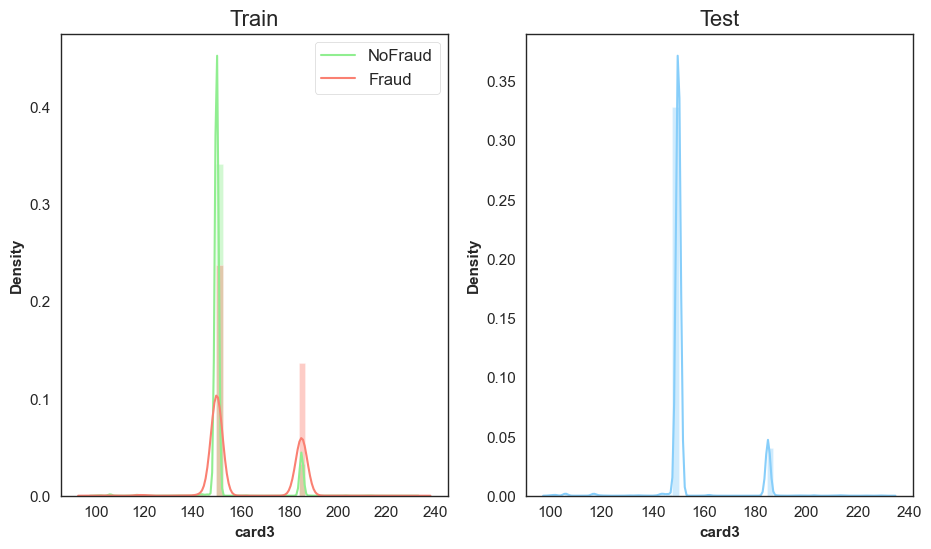

In [ ]:
plt.figure(figsize=(11,6))
plt.subplot(1,2,1)
sns.distplot(train[(train['isFraud']==0) & (~train['card3'].isnull())]['card3'], color='#90EE90')
sns.distplot(train[(train['isFraud']==1) & (~train['card3'].isnull())]['card3'], color='#FA8072')
plt.legend(['NoFraud','Fraud'])
plt.title('Train')
plt.subplot(1,2,2)
sns.distplot(test[~test['card3'].isnull()]['card3'],color='#87CEFA')
plt.title('Test')

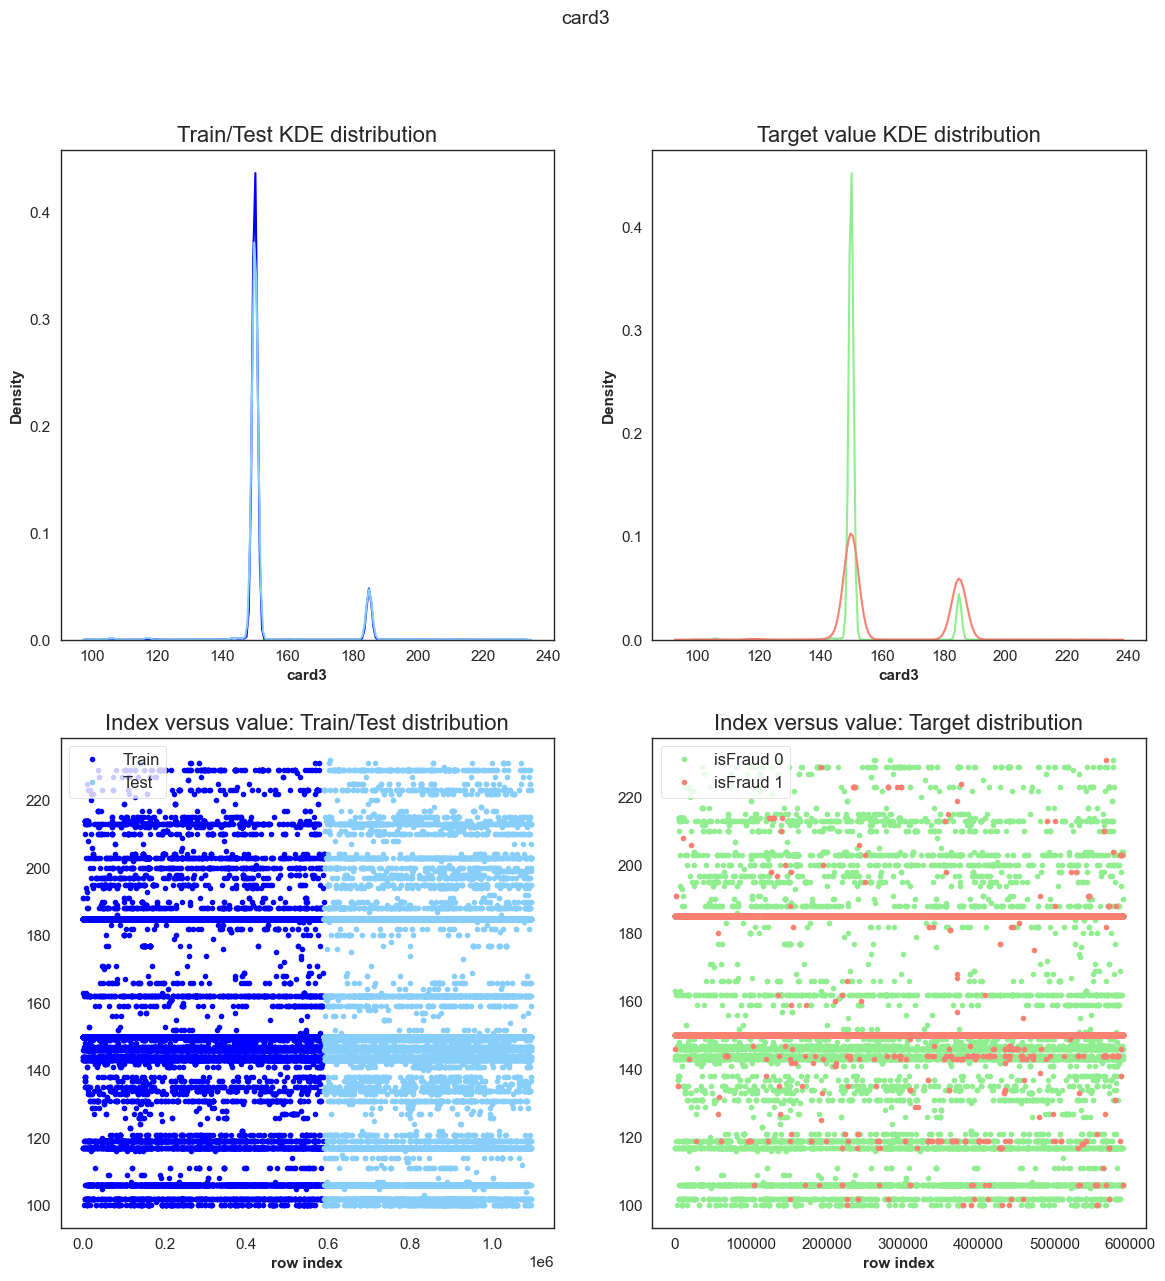

In [ ]:
plot_numerical('card3')

### Card4 - Card Issue Bank

In [ ]:
train['isFraud'].groupby(train['card4']).apply(get_stats).unstack().sort_values(by='Fraud(%)',ascending=False)

No Fraud    Fraud     All Fraud(%)
card4                                               
discover            6137.0    514.0    6651    7.73%
visa              371394.0  13373.0  384767    3.48%
mastercard        182719.0   6496.0  189215    3.43%
american express    8089.0    239.0    8328    2.87%

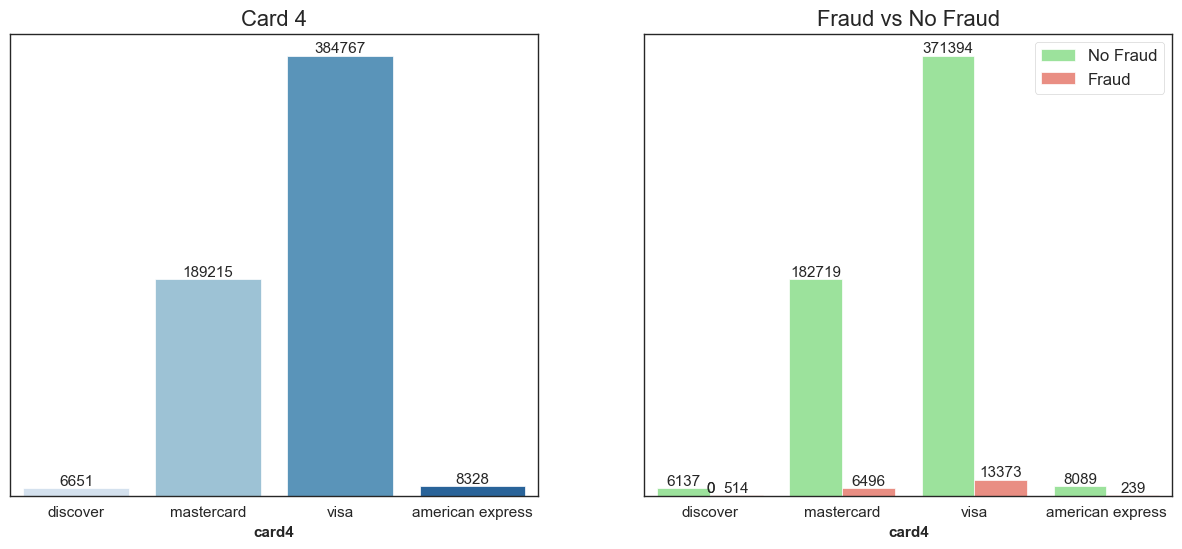

In [ ]:
f,ax=plt.subplots(1,2, figsize=(15,6))
cnt= sns.countplot(x='card4', palette='Blues', data=train, ax=ax[0])
ax[0].set_title('Card 4')
ax[0].set_ylabel('')
ax[0].set_yticklabels('')
text_annotate(cnt)

cnt2 = sns.countplot(x='card4', hue='isFraud', palette=['#90EE90', '#FA8072'], data=train, ax=ax[1])
ax[1].set_title('Fraud vs No Fraud')
ax[1].legend(['No Fraud','Fraud'])
ax[1].set_ylabel('')
ax[1].set_yticklabels('')
text_annotate(cnt2)

plt.show()

- Most of the transaction happend through visa card type.


              card4   count      sum      mean
0  american express    8328    239.0  0.028698
1          discover    6651    514.0  0.077282
2        mastercard  189215   6496.0  0.034331
3              visa  384767  13373.0  0.034756


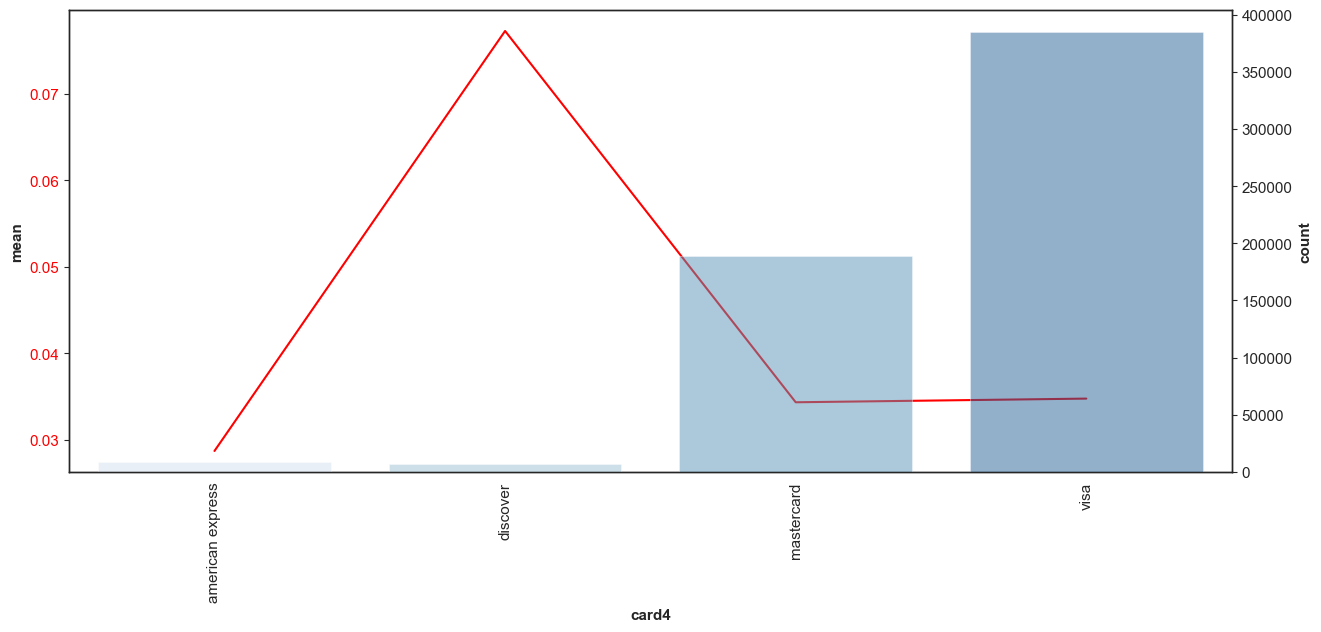

In [ ]:
compare_cate(train,'card4','isFraud')

## Card 5

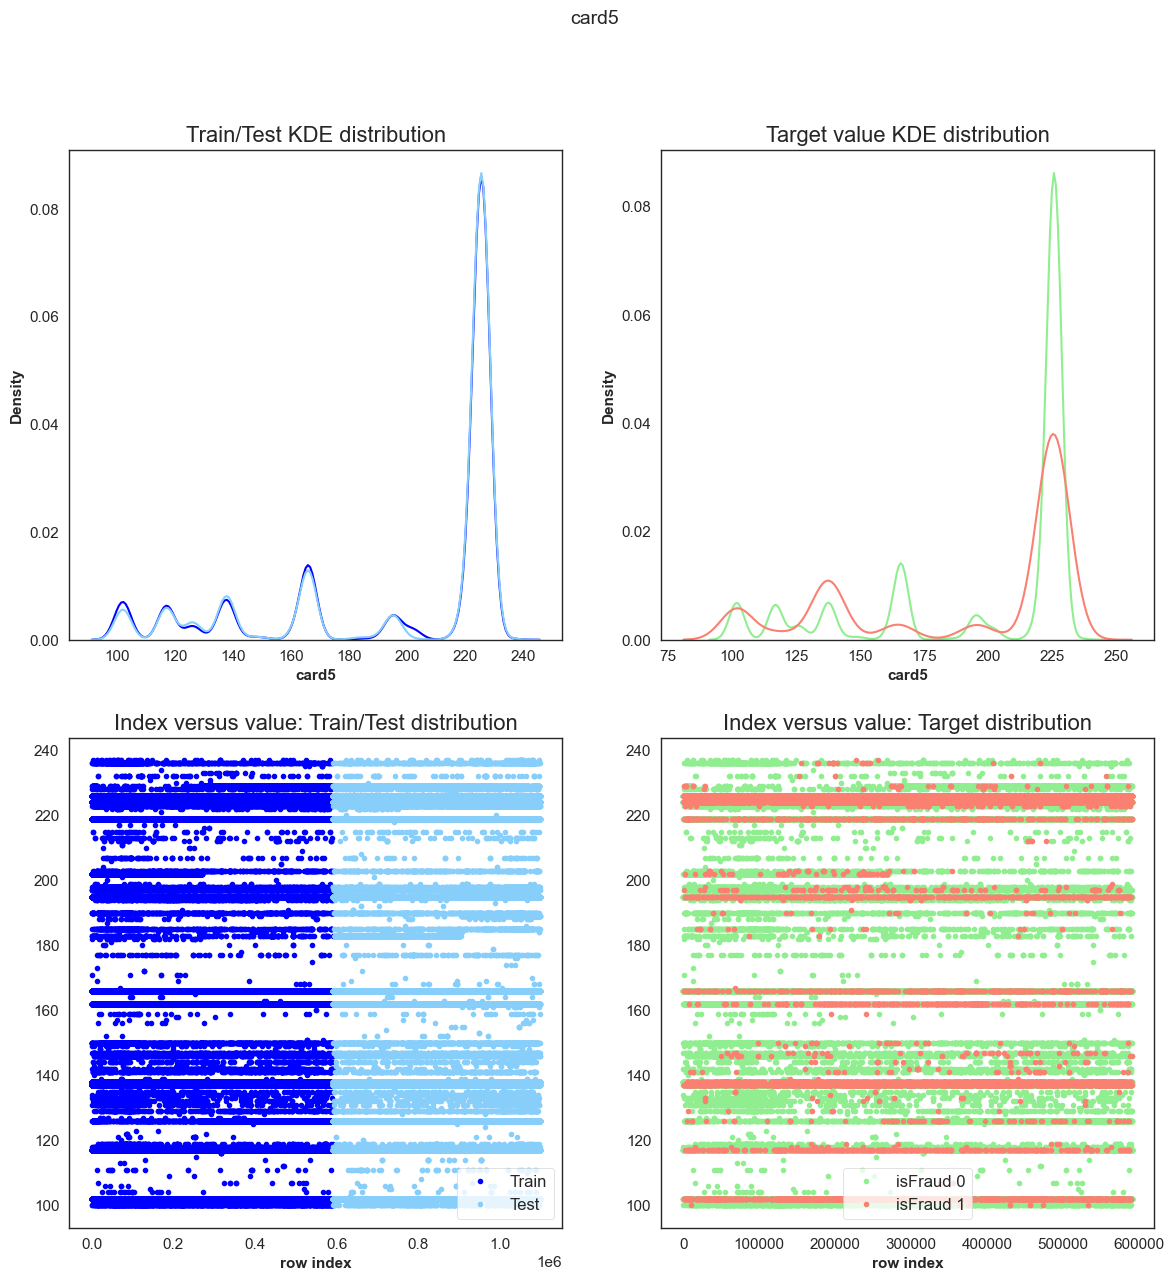

In [ ]:
plot_numerical('card5')

### Card 6 - Type of Cards

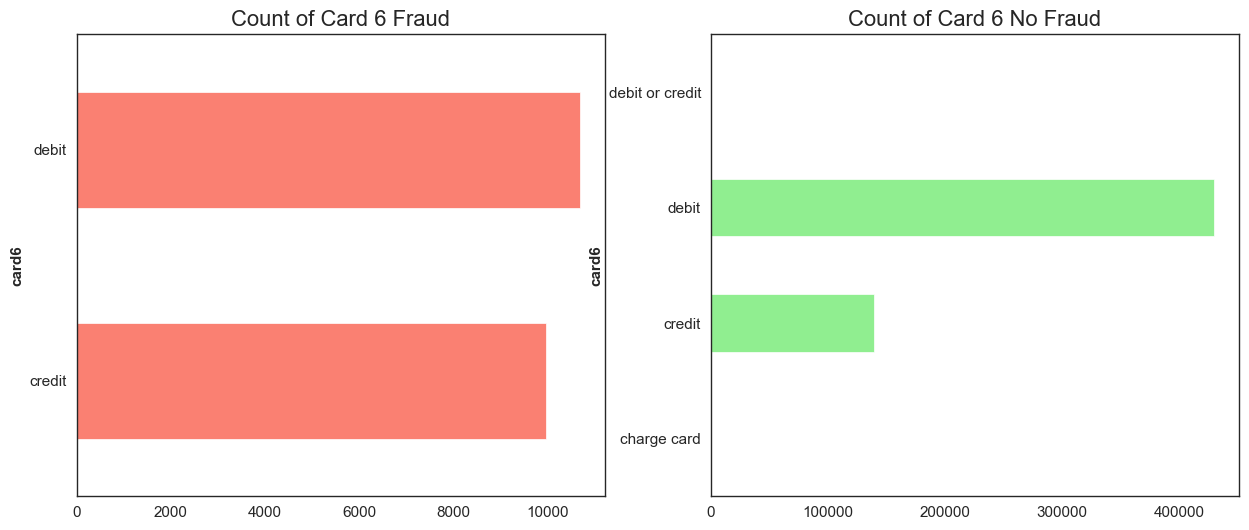

In [ ]:
train_fr = train.loc[train['isFraud'] == 1]
train_nofr = train.loc[train['isFraud'] == 0]
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))
train_fr.groupby('card6')['card6'].count().plot(kind='barh', ax=ax1, title='Count of Card 6 Fraud', color='#FA8072')
train_nofr.groupby('card6')['card6'].count().plot(kind='barh', ax=ax2, title='Count of Card 6 No Fraud', color ='#90EE90')
plt.show()

- Debit or credit and charge card are almost 0% in the dataset.
- Credit card holders tends to have more fraud transaction then debit card holders.

In [ ]:
# Lets combine them in to other card category.

def replaceCard(value):
    if value==np.nan:
        return value
    if value=='debit or credit' or value=='charge card':
        return 'debit'
    else:
        return value

In [ ]:
train['card6'] = train['card6'].apply(replaceCard)
test['card6'] = test['card6'].apply(replaceCard)

In [ ]:
train['isFraud'].groupby(train['card6']).apply(get_stats).unstack()

No Fraud    Fraud     All Fraud(%)
card6                                     
credit  139034.0   9950.0  148984    6.68%
debit   429309.0  10674.0  439983    2.43%

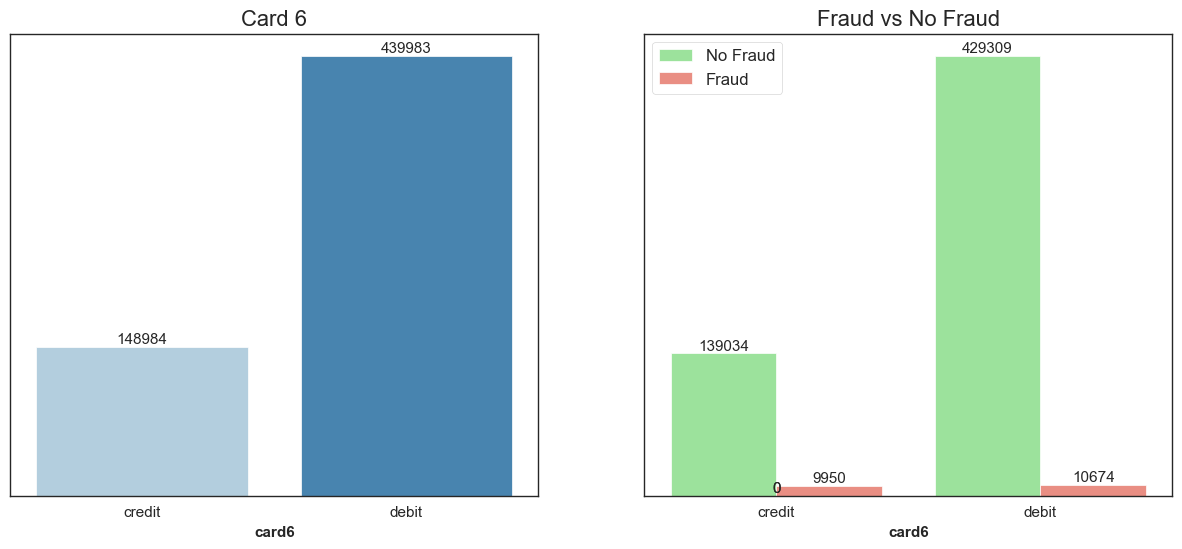

In [ ]:
f,ax=plt.subplots(1,2, figsize=(15,6))
cnt= sns.countplot(x='card6', palette='Blues', data=train, ax=ax[0])
ax[0].set_title('Card 6')
ax[0].set_ylabel('')
ax[0].set_yticklabels('')
text_annotate(cnt)

cnt2 = sns.countplot(x='card6', hue='isFraud', palette=['#90EE90', '#FA8072'], data=train, ax=ax[1])
ax[1].set_title('Fraud vs No Fraud')
ax[1].legend(['No Fraud','Fraud'])
ax[1].set_ylabel('')
ax[1].set_yticklabels('')
text_annotate(cnt2)

plt.show()

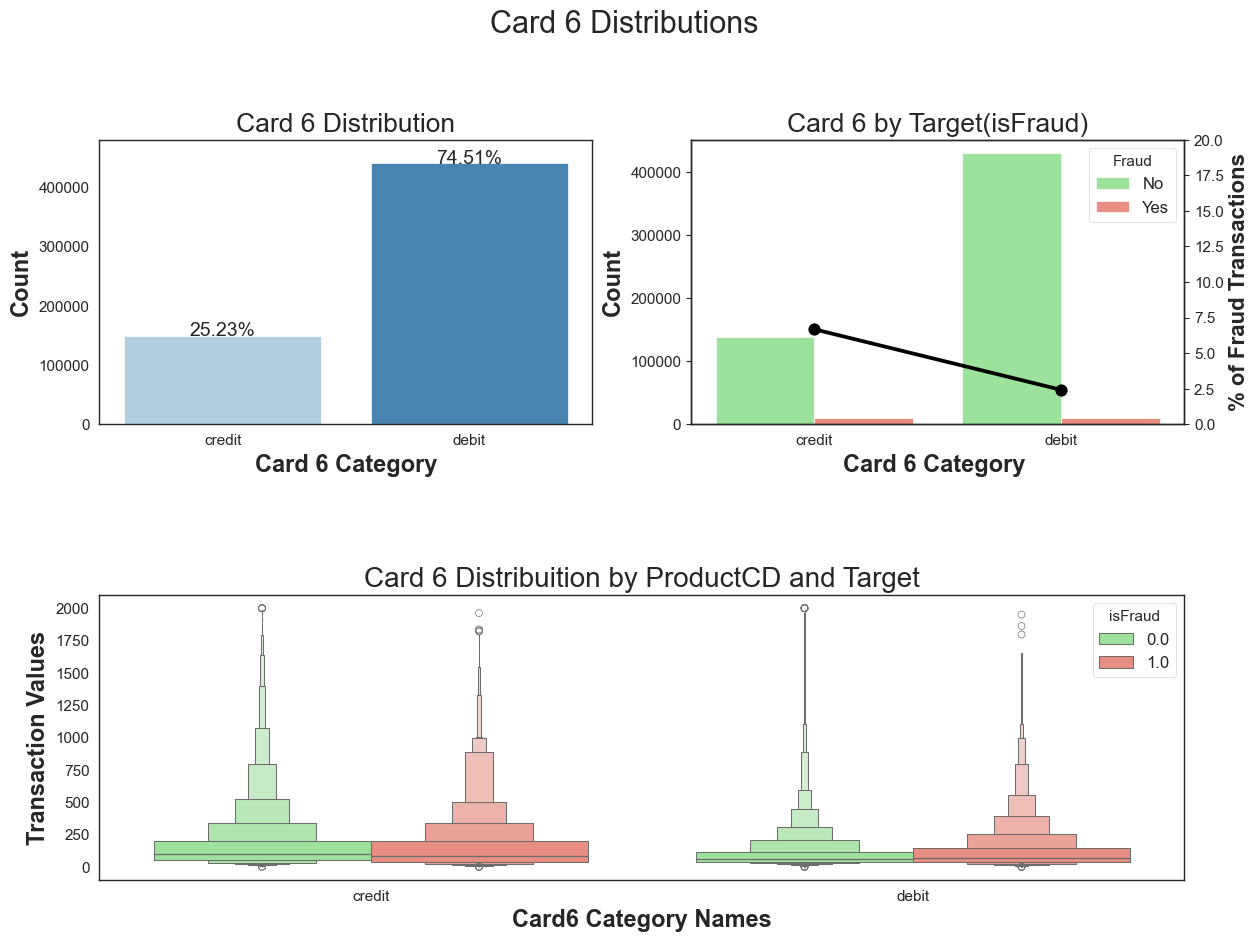

In [ ]:
tmp = pd.crosstab(train['card6'], train['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

plt.figure(figsize=(14,10))
plt.suptitle('Card 6 Distributions', fontsize=22)

plt.subplot(221)
plot_1 = sns.countplot(x='card6', data=train, order=list(tmp.card6.values), palette='Blues')
plot_1.set_title("Card 6 Distribution", fontsize=19)
plot_1.set_ylim(0,480000)
plot_1.set_xlabel("Card 6 Category", fontsize=17)
plot_1.set_ylabel("Count", fontsize=17)
for p in plot_1.patches:
    height = p.get_height()
    plot_1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=14) 

plt.subplot(222)
plot_2 = sns.countplot(x='card6', hue='isFraud', data=train, order=list(tmp.card6.values), palette=['#90EE90', '#FA8072'])
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
plot_2_2 = plot_2.twinx()
plot_2_2 = sns.pointplot(x='card6', y='Fraud', data=tmp, order=list(tmp.card6.values),
                   color='black', legend=False, )
plot_2_2.set_ylim(0,20)
plot_2_2.set_ylabel("% of Fraud Transactions", fontsize=16)
plot_2.set_title("Card 6 by Target(isFraud)", fontsize=19)
plot_2.set_xlabel("Card 6 Category ", fontsize=17)
plot_2.set_ylabel("Count", fontsize=17)

plt.subplot(212)
plot_3 = sns.boxenplot(x='card6', y='TransactionAmt', hue='isFraud', palette=['#90EE90', '#FA8072'], order=list(tmp.card6.values),
              data=train[train['TransactionAmt'] <= 2000] )
plot_3.set_title("Card 6 Distribuition by ProductCD and Target", fontsize=20)
plot_3.set_xlabel("Card6 Category Names", fontsize=17)
plot_3.set_ylabel("Transaction Values", fontsize=17)

plt.subplots_adjust(hspace = 0.6, top = 0.85)

plt.show()

## Addresses
- **addr1** is the billing region(zip code)
- **addr2** is the billing country

Both the addr is for the purchaser

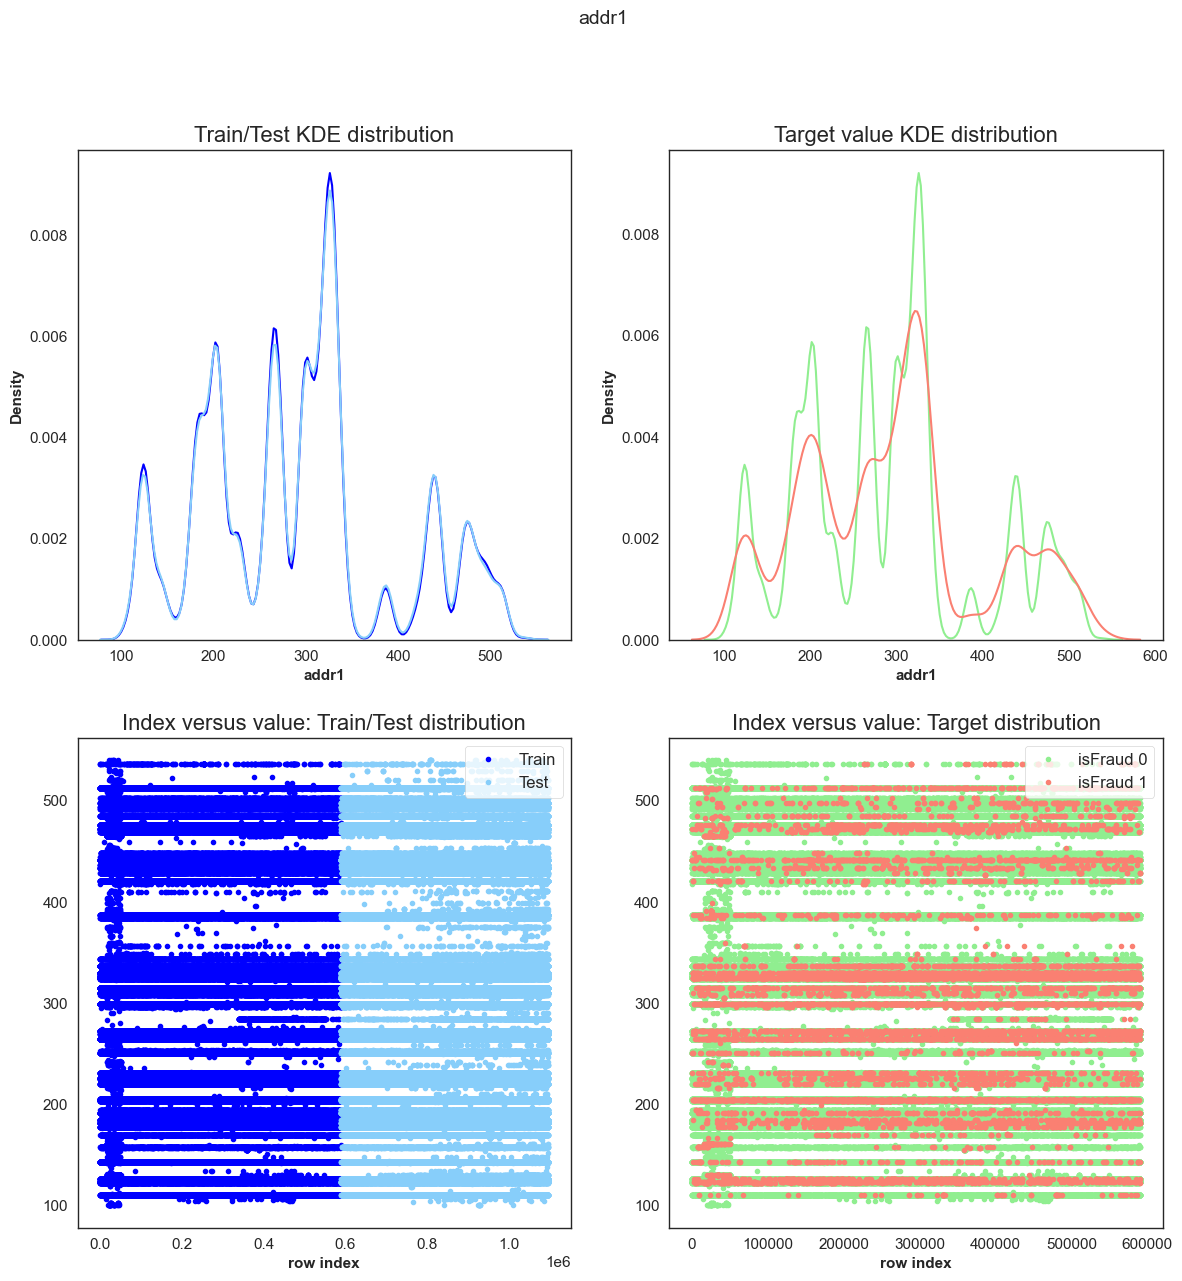

In [ ]:
plot_numerical('addr1')

In [ ]:
print(' addr1 - has {} NA values'.format(train['addr1'].isna().sum()))
print(' addr2 - has {} NA values'.format(train['addr2'].isna().sum()))

 addr1 - has 65706 NA values
 addr2 - has 65706 NA values


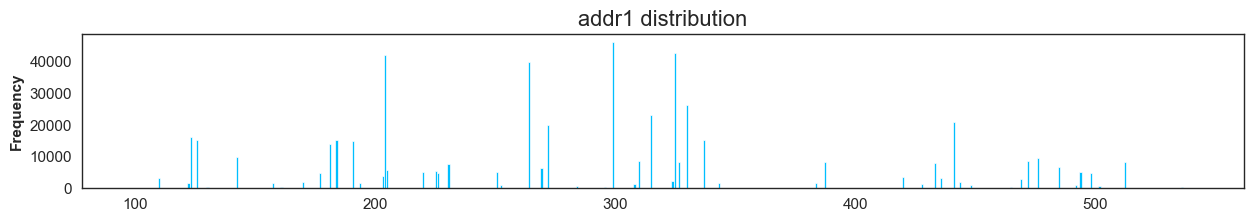

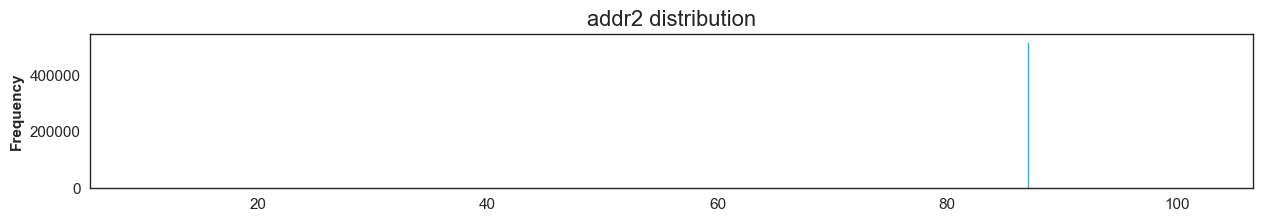

In [ ]:
train['addr1'].plot(kind='hist', bins=500, figsize=(15, 2), title='addr1 distribution', color='#00BFFF')
plt.show()
train['addr2'].plot(kind='hist', bins=500, figsize=(15, 2), title='addr2 distribution', color='#00BFFF')
plt.show()

In [ ]:
train.loc[train.addr1.isin(train.addr1.value_counts()[train.addr1.value_counts() <= 5000 ].index), 'addr1'] = "Others"
train.loc[train.addr2.isin(train.addr2.value_counts()[train.addr2.value_counts() <= 50 ].index), 'addr2'] = "Others"

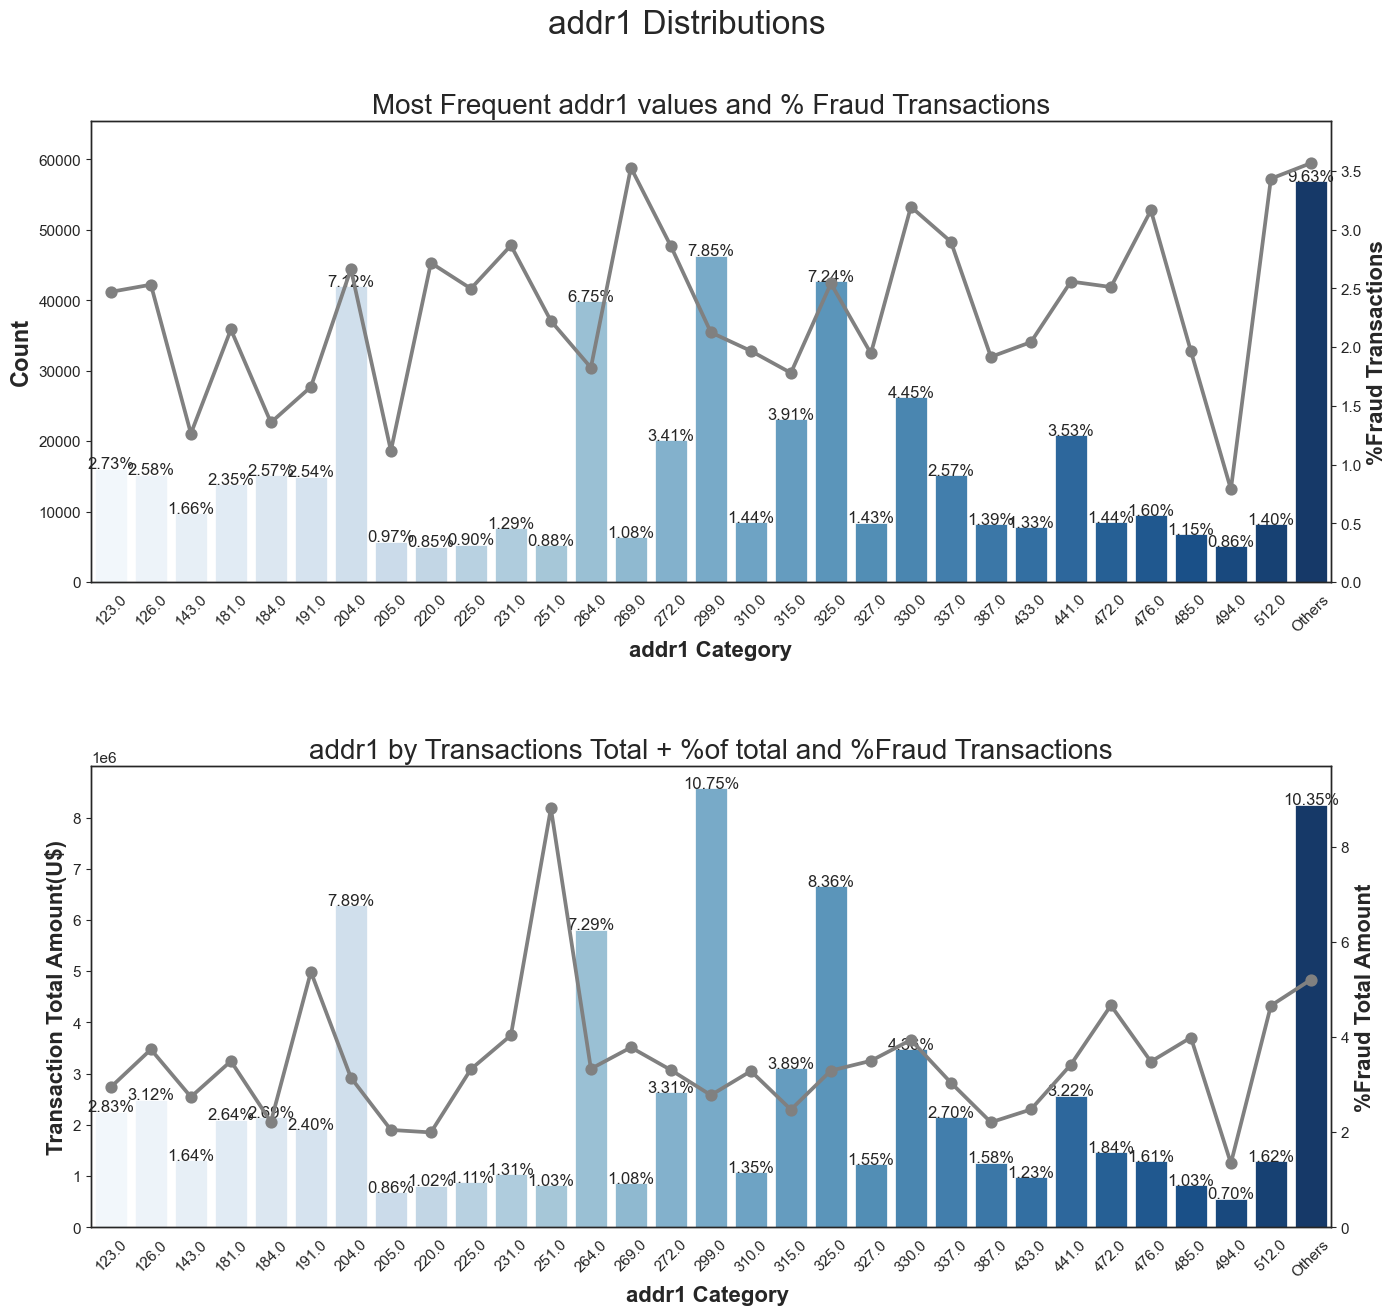

In [ ]:
ploting_cnt_amt(train, 'addr1')

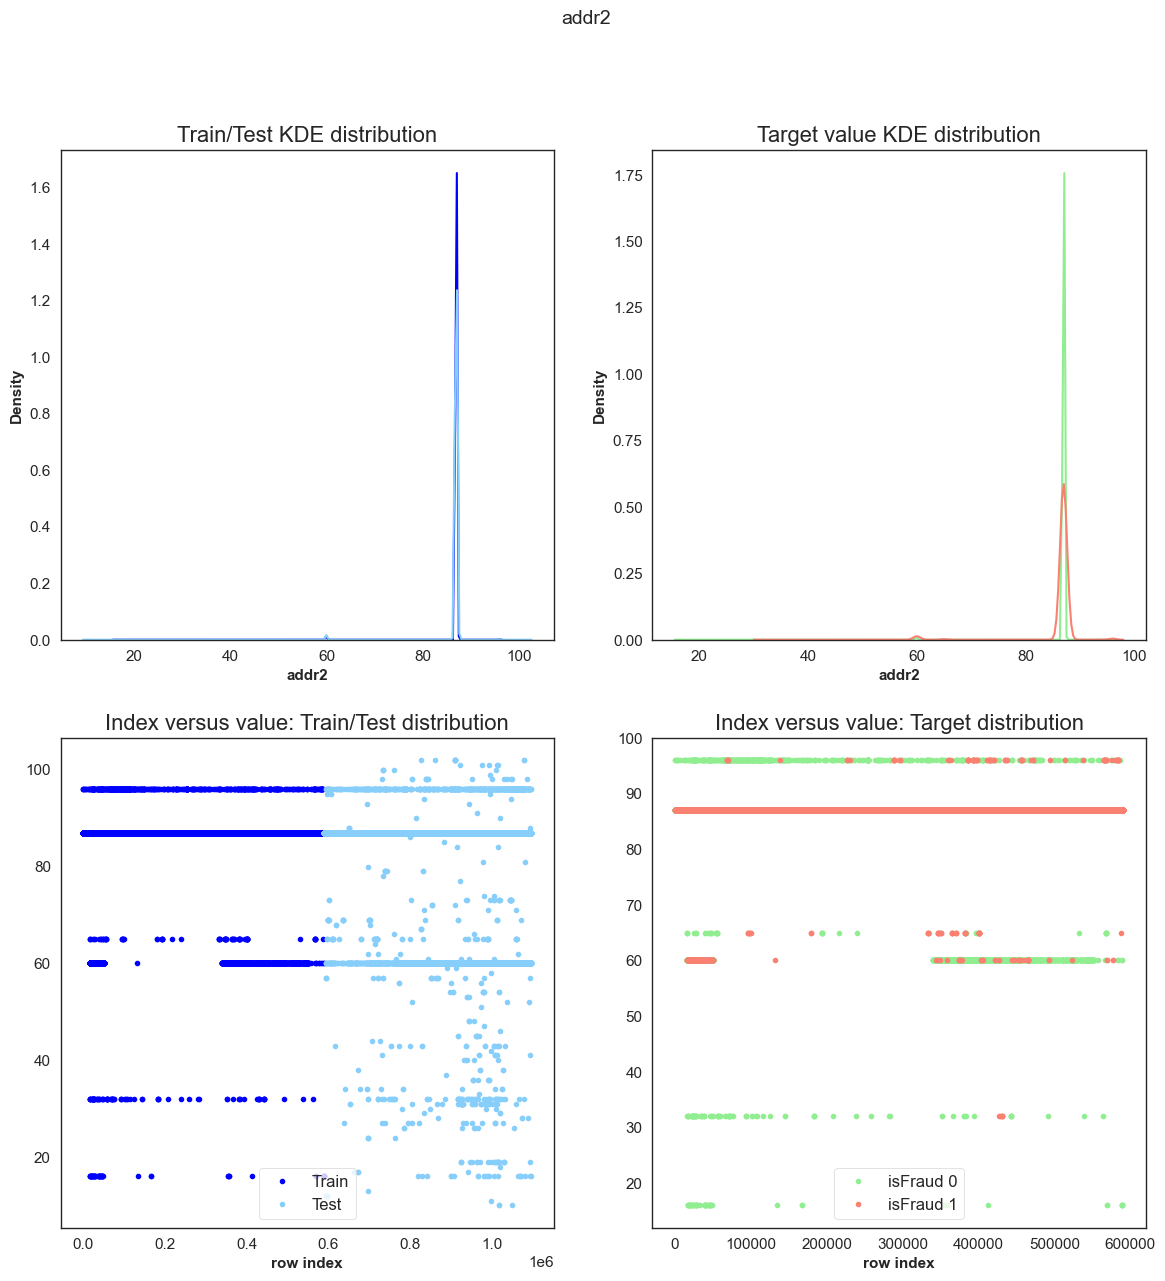

In [ ]:
# Convert addr2 to a numerical type
train['addr2'] = pd.to_numeric(train['addr2'], errors='coerce')

# Now plot the numerical representation of addr2
plot_numerical('addr2')

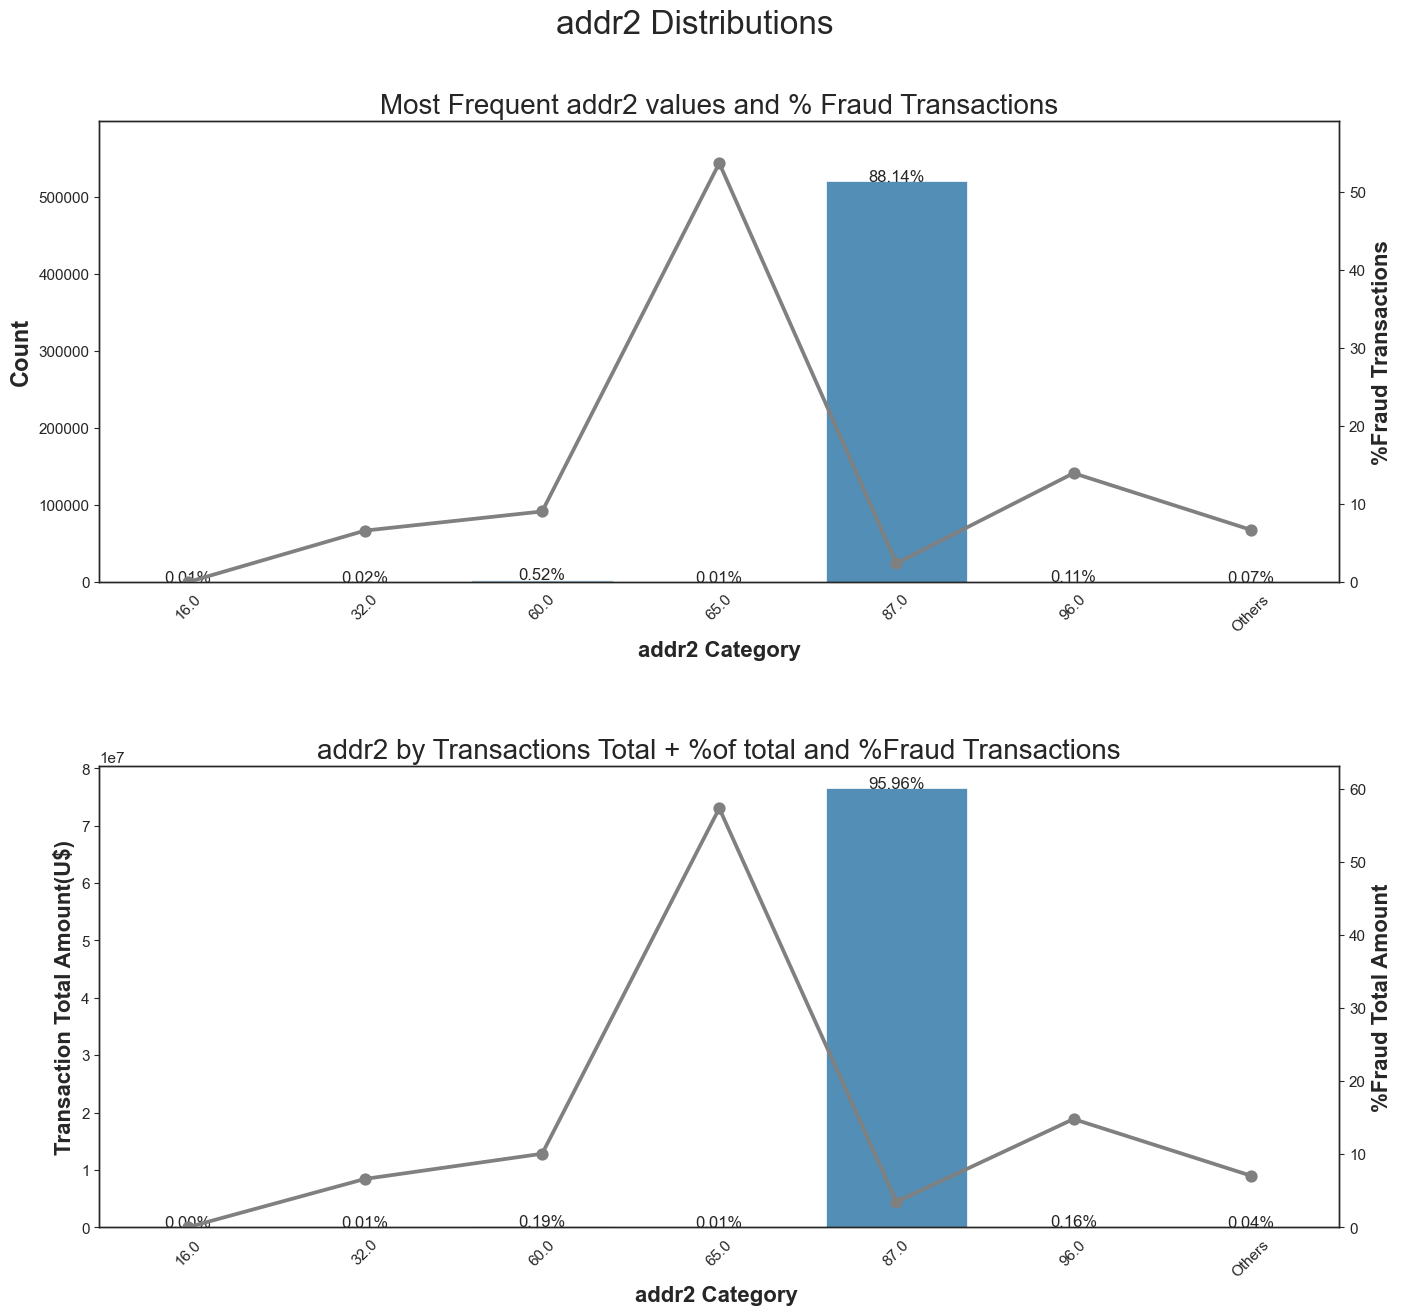

In [ ]:
ploting_cnt_amt(train, 'addr2')

## Distances (dist1, dist2)

In [ ]:
dist1des = describe(train,test,'dist1')
dist1des

dist1       Train  TrainFraud TrainNoFraud        Test
0      count    238267.0      4755.0     233512.0    215474.0
1       mean  118.502948  174.588854   117.360872    87.06527
2        std  371.873493  424.232313   370.643372  314.131694
3        min         0.0         0.0          0.0         0.0
4        25%         3.0         3.0          3.0         3.0
5        50%         8.0        10.0          8.0         8.0
6        75%        24.0        85.5         24.0        20.0
7        max     10286.0      4942.0      10286.0      8081.0
8     unique        2652         471         2636        1989
9        NaN      352271       15908       336363      291217
10  NaNshare    0.596526    0.769879      0.59024    0.574743

From the mean of TrainFraud it is conclude that fraud transaction have normally larger dist1 then non-fraud transaction.

Text(0.5, 1.0, 'Test')

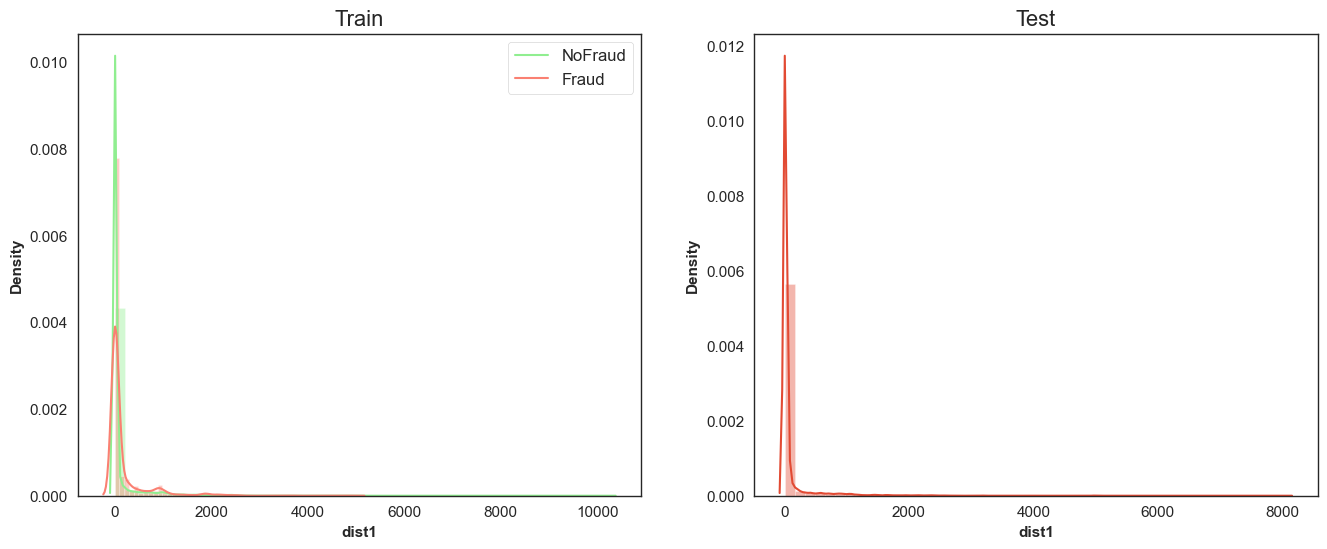

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(train[(train['isFraud']==0) & (~train['dist1'].isnull())]['dist1'], color='#90EE90')
sns.distplot(train[(train['isFraud']==1) & (~train['dist1'].isnull())]['dist1'], color='#FA8072')
plt.legend(['NoFraud','Fraud'])
plt.title('Train')
plt.subplot(1,2,2)
sns.distplot(test[~test['dist1'].isnull()]['dist1'])
plt.title('Test')

Text(0.5, 1.0, 'Test')

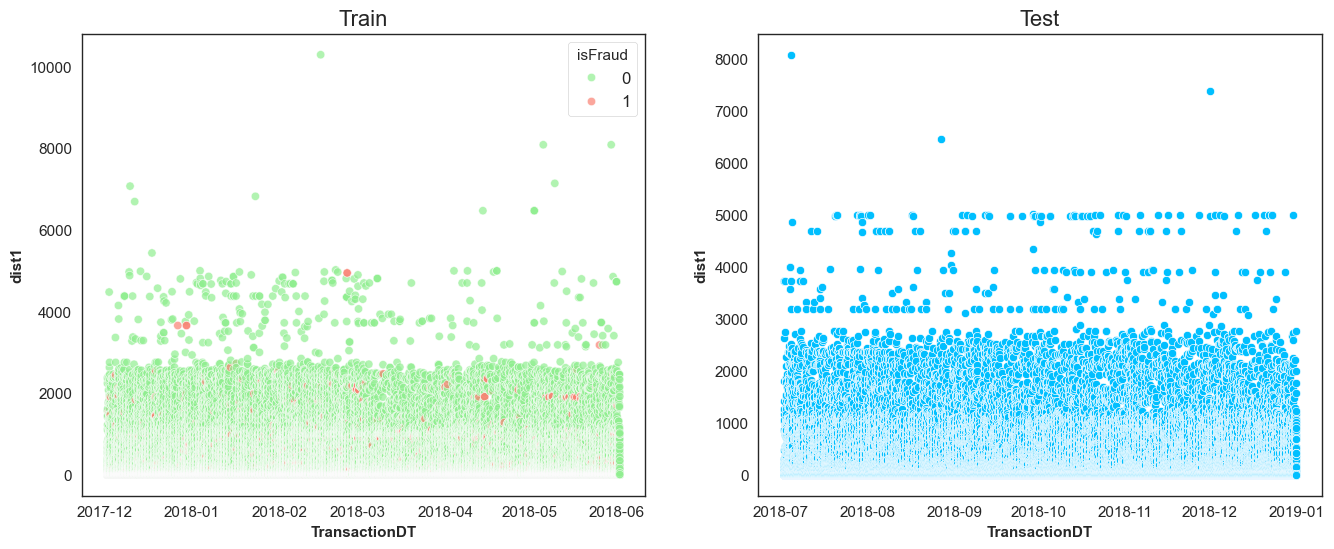

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x="TransactionDT",y="dist1",hue="isFraud",palette=['#90EE90', '#FA8072'], data=train[~train['dist1'].isnull()],alpha=0.7,hue_order=[0,1])
plt.title('Train')
plt.subplot(1,2,2)
sns.scatterplot(x="TransactionDT",y="dist1",data=test[~test['dist1'].isnull()], color='#00BFFF')
plt.title('Test')

We can see some of the outliers in the train data. lets remove all those points whose `dist1 > 6000` in train data

Text(0.5, 1.0, 'Test')

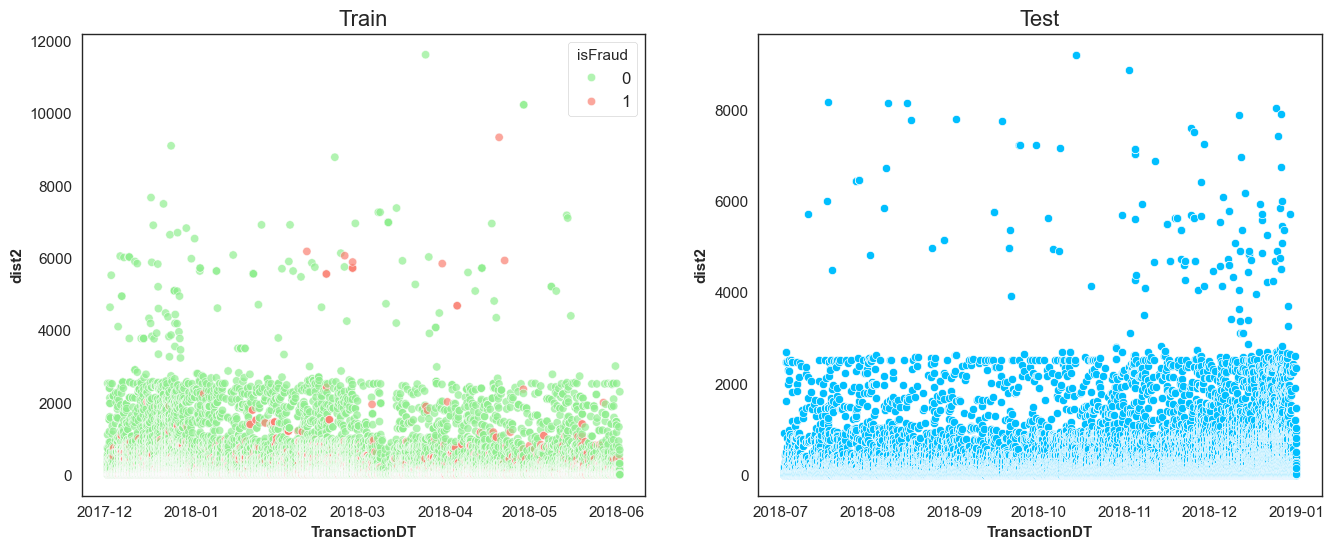

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x="TransactionDT",y="dist2",hue="isFraud",palette=['#90EE90', '#FA8072'],data=train[~train['dist2'].isnull()],alpha=0.7,hue_order=[0,1])
plt.title('Train')
plt.subplot(1,2,2)
sns.scatterplot(x="TransactionDT",y="dist2",data=test[~test['dist2'].isnull()], color='#00BFFF')
plt.title('Test')

Remove points which have `dist2 > 8000`(these are outliers)

## P_emaildomain

In [ ]:
train['isFraud'].groupby(train['P_emaildomain']).apply(get_stats).unstack().sort_values(by='Fraud',ascending=False)

No Fraud   Fraud     All Fraud(%)
P_emaildomain                                      
gmail.com         218412.0  9943.0  228355    4.35%
hotmail.com        42854.0  2396.0   45250    5.30%
yahoo.com          98635.0  2297.0  100932    2.28%
anonymous.com      36139.0   859.0   36998    2.32%
aol.com            27672.0   617.0   28289    2.18%
outlook.com         4614.0   482.0    5096    9.46%
comcast.net         7642.0   246.0    7888    3.12%
icloud.com          6070.0   197.0    6267    3.14%
mail.com             453.0   106.0     559   18.96%
msn.com             4002.0    90.0    4092    2.20%
live.com            2957.0    84.0    3041    2.76%
outlook.es           381.0    57.0     438   13.01%
bellsouth.net       1856.0    53.0    1909    2.78%
ymail.com           2346.0    50.0    2396    2.09%
live.com.mx          708.0    41.0     749    5.47%
aim.com              275.0    40.0     315   12.70%
protonmail.com        45.0    31.0      76   40.79%
att.net             4003.0    30.0    4033    0.74%
cox.net             1364.0    29.0    1393    2.08%
me.com              1495.0    27.0    1522    1.77%
charter.net          791.0    25.0     816    3.06%
verizon.net         2683.0    22.0    2705    0.81%
hotmail.es           285.0    20.0     305    6.56%
optonline.net        994.0    17.0    1011    1.68%
yahoo.com.mx        1527.0    16.0    1543    1.04%
mac.com              422.0    14.0     436    3.21%
sbcglobal.net       2958.0    12.0    2970    0.40%
earthlink.net        503.0    11.0     514    2.14%
gmail                485.0    11.0     496    2.22%
embarqmail.com       251.0     9.0     260    3.46%
frontier.com         272.0     8.0     280    2.86%
juno.com             316.0     6.0     322    1.86%
yahoo.fr             138.0     5.0     143    3.50%
frontiernet.net      190.0     5.0     195    2.56%
suddenlink.net       171.0     4.0     175    2.29%
roadrunner.com       302.0     3.0     305    0.98%
cableone.net         156.0     3.0     159    1.89%
rocketmail.com       662.0     2.0     664    0.30%
yahoo.es             132.0     2.0     134    1.49%
prodigy.net.mx       206.0     1.0     207    0.48%
sc.rr.com            163.0     1.0     164    0.61%
netzero.net          195.0     1.0     196    0.51%
netzero.com          230.0     0.0     230    0.00%
yahoo.co.jp           32.0     0.0      32    0.00%
gmx.de               149.0     0.0     149    0.00%
ptd.net               68.0     0.0      68    0.00%
yahoo.de              74.0     0.0      74    0.00%
hotmail.co.uk        112.0     0.0     112    0.00%
hotmail.de            43.0     0.0      43    0.00%
yahoo.co.uk           49.0     0.0      49    0.00%
windstream.net       305.0     0.0     305    0.00%
live.fr               56.0     0.0      56    0.00%
web.de               240.0     0.0     240    0.00%
cfl.rr.com           172.0     0.0     172    0.00%
twc.com              230.0     0.0     230    0.00%
centurylink.net      205.0     0.0     205    0.00%
servicios-ta.com      35.0     0.0      35    0.00%
q.com                189.0     0.0     189    0.00%
hotmail.fr           295.0     0.0     295    0.00%

## R_emaildomain

In [ ]:
train['isFraud'].groupby(train['R_emaildomain']).apply(get_stats).unstack().sort_values(by='Fraud',ascending=False)

No Fraud   Fraud    All Fraud(%)
R_emaildomain                                    
gmail.com         50336.0  6811.0  57147   11.92%
hotmail.com       25369.0  2140.0  27509    7.78%
yahoo.com         11232.0   610.0  11842    5.15%
anonymous.com     19931.0   598.0  20529    2.91%
outlook.com        2093.0   414.0   2507   16.51%
icloud.com         1218.0   180.0   1398   12.88%
aol.com            3572.0   129.0   3701    3.49%
outlook.es          376.0    57.0    433   13.16%
mail.com             76.0    46.0    122   37.70%
live.com.mx         710.0    44.0    754    5.84%
protonmail.com        2.0    39.0     41   95.12%
live.com            724.0    38.0    762    4.99%
comcast.net        1791.0    21.0   1812    1.16%
hotmail.es          272.0    20.0    292    6.85%
yahoo.com.mx       1492.0    16.0   1508    1.06%
cox.net             448.0    11.0    459    2.40%
me.com              545.0    11.0    556    1.98%
ymail.com           199.0     8.0    207    3.86%
earthlink.net        73.0     6.0     79    7.59%
charter.net         122.0     5.0    127    3.94%
yahoo.fr            132.0     5.0    137    3.65%
rocketmail.com       66.0     3.0     69    4.35%
bellsouth.net       420.0     2.0    422    0.47%
mac.com             216.0     2.0    218    0.92%
yahoo.es             55.0     2.0     57    3.51%
netzero.net           7.0     2.0      9   22.22%
optonline.net       185.0     2.0    187    1.07%
aim.com              35.0     1.0     36    2.78%
sbcglobal.net       551.0     1.0    552    0.18%
msn.com             851.0     1.0    852    0.12%
suddenlink.net       24.0     1.0     25    4.00%
prodigy.net.mx      206.0     1.0    207    0.48%
twc.com              29.0     0.0     29    0.00%
sc.rr.com             8.0     0.0      8    0.00%
scranton.edu         63.0     0.0     63    0.00%
servicios-ta.com     35.0     0.0     35    0.00%
yahoo.de             75.0     0.0     75    0.00%
verizon.net         620.0     0.0    620    0.00%
att.net             430.0     0.0    430    0.00%
windstream.net       47.0     0.0     47    0.00%
yahoo.co.jp          33.0     0.0     33    0.00%
yahoo.co.uk          39.0     0.0     39    0.00%
web.de              237.0     0.0    237    0.00%
hotmail.co.uk       105.0     0.0    105    0.00%
roadrunner.com       53.0     0.0     53    0.00%
q.com                25.0     0.0     25    0.00%
gmx.de              147.0     0.0    147    0.00%
cableone.net         27.0     0.0     27    0.00%
centurylink.net      12.0     0.0     12    0.00%
cfl.rr.com           37.0     0.0     37    0.00%
netzero.com          14.0     0.0     14    0.00%
live.fr              55.0     0.0     55    0.00%
embarqmail.com       68.0     0.0     68    0.00%
frontier.com         52.0     0.0     52    0.00%
juno.com             53.0     0.0     53    0.00%
frontiernet.net      14.0     0.0     14    0.00%
hotmail.fr          293.0     0.0    293    0.00%
gmail                95.0     0.0     95    0.00%
hotmail.de           42.0     0.0     42    0.00%
ptd.net              27.0     0.0     27    0.00%

## Device Type

In [ ]:
train['isFraud'].groupby(train['DeviceType']).apply(get_stats).unstack().sort_values(by='Fraud',ascending=False)

No Fraud   Fraud    All Fraud(%)
DeviceType                                 
mobile      49988.0  5657.0  55645   10.17%
desktop     79611.0  5554.0  85165    6.52%

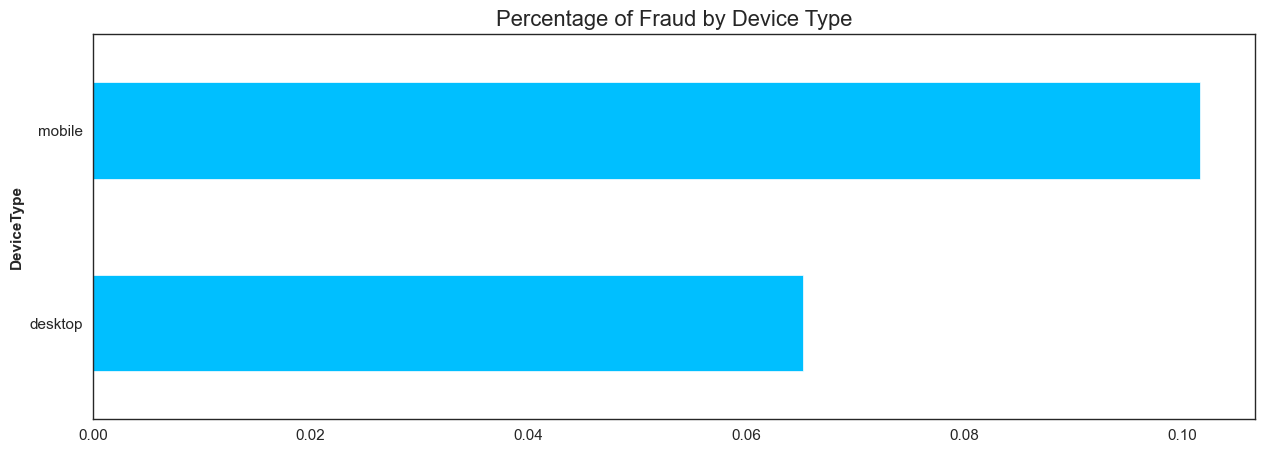

In [ ]:
# Ensure 'isFraud' is numeric
train['isFraud'] = pd.to_numeric(train['isFraud'], errors='coerce')

train.groupby('DeviceType')['isFraud'].mean().sort_values().plot(kind='barh',
                                                                 figsize=(15, 5),
                                                                 color='#00BFFF',
                                                                 title='Percentage of Fraud by Device Type')
plt.show()

## Device Info

In [ ]:
train['isFraud'].groupby(train['DeviceInfo']).apply(get_stats).unstack().sort_values(by='Fraud(%)',ascending=False).head(20)

No Fraud  Fraud  All Fraud(%)
DeviceInfo                                                       
hi6210sft Build/MRA58K                  10.0  180.0  190   94.74%
TR10CS1 Build/JDQ39                      1.0   10.0   11   90.91%
Lenovo YT3-850M Build/MMB29M             1.0   10.0   11   90.91%
Hisense F23 Build/NRD90M                55.0    6.0   61    9.84%
5056A Build/MMB29M                      28.0    3.0   31    9.68%
SM-N900W8 Build/LRX21V                  19.0    2.0   21    9.52%
rv:60.0                                 57.0    6.0   63    9.52%
Android 5.1                             29.0    3.0   32    9.38%
SM-J500M Build/MMB29M                   39.0    4.0   43    9.30%
ALE-L23 Build/HuaweiALE-L23            283.0   29.0  312    9.29%
SM-G935F Build/NRD90M                  303.0   31.0  334    9.28%
Blade V6 Plus Build/MRA58K              69.0    7.0   76    9.21%
M4 SS4457 Build/MRA58K                  10.0    1.0   11    9.09%
SM-J730G Build/NRD90M                   10.0    1.0   11    9.09%
MotoG3-TE Build/MPDS24.65-33-1-3         1.0    8.0    9   88.89%
LG-D320 Build/KOT49I.V10a               10.0   61.0   71   85.92%
TA-1039 Build/NMF26F                     5.0   27.0   32   84.38%
Moto Z2 Play Build/NPSS26.118-19-11      2.0   10.0   12   83.33%
Alcatel_4060O Build/MMB29M               1.0    5.0    6   83.33%
Ilium Pad T7X Build/LMY47I               1.0    5.0    6   83.33%

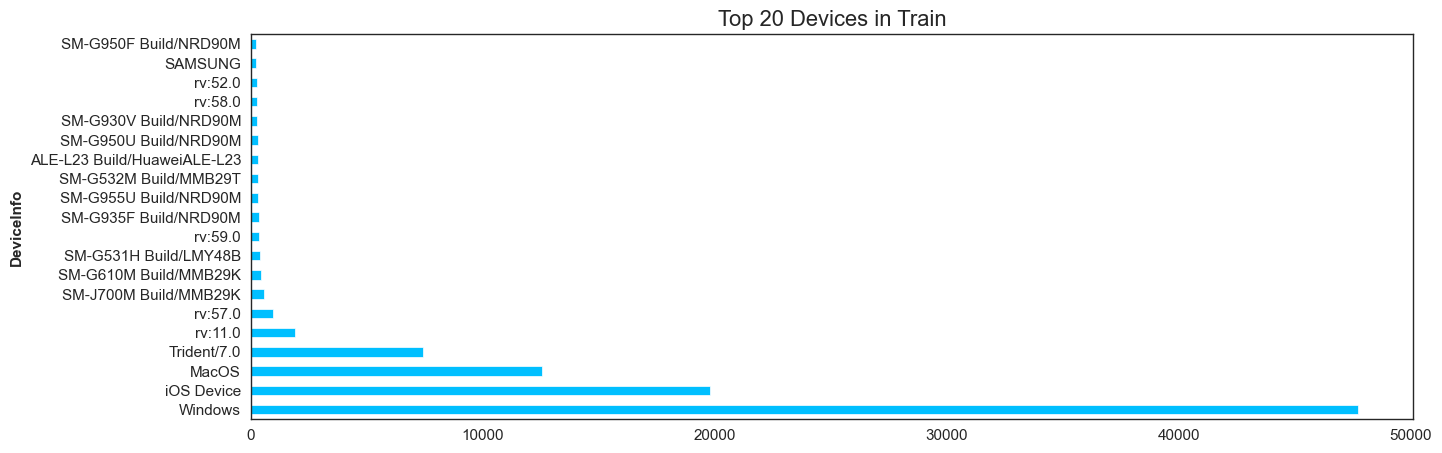

In [ ]:
train.groupby('DeviceInfo').count()['TransactionID'].sort_values(ascending=False).head(20).plot(kind='barh', 
                                                                                                color='#00BFFF', 
                                                                                                figsize=(15, 5), 
                                                                                                title='Top 20 Devices in Train')
plt.show()

## Analysis on id_23 (IP Proxy)

In [ ]:
train['isFraud'].groupby(train['id_23']).apply(get_stats).unstack()

No Fraud  Fraud   All Fraud(%)
id_23                                              
IP_PROXY:ANONYMOUS      924.0  147.0  1071   13.73%
IP_PROXY:HIDDEN         575.0   34.0   609    5.58%
IP_PROXY:TRANSPARENT   3244.0  245.0  3489    7.02%

## Analysis on id_30 features (Operating System)

In [ ]:
train['isFraud'].groupby(train['id_30']).apply(get_stats).unstack().sort_values(by='Fraud(%)',ascending=False).head(20)

No Fraud  Fraud   All Fraud(%)
id_30                                          
Windows Vista       223.0   23.0   246    9.35%
iOS 11.0.0          131.0   13.0   144    9.03%
iOS 10.2.1          260.0   25.0   285    8.77%
Android 6.0.1       518.0   48.0   566    8.48%
iOS 11.2.0          780.0   72.0   852    8.45%
iOS 10.2.0          137.0   12.0   149    8.05%
iOS 11.0.2          153.0   13.0   166    7.83%
Linux              1051.0   85.0  1136    7.48%
iOS 11.1.1          651.0   49.0   700    7.00%
other                 6.0    9.0    15   60.00%
Windows 8.1        1781.0  133.0  1914    6.95%
iOS 11.3.0         1878.0  138.0  2016    6.85%
iOS 10.3.2          399.0   29.0   428    6.78%
iOS 10.0.2           89.0    6.0    95    6.32%
Mac OS X 10_11_5     77.0    5.0    82    6.10%
Mac OS X 10_9_5     536.0   34.0   570    5.96%
iOS 10.3.1          222.0   14.0   236    5.93%
Android 7.0        2705.0  166.0  2871    5.78%
iOS 11.2.6         1553.0   94.0  1647    5.71%
iOS 10.3.3         1469.0   89.0  1558    5.71%

#Analysis on id_31 features (Browser)


In [ ]:
train['isFraud'].groupby(train['id_31']).apply(get_stats).unstack().sort_values(by='Fraud(%)',ascending=False).head(20)

No Fraud   Fraud    All Fraud(%)
id_31                                                   
mobile safari generic    10328.0  1146.0  11474    9.99%
chrome 60.0                334.0    37.0    371    9.97%
chrome 65.0               6192.0   679.0   6871    9.88%
chrome 66.0               3866.0   398.0   4264    9.33%
chrome 55.0 for android    274.0    28.0    302    9.27%
firefox 58.0               756.0    77.0    833    9.24%
chrome 64.0               6096.0   615.0   6711    9.16%
firefox 60.0               206.0    19.0    225    8.44%
google                      33.0     3.0     36    8.33%
firefox 47.0                34.0     3.0     37    8.11%
chrome                     394.0    34.0    428    7.94%
firefox 59.0              1013.0    86.0   1099    7.83%
chrome 62.0 for android   1936.0   161.0   2097    7.68%
samsung browser 6.4        470.0    39.0    509    7.66%
mobile safari uiwebview     90.0     7.0     97    7.22%
samsung browser 6.2        986.0    75.0   1061    7.07%
Lanix/Ilium                  1.0     2.0      3   66.67%
comodo                       2.0     4.0      6   66.67%
samsung browser 7.0         94.0     7.0    101    6.93%
chrome 63.0              20497.0  1503.0  22000    6.83%

## Analysis on id_33 features (Screen Resolution)

In [ ]:
train['isFraud'].groupby(train['id_33']).apply(get_stats).unstack().sort_values(by='Fraud',ascending=False).head(20)

No Fraud  Fraud    All Fraud(%)
id_33                                    
1366x768    8112.0  493.0   8605    5.73%
1920x1080  16384.0  490.0  16874    2.90%
2208x1242   4418.0  482.0   4900    9.84%
1334x750    6066.0  381.0   6447    5.91%
1280x720    1137.0  181.0   1318   13.73%
2436x1125   1316.0  168.0   1484   11.32%
1440x900    4256.0  128.0   4384    2.92%
1600x900    3397.0  113.0   3510    3.22%
1280x800    2046.0  103.0   2149    4.79%
855x480      155.0   95.0    250   38.00%
1136x640    1644.0   68.0   1712    3.97%
2048x1536   3417.0   65.0   3482    1.87%
2001x1125    959.0   61.0   1020    5.98%
1024x600      31.0   57.0     88   64.77%
1280x1024   1690.0   53.0   1743    3.04%
2560x1600   2050.0   43.0   2093    2.05%
1024x768     790.0   34.0    824    4.13%
2220x1080    515.0   29.0    544    5.33%
2880x1800   1727.0   29.0   1756    1.65%
1680x1050   1701.0   26.0   1727    1.51%

In [ ]:
id_cols = [c for c in train.columns if 'id' in c]
for i in id_cols:
    if i in test.columns:
        try:
            train.set_index('TransactionDT')[i].plot(style='.', color='b', title=i, figsize=(15, 3))
            test.set_index('TransactionDT')[i].plot(style='.', color='skyblue', title=i, figsize=(15, 3))
            plt.show()
        except TypeError:
            pass